# Линейная регрессия и стохастический градиентный спуск

Задание основано на материалах лекций по линейной регрессии и градиентному спуску. Вы будете прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Вы научитесь:
- решать задачу восстановления линейной регрессии
- реализовывать стохастический градиентный спуск для ее настройки
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки параметров (весов) модели решается следующая задача:
$$\Large \frac{1}{\ell}\sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}^2} \rightarrow \min_{w_0, w_1, w_2, w_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта, $y_i$ - значение целевого признака $i$-го объекта, $\ell$ - число объектов в обучающей выборке.

## Градиентный спуск
Параметры $w_0, w_1, w_2, w_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}},\ j \in \{1,2,3\}$$
Здесь $\eta$ - параметр, шаг градиентного спуска.

## Стохастический градиентный спуск
Проблема градиентного спуска, описанного выше, в том, что на больших выборках считать на каждом шаге градиент по всем имеющимся данным может быть очень вычислительно сложно. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого объекта обучающей выборки:
$$\Large w_0 \leftarrow w_0 - \frac{2\eta}{\ell} {((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)}$$
$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} {x_{kj}((w_0 + w_1x_{k1} + w_2x_{k2} +  w_3x_{k3}) - y_k)},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, \ell\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $w$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $w$, чтобы вектор $y$, приближающий целевой признак, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $w$. То есть, чтобы выполнялось матричное уравнение:
$$\Large y = Xw$$
Домножением слева на $X^T$ получаем:
$$\Large X^Ty = X^TXw$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $w$) в виде:
$$\Large w = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $w$ решением матричного уравнения 
$$\Large X^TXw = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

В начале напишем простую функцию для записи ответов в текстовый файл. Ответами будут числа, полученные в ходе решения этого задания, округленные до 3 знаков после запятой. Полученные файлы после выполнения задания надо отправить в форму на странице задания на Coursera.org.

In [165]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame. [Источник данных](http://www-bcf.usc.edu/~gareth/ISL/data.html).**

In [166]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [167]:
adver_data.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

In [168]:
adver_data.describe().T

count      mean        std  min     25%     50%      75%    max
TV         200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
Radio      200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
Newspaper  200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
Sales      200.0   14.0225   5.217457  1.6  10.375   12.90   17.400   27.0

**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [169]:
X = adver_data[['TV', 'Radio', 'Newspaper']].values
y = adver_data['Sales'].values

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и поделив результат на стандартное отклонение. Для определенности, используйте методы mean и std векторов NumPy (реализация std в Pandas может отличаться). Обратите внимание, что в numpy вызов функции .mean() без параметров возвращает среднее по всем элементам массива, а не по столбцам, как в pandas. Чтобы произвести вычисление по столбцам, необходимо указать параметр axis.**

In [170]:
means, stds = np.mean(X, axis=0), np.std(X, axis=0)

In [171]:
X = (X - means)/stds

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [172]:
import numpy as np
X = np.hstack(((np.ones((X.shape[0], 1))), X))

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения). Не используйте в этой функции циклы - тогда она будет вычислительно неэффективной.**

In [173]:
def mserror(y, y_pred):
    return np.sum((y - y_pred)**2)/len(y)

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке? Запишите ответ в файл '1.txt'.**

In [174]:
answer1 = mserror(y, 
                  [np.median(y)]*len(y))
print(answer1)
write_answer_to_file(answer1, '1.txt')

28.34575


**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $w$ согласно нормальному уравнению линейной регрессии.**

In [175]:
def normal_equation(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [176]:
norm_eq_weights = normal_equation(X, y)
print(norm_eq_weights)

[14.0225      3.91925365  2.79206274 -0.02253861]


**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper). Запишите ответ в файл '2.txt'.**

In [177]:
answer2 = np.sum(norm_eq_weights * np.hstack((1, means)))
print(answer2)
write_answer_to_file(answer2, '2.txt')

654.5852585499046


**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели *w*, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами *w*.**

In [200]:
def linear_prediction(X, w):
    return np.sum(X * w, axis=1)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения? Запишите ответ в файл '3.txt'.**

In [201]:
answer3 = mserror(y, linear_prediction(X, norm_eq_weights))
print(answer3)
write_answer_to_file(answer3, '3.txt')

2.784126314510936


**5. Напишите функцию *stochastic_gradient_step*, реализующую шаг стохастического градиентного спуска для линейной регрессии. Функция должна принимать матрицу *X*, вектора *y* и *w*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\eta$* (eta) - шаг градиентного спуска (по умолчанию *eta*=0.01). Результатом будет вектор обновленных весов. Наша реализация функции будет явно написана для данных с 3 признаками, но несложно модифицировать для любого числа признаков, можете это сделать.**

In [267]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    
    wx = sum([w[i] * X[train_ind, i] for i in range(len(w))]) - y[train_ind]
    
    grads = [2 * wx / len(X)]
    
    for j in range(1, len(w)):
        grad = 2 * X[train_ind, j] * wx / len(X)
        grads.append(grad)
    
    return  w - eta * np.array(grads)

**6. Напишите функцию *stochastic_gradient_descent*, реализующую стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- w_init - вектор начальных весов модели
- eta - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - максимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

In [285]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        # счетчик итераций
        iter_num += 1
        # делаем шаг стохастического градиентного спуска
        w = stochastic_gradient_step(X, y, w_init, random_ind, eta)
        # считаем текущее значение среднеквадратичной ошибки
        # на текущей итерации и записываем ее в вектор (список) ошибок
        error = mserror(y, linear_prediction(X, w))
        errors.append(error)
        # евклидово расстояние между векторами весов на соседних итерациях градиентного спуска
        weight_dist = np.linalg.norm(w_init - w)
        w_init = w
        if verbose == True:
            print('Iteration {}\t Error {}\t Weight {}'.format(iter_num, round(error, 4), round(weight_dist, 4)))
    return w, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *w_init*, состоящий из нулей. Оставьте параметры  *eta* и *seed* равными их значениям по умолчанию (*eta*=0.01, *seed*=42 - это важно для проверки ответов).**

In [286]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, [0, 0, 0, 0], max_iter=1e5,
                                min_weight_dist=1e-8, verbose=True)

Iteration 1	 Error 223.6654	 Weight 0.0031
Iteration 2	 Error 223.6364	 Weight 0.0019
Iteration 3	 Error 223.5549	 Weight 0.0038
Iteration 4	 Error 223.4808	 Weight 0.0029
Iteration 5	 Error 223.4726	 Weight 0.0014
Iteration 6	 Error 223.4466	 Weight 0.0015
Iteration 7	 Error 223.3918	 Weight 0.0037
Iteration 8	 Error 223.3215	 Weight 0.0031
Iteration 9	 Error 223.2707	 Weight 0.0031
Iteration 10	 Error 223.2586	 Weight 0.0014
Iteration 11	 Error 223.2026	 Weight 0.0025
Iteration 12	 Error 223.1464	 Weight 0.0035
Iteration 13	 Error 223.1183	 Weight 0.0015
Iteration 14	 Error 223.0564	 Weight 0.003
Iteration 15	 Error 223.0152	 Weight 0.0019
Iteration 16	 Error 222.9904	 Weight 0.0019
Iteration 17	 Error 222.9874	 Weight 0.0004
Iteration 18	 Error 222.969	 Weight 0.0016
Iteration 19	 Error 222.8719	 Weight 0.0041
Iteration 20	 Error 222.8446	 Weight 0.0021
Iteration 21	 Error 222.7886	 Weight 0.0035
Iteration 22	 Error 222.7697	 Weight 0.0018
Iteration 23	 Error 222.7209	 Weight 0.0034

Iteration 439	 Error 204.2645	 Weight 0.0016
Iteration 440	 Error 204.2355	 Weight 0.0016
Iteration 441	 Error 204.2066	 Weight 0.0016
Iteration 442	 Error 204.1594	 Weight 0.0029
Iteration 443	 Error 204.1131	 Weight 0.0024
Iteration 444	 Error 204.0864	 Weight 0.0018
Iteration 445	 Error 204.0412	 Weight 0.0033
Iteration 446	 Error 203.9545	 Weight 0.0041
Iteration 447	 Error 203.8872	 Weight 0.0028
Iteration 448	 Error 203.8031	 Weight 0.0046
Iteration 449	 Error 203.7509	 Weight 0.0022
Iteration 450	 Error 203.7198	 Weight 0.0023
Iteration 451	 Error 203.693	 Weight 0.0018
Iteration 452	 Error 203.6045	 Weight 0.004
Iteration 453	 Error 203.547	 Weight 0.0029
Iteration 454	 Error 203.5367	 Weight 0.0017
Iteration 455	 Error 203.5027	 Weight 0.0023
Iteration 456	 Error 203.457	 Weight 0.0029
Iteration 457	 Error 203.4512	 Weight 0.0017
Iteration 458	 Error 203.4323	 Weight 0.0022
Iteration 459	 Error 203.4294	 Weight 0.0013
Iteration 460	 Error 203.397	 Weight 0.0022
Iteration 461	 

Iteration 882	 Error 187.5611	 Weight 0.0043
Iteration 883	 Error 187.4432	 Weight 0.0072
Iteration 884	 Error 187.4233	 Weight 0.0014
Iteration 885	 Error 187.4053	 Weight 0.0016
Iteration 886	 Error 187.3697	 Weight 0.0047
Iteration 887	 Error 187.3361	 Weight 0.0025
Iteration 888	 Error 187.2787	 Weight 0.003
Iteration 889	 Error 187.2283	 Weight 0.0035
Iteration 890	 Error 187.2117	 Weight 0.002
Iteration 891	 Error 187.13	 Weight 0.0038
Iteration 892	 Error 187.0727	 Weight 0.0037
Iteration 893	 Error 187.0571	 Weight 0.0014
Iteration 894	 Error 186.987	 Weight 0.0045
Iteration 895	 Error 186.9488	 Weight 0.0027
Iteration 896	 Error 186.9135	 Weight 0.0025
Iteration 897	 Error 186.8639	 Weight 0.0029
Iteration 898	 Error 186.8547	 Weight 0.0015
Iteration 899	 Error 186.8379	 Weight 0.0016
Iteration 900	 Error 186.8199	 Weight 0.0017
Iteration 901	 Error 186.8113	 Weight 0.0019
Iteration 902	 Error 186.7961	 Weight 0.0016
Iteration 903	 Error 186.7715	 Weight 0.0017
Iteration 904	 

Iteration 1312	 Error 172.5278	 Weight 0.0006
Iteration 1313	 Error 172.4899	 Weight 0.0022
Iteration 1314	 Error 172.4516	 Weight 0.0022
Iteration 1315	 Error 172.3494	 Weight 0.0063
Iteration 1316	 Error 172.3293	 Weight 0.0014
Iteration 1317	 Error 172.2983	 Weight 0.0024
Iteration 1318	 Error 172.2362	 Weight 0.0037
Iteration 1319	 Error 172.1749	 Weight 0.003
Iteration 1320	 Error 172.0786	 Weight 0.0054
Iteration 1321	 Error 172.0704	 Weight 0.0018
Iteration 1322	 Error 172.0316	 Weight 0.0026
Iteration 1323	 Error 171.9919	 Weight 0.0021
Iteration 1324	 Error 171.9504	 Weight 0.0032
Iteration 1325	 Error 171.9186	 Weight 0.0017
Iteration 1326	 Error 171.8805	 Weight 0.0022
Iteration 1327	 Error 171.8289	 Weight 0.0021
Iteration 1328	 Error 171.7518	 Weight 0.0048
Iteration 1329	 Error 171.7373	 Weight 0.0016
Iteration 1330	 Error 171.7108	 Weight 0.0023
Iteration 1331	 Error 171.6888	 Weight 0.002
Iteration 1332	 Error 171.5817	 Weight 0.0069
Iteration 1333	 Error 171.4908	 Weig

Iteration 1745	 Error 157.7532	 Weight 0.002
Iteration 1746	 Error 157.7405	 Weight 0.0013
Iteration 1747	 Error 157.7269	 Weight 0.0015
Iteration 1748	 Error 157.6958	 Weight 0.002
Iteration 1749	 Error 157.662	 Weight 0.0028
Iteration 1750	 Error 157.6431	 Weight 0.0013
Iteration 1751	 Error 157.6376	 Weight 0.0011
Iteration 1752	 Error 157.5389	 Weight 0.0059
Iteration 1753	 Error 157.4968	 Weight 0.0031
Iteration 1754	 Error 157.4842	 Weight 0.0018
Iteration 1755	 Error 157.4632	 Weight 0.002
Iteration 1756	 Error 157.3809	 Weight 0.0055
Iteration 1757	 Error 157.3357	 Weight 0.0026
Iteration 1758	 Error 157.2373	 Weight 0.0059
Iteration 1759	 Error 157.2006	 Weight 0.0021
Iteration 1760	 Error 157.1907	 Weight 0.0017
Iteration 1761	 Error 157.1722	 Weight 0.0014
Iteration 1762	 Error 157.1375	 Weight 0.0021
Iteration 1763	 Error 157.0746	 Weight 0.0031
Iteration 1764	 Error 157.0635	 Weight 0.0013
Iteration 1765	 Error 156.981	 Weight 0.0048
Iteration 1766	 Error 156.9256	 Weight 

Iteration 2175	 Error 144.623	 Weight 0.0014
Iteration 2176	 Error 144.603	 Weight 0.0015
Iteration 2177	 Error 144.5953	 Weight 0.0013
Iteration 2178	 Error 144.5322	 Weight 0.0043
Iteration 2179	 Error 144.5267	 Weight 0.0008
Iteration 2180	 Error 144.5037	 Weight 0.0018
Iteration 2181	 Error 144.4961	 Weight 0.0018
Iteration 2182	 Error 144.4623	 Weight 0.002
Iteration 2183	 Error 144.432	 Weight 0.0016
Iteration 2184	 Error 144.4263	 Weight 0.0012
Iteration 2185	 Error 144.4103	 Weight 0.0017
Iteration 2186	 Error 144.3919	 Weight 0.0018
Iteration 2187	 Error 144.376	 Weight 0.0017
Iteration 2188	 Error 144.345	 Weight 0.0019
Iteration 2189	 Error 144.3394	 Weight 0.001
Iteration 2190	 Error 144.3172	 Weight 0.0016
Iteration 2191	 Error 144.2471	 Weight 0.0048
Iteration 2192	 Error 144.2454	 Weight 0.0006
Iteration 2193	 Error 144.2198	 Weight 0.0021
Iteration 2194	 Error 144.1698	 Weight 0.0025
Iteration 2195	 Error 144.162	 Weight 0.0015
Iteration 2196	 Error 144.1272	 Weight 0.0

Iteration 2612	 Error 132.6792	 Weight 0.0024
Iteration 2613	 Error 132.6697	 Weight 0.0017
Iteration 2614	 Error 132.6572	 Weight 0.0014
Iteration 2615	 Error 132.6408	 Weight 0.0015
Iteration 2616	 Error 132.623	 Weight 0.0015
Iteration 2617	 Error 132.6136	 Weight 0.0015
Iteration 2618	 Error 132.6034	 Weight 0.0013
Iteration 2619	 Error 132.5565	 Weight 0.0024
Iteration 2620	 Error 132.5415	 Weight 0.0018
Iteration 2621	 Error 132.5156	 Weight 0.0014
Iteration 2622	 Error 132.5077	 Weight 0.0017
Iteration 2623	 Error 132.4952	 Weight 0.0017
Iteration 2624	 Error 132.4853	 Weight 0.0013
Iteration 2625	 Error 132.4594	 Weight 0.0014
Iteration 2626	 Error 132.4353	 Weight 0.0013
Iteration 2627	 Error 132.4211	 Weight 0.0014
Iteration 2628	 Error 132.4119	 Weight 0.0013
Iteration 2629	 Error 132.3696	 Weight 0.0032
Iteration 2630	 Error 132.3604	 Weight 0.0013
Iteration 2631	 Error 132.3072	 Weight 0.0037
Iteration 2632	 Error 132.2983	 Weight 0.0015
Iteration 2633	 Error 132.2621	 Wei

Iteration 3022	 Error 123.2126	 Weight 0.0015
Iteration 3023	 Error 123.2107	 Weight 0.0011
Iteration 3024	 Error 123.2001	 Weight 0.0018
Iteration 3025	 Error 123.189	 Weight 0.0012
Iteration 3026	 Error 123.1711	 Weight 0.0012
Iteration 3027	 Error 123.1554	 Weight 0.0011
Iteration 3028	 Error 123.1481	 Weight 0.001
Iteration 3029	 Error 123.1149	 Weight 0.0022
Iteration 3030	 Error 123.1065	 Weight 0.0015
Iteration 3031	 Error 123.0943	 Weight 0.0013
Iteration 3032	 Error 123.0165	 Weight 0.0052
Iteration 3033	 Error 123.0107	 Weight 0.0011
Iteration 3034	 Error 122.9552	 Weight 0.0043
Iteration 3035	 Error 122.9488	 Weight 0.0013
Iteration 3036	 Error 122.9287	 Weight 0.0019
Iteration 3037	 Error 122.9223	 Weight 0.0013
Iteration 3038	 Error 122.9123	 Weight 0.0016
Iteration 3039	 Error 122.8844	 Weight 0.0018
Iteration 3040	 Error 122.866	 Weight 0.0017
Iteration 3041	 Error 122.8459	 Weight 0.0019
Iteration 3042	 Error 122.8352	 Weight 0.0012
Iteration 3043	 Error 122.8311	 Weigh

Iteration 3445	 Error 113.8945	 Weight 0.0021
Iteration 3446	 Error 113.8336	 Weight 0.0063
Iteration 3447	 Error 113.8239	 Weight 0.0012
Iteration 3448	 Error 113.7517	 Weight 0.0051
Iteration 3449	 Error 113.7398	 Weight 0.0011
Iteration 3450	 Error 113.7011	 Weight 0.0029
Iteration 3451	 Error 113.6852	 Weight 0.0017
Iteration 3452	 Error 113.6867	 Weight 0.0003
Iteration 3453	 Error 113.6624	 Weight 0.0024
Iteration 3454	 Error 113.6512	 Weight 0.0013
Iteration 3455	 Error 113.6249	 Weight 0.0017
Iteration 3456	 Error 113.6196	 Weight 0.0011
Iteration 3457	 Error 113.5858	 Weight 0.0017
Iteration 3458	 Error 113.5602	 Weight 0.0017
Iteration 3459	 Error 113.5519	 Weight 0.0011
Iteration 3460	 Error 113.5292	 Weight 0.0017
Iteration 3461	 Error 113.5022	 Weight 0.0028
Iteration 3462	 Error 113.4785	 Weight 0.0014
Iteration 3463	 Error 113.4673	 Weight 0.0013
Iteration 3464	 Error 113.4533	 Weight 0.0016
Iteration 3465	 Error 113.4149	 Weight 0.0033
Iteration 3466	 Error 113.4108	 We

Iteration 3885	 Error 104.8554	 Weight 0.0033
Iteration 3886	 Error 104.8505	 Weight 0.001
Iteration 3887	 Error 104.8414	 Weight 0.0012
Iteration 3888	 Error 104.8032	 Weight 0.0033
Iteration 3889	 Error 104.7917	 Weight 0.0016
Iteration 3890	 Error 104.7835	 Weight 0.0011
Iteration 3891	 Error 104.7676	 Weight 0.0015
Iteration 3892	 Error 104.7031	 Weight 0.0054
Iteration 3893	 Error 104.6841	 Weight 0.0012
Iteration 3894	 Error 104.6561	 Weight 0.002
Iteration 3895	 Error 104.6353	 Weight 0.0011
Iteration 3896	 Error 104.6082	 Weight 0.0022
Iteration 3897	 Error 104.5626	 Weight 0.003
Iteration 3898	 Error 104.5466	 Weight 0.0031
Iteration 3899	 Error 104.5259	 Weight 0.002
Iteration 3900	 Error 104.5093	 Weight 0.0018
Iteration 3901	 Error 104.4758	 Weight 0.002
Iteration 3902	 Error 104.4273	 Weight 0.0033
Iteration 3903	 Error 104.4218	 Weight 0.0013
Iteration 3904	 Error 104.4131	 Weight 0.0015
Iteration 3905	 Error 104.3863	 Weight 0.0018
Iteration 3906	 Error 104.3409	 Weight 

Iteration 4352	 Error 95.4292	 Weight 0.0013
Iteration 4353	 Error 95.4104	 Weight 0.001
Iteration 4354	 Error 95.4015	 Weight 0.0013
Iteration 4355	 Error 95.3938	 Weight 0.0013
Iteration 4356	 Error 95.3899	 Weight 0.0007
Iteration 4357	 Error 95.3578	 Weight 0.0024
Iteration 4358	 Error 95.3441	 Weight 0.0013
Iteration 4359	 Error 95.3264	 Weight 0.0012
Iteration 4360	 Error 95.3211	 Weight 0.0012
Iteration 4361	 Error 95.3039	 Weight 0.001
Iteration 4362	 Error 95.2794	 Weight 0.0017
Iteration 4363	 Error 95.2767	 Weight 0.0012
Iteration 4364	 Error 95.2697	 Weight 0.0011
Iteration 4365	 Error 95.2645	 Weight 0.0011
Iteration 4366	 Error 95.2544	 Weight 0.0013
Iteration 4367	 Error 95.2535	 Weight 0.0004
Iteration 4368	 Error 95.2121	 Weight 0.0029
Iteration 4369	 Error 95.1872	 Weight 0.0019
Iteration 4370	 Error 95.1454	 Weight 0.0033
Iteration 4371	 Error 95.1316	 Weight 0.0014
Iteration 4372	 Error 95.0773	 Weight 0.0042
Iteration 4373	 Error 95.0331	 Weight 0.0032
Iteration 43

Iteration 4799	 Error 87.5602	 Weight 0.0017
Iteration 4800	 Error 87.5476	 Weight 0.0013
Iteration 4801	 Error 87.5199	 Weight 0.0019
Iteration 4802	 Error 87.5151	 Weight 0.001
Iteration 4803	 Error 87.5103	 Weight 0.0012
Iteration 4804	 Error 87.5027	 Weight 0.001
Iteration 4805	 Error 87.4845	 Weight 0.0019
Iteration 4806	 Error 87.4684	 Weight 0.0011
Iteration 4807	 Error 87.4472	 Weight 0.0012
Iteration 4808	 Error 87.4353	 Weight 0.0012
Iteration 4809	 Error 87.3866	 Weight 0.0039
Iteration 4810	 Error 87.3816	 Weight 0.0012
Iteration 4811	 Error 87.3675	 Weight 0.0016
Iteration 4812	 Error 87.3529	 Weight 0.0016
Iteration 4813	 Error 87.3389	 Weight 0.0015
Iteration 4814	 Error 87.3332	 Weight 0.0014
Iteration 4815	 Error 87.3256	 Weight 0.0011
Iteration 4816	 Error 87.2872	 Weight 0.0027
Iteration 4817	 Error 87.263	 Weight 0.0024
Iteration 4818	 Error 87.2555	 Weight 0.0011
Iteration 4819	 Error 87.249	 Weight 0.0014
Iteration 4820	 Error 87.2194	 Weight 0.002
Iteration 4821	

Iteration 5226	 Error 80.7357	 Weight 0.0015
Iteration 5227	 Error 80.7236	 Weight 0.001
Iteration 5228	 Error 80.7138	 Weight 0.0012
Iteration 5229	 Error 80.68	 Weight 0.0024
Iteration 5230	 Error 80.6761	 Weight 0.0009
Iteration 5231	 Error 80.6347	 Weight 0.0035
Iteration 5232	 Error 80.6277	 Weight 0.001
Iteration 5233	 Error 80.6156	 Weight 0.001
Iteration 5234	 Error 80.5699	 Weight 0.0039
Iteration 5235	 Error 80.5638	 Weight 0.0013
Iteration 5236	 Error 80.5518	 Weight 0.0012
Iteration 5237	 Error 80.526	 Weight 0.0018
Iteration 5238	 Error 80.4866	 Weight 0.0033
Iteration 5239	 Error 80.463	 Weight 0.0015
Iteration 5240	 Error 80.4603	 Weight 0.0012
Iteration 5241	 Error 80.4592	 Weight 0.001
Iteration 5242	 Error 80.4566	 Weight 0.0005
Iteration 5243	 Error 80.4294	 Weight 0.0019
Iteration 5244	 Error 80.4128	 Weight 0.0018
Iteration 5245	 Error 80.3775	 Weight 0.0028
Iteration 5246	 Error 80.3689	 Weight 0.001
Iteration 5247	 Error 80.3619	 Weight 0.0011
Iteration 5248	 Err

Iteration 5636	 Error 74.1867	 Weight 0.0009
Iteration 5637	 Error 74.1837	 Weight 0.0012
Iteration 5638	 Error 74.1769	 Weight 0.0011
Iteration 5639	 Error 74.1667	 Weight 0.0016
Iteration 5640	 Error 74.1293	 Weight 0.0033
Iteration 5641	 Error 74.122	 Weight 0.0011
Iteration 5642	 Error 74.1205	 Weight 0.0009
Iteration 5643	 Error 74.1116	 Weight 0.001
Iteration 5644	 Error 74.0868	 Weight 0.0018
Iteration 5645	 Error 74.0844	 Weight 0.0012
Iteration 5646	 Error 74.0649	 Weight 0.0013
Iteration 5647	 Error 74.047	 Weight 0.002
Iteration 5648	 Error 74.0411	 Weight 0.0012
Iteration 5649	 Error 74.0328	 Weight 0.0011
Iteration 5650	 Error 74.0043	 Weight 0.0028
Iteration 5651	 Error 73.9938	 Weight 0.0013
Iteration 5652	 Error 73.9874	 Weight 0.0009
Iteration 5653	 Error 73.978	 Weight 0.001
Iteration 5654	 Error 73.9723	 Weight 0.0011
Iteration 5655	 Error 73.9699	 Weight 0.0012
Iteration 5656	 Error 73.9593	 Weight 0.0008
Iteration 5657	 Error 73.9526	 Weight 0.0011
Iteration 5658	 

Iteration 6046	 Error 68.5402	 Weight 0.0011
Iteration 6047	 Error 68.5326	 Weight 0.0011
Iteration 6048	 Error 68.5291	 Weight 0.0012
Iteration 6049	 Error 68.5068	 Weight 0.0025
Iteration 6050	 Error 68.4993	 Weight 0.0009
Iteration 6051	 Error 68.4795	 Weight 0.0013
Iteration 6052	 Error 68.4765	 Weight 0.0009
Iteration 6053	 Error 68.4712	 Weight 0.0009
Iteration 6054	 Error 68.4521	 Weight 0.0017
Iteration 6055	 Error 68.4143	 Weight 0.0035
Iteration 6056	 Error 68.406	 Weight 0.0008
Iteration 6057	 Error 68.3865	 Weight 0.0018
Iteration 6058	 Error 68.3796	 Weight 0.0011
Iteration 6059	 Error 68.3695	 Weight 0.0013
Iteration 6060	 Error 68.359	 Weight 0.0009
Iteration 6061	 Error 68.3548	 Weight 0.0014
Iteration 6062	 Error 68.3337	 Weight 0.0025
Iteration 6063	 Error 68.3252	 Weight 0.0012
Iteration 6064	 Error 68.2968	 Weight 0.0023
Iteration 6065	 Error 68.2862	 Weight 0.0012
Iteration 6066	 Error 68.2589	 Weight 0.0021
Iteration 6067	 Error 68.2526	 Weight 0.001
Iteration 606

Iteration 6452	 Error 63.5099	 Weight 0.0024
Iteration 6453	 Error 63.5005	 Weight 0.0011
Iteration 6454	 Error 63.4965	 Weight 0.0014
Iteration 6455	 Error 63.4868	 Weight 0.0009
Iteration 6456	 Error 63.4842	 Weight 0.0007
Iteration 6457	 Error 63.4787	 Weight 0.0009
Iteration 6458	 Error 63.4693	 Weight 0.0013
Iteration 6459	 Error 63.4601	 Weight 0.0013
Iteration 6460	 Error 63.4569	 Weight 0.0008
Iteration 6461	 Error 63.4388	 Weight 0.0018
Iteration 6462	 Error 63.43	 Weight 0.0011
Iteration 6463	 Error 63.4287	 Weight 0.0003
Iteration 6464	 Error 63.4222	 Weight 0.001
Iteration 6465	 Error 63.4076	 Weight 0.0018
Iteration 6466	 Error 63.3916	 Weight 0.0016
Iteration 6467	 Error 63.3548	 Weight 0.0042
Iteration 6468	 Error 63.3395	 Weight 0.0014
Iteration 6469	 Error 63.3281	 Weight 0.0008
Iteration 6470	 Error 63.3249	 Weight 0.0008
Iteration 6471	 Error 63.3068	 Weight 0.0018
Iteration 6472	 Error 63.2719	 Weight 0.0034
Iteration 6473	 Error 63.2397	 Weight 0.0032
Iteration 647

Iteration 6878	 Error 58.7086	 Weight 0.0007
Iteration 6879	 Error 58.7017	 Weight 0.0012
Iteration 6880	 Error 58.6943	 Weight 0.001
Iteration 6881	 Error 58.6694	 Weight 0.0026
Iteration 6882	 Error 58.6673	 Weight 0.0011
Iteration 6883	 Error 58.6518	 Weight 0.0017
Iteration 6884	 Error 58.6507	 Weight 0.0009
Iteration 6885	 Error 58.633	 Weight 0.0016
Iteration 6886	 Error 58.6226	 Weight 0.001
Iteration 6887	 Error 58.6206	 Weight 0.0011
Iteration 6888	 Error 58.6037	 Weight 0.0012
Iteration 6889	 Error 58.5856	 Weight 0.0015
Iteration 6890	 Error 58.5687	 Weight 0.0012
Iteration 6891	 Error 58.5416	 Weight 0.0043
Iteration 6892	 Error 58.5272	 Weight 0.0014
Iteration 6893	 Error 58.5193	 Weight 0.001
Iteration 6894	 Error 58.5128	 Weight 0.001
Iteration 6895	 Error 58.5023	 Weight 0.0014
Iteration 6896	 Error 58.4919	 Weight 0.0009
Iteration 6897	 Error 58.468	 Weight 0.0028
Iteration 6898	 Error 58.4623	 Weight 0.0008
Iteration 6899	 Error 58.4417	 Weight 0.0021
Iteration 6900	 

Iteration 7300	 Error 54.0519	 Weight 0.001
Iteration 7301	 Error 54.0551	 Weight 0.0008
Iteration 7302	 Error 54.0448	 Weight 0.001
Iteration 7303	 Error 54.0382	 Weight 0.001
Iteration 7304	 Error 54.0274	 Weight 0.001
Iteration 7305	 Error 54.0055	 Weight 0.0026
Iteration 7306	 Error 53.9761	 Weight 0.0035
Iteration 7307	 Error 53.9666	 Weight 0.0009
Iteration 7308	 Error 53.9597	 Weight 0.0009
Iteration 7309	 Error 53.9469	 Weight 0.001
Iteration 7310	 Error 53.9405	 Weight 0.001
Iteration 7311	 Error 53.9266	 Weight 0.0013
Iteration 7312	 Error 53.9132	 Weight 0.0011
Iteration 7313	 Error 53.9062	 Weight 0.0007
Iteration 7314	 Error 53.8966	 Weight 0.0008
Iteration 7315	 Error 53.8903	 Weight 0.0008
Iteration 7316	 Error 53.8788	 Weight 0.0011
Iteration 7317	 Error 53.8719	 Weight 0.0011
Iteration 7318	 Error 53.867	 Weight 0.0009
Iteration 7319	 Error 53.8662	 Weight 0.0002
Iteration 7320	 Error 53.8325	 Weight 0.0036
Iteration 7321	 Error 53.831	 Weight 0.0004
Iteration 7322	 Er

Iteration 7699	 Error 50.0708	 Weight 0.0009
Iteration 7700	 Error 50.0682	 Weight 0.0007
Iteration 7701	 Error 50.0579	 Weight 0.0015
Iteration 7702	 Error 50.0514	 Weight 0.0009
Iteration 7703	 Error 50.0337	 Weight 0.002
Iteration 7704	 Error 50.0318	 Weight 0.0006
Iteration 7705	 Error 50.0256	 Weight 0.0011
Iteration 7706	 Error 50.0201	 Weight 0.0008
Iteration 7707	 Error 50.0195	 Weight 0.0001
Iteration 7708	 Error 50.0157	 Weight 0.0009
Iteration 7709	 Error 50.0039	 Weight 0.0012
Iteration 7710	 Error 49.9939	 Weight 0.0009
Iteration 7711	 Error 49.9693	 Weight 0.0027
Iteration 7712	 Error 49.9654	 Weight 0.0009
Iteration 7713	 Error 49.9573	 Weight 0.0011
Iteration 7714	 Error 49.9512	 Weight 0.0008
Iteration 7715	 Error 49.9463	 Weight 0.0016
Iteration 7716	 Error 49.9398	 Weight 0.0007
Iteration 7717	 Error 49.9359	 Weight 0.0008
Iteration 7718	 Error 49.9151	 Weight 0.0019
Iteration 7719	 Error 49.8952	 Weight 0.0026
Iteration 7720	 Error 49.8887	 Weight 0.0009
Iteration 7

Iteration 8133	 Error 46.224	 Weight 0.0014
Iteration 8134	 Error 46.2179	 Weight 0.0011
Iteration 8135	 Error 46.2084	 Weight 0.0011
Iteration 8136	 Error 46.1897	 Weight 0.0019
Iteration 8137	 Error 46.1837	 Weight 0.0009
Iteration 8138	 Error 46.1742	 Weight 0.0011
Iteration 8139	 Error 46.169	 Weight 0.0009
Iteration 8140	 Error 46.1647	 Weight 0.0009
Iteration 8141	 Error 46.1546	 Weight 0.0014
Iteration 8142	 Error 46.147	 Weight 0.0011
Iteration 8143	 Error 46.1382	 Weight 0.0009
Iteration 8144	 Error 46.1332	 Weight 0.0009
Iteration 8145	 Error 46.1321	 Weight 0.0003
Iteration 8146	 Error 46.112	 Weight 0.002
Iteration 8147	 Error 46.0982	 Weight 0.002
Iteration 8148	 Error 46.0868	 Weight 0.0011
Iteration 8149	 Error 46.0803	 Weight 0.0008
Iteration 8150	 Error 46.0624	 Weight 0.0023
Iteration 8151	 Error 46.0521	 Weight 0.0015
Iteration 8152	 Error 46.0477	 Weight 0.0007
Iteration 8153	 Error 46.0419	 Weight 0.0011
Iteration 8154	 Error 46.0408	 Weight 0.0009
Iteration 8155	 

Iteration 8581	 Error 42.5337	 Weight 0.0013
Iteration 8582	 Error 42.5202	 Weight 0.0015
Iteration 8583	 Error 42.517	 Weight 0.0008
Iteration 8584	 Error 42.5059	 Weight 0.0012
Iteration 8585	 Error 42.4973	 Weight 0.0009
Iteration 8586	 Error 42.4856	 Weight 0.0016
Iteration 8587	 Error 42.4809	 Weight 0.0009
Iteration 8588	 Error 42.4769	 Weight 0.0008
Iteration 8589	 Error 42.4754	 Weight 0.0004
Iteration 8590	 Error 42.4684	 Weight 0.001
Iteration 8591	 Error 42.4645	 Weight 0.0007
Iteration 8592	 Error 42.4591	 Weight 0.0008
Iteration 8593	 Error 42.4326	 Weight 0.0032
Iteration 8594	 Error 42.417	 Weight 0.0021
Iteration 8595	 Error 42.4134	 Weight 0.0012
Iteration 8596	 Error 42.3937	 Weight 0.0027
Iteration 8597	 Error 42.3908	 Weight 0.0009
Iteration 8598	 Error 42.374	 Weight 0.0016
Iteration 8599	 Error 42.367	 Weight 0.001
Iteration 8600	 Error 42.359	 Weight 0.0006
Iteration 8601	 Error 42.3514	 Weight 0.0009
Iteration 8602	 Error 42.3468	 Weight 0.0009
Iteration 8603	 E

Iteration 9030	 Error 39.0222	 Weight 0.0017
Iteration 9031	 Error 39.0188	 Weight 0.0013
Iteration 9032	 Error 39.0145	 Weight 0.0008
Iteration 9033	 Error 39.0043	 Weight 0.001
Iteration 9034	 Error 39.0036	 Weight 0.0002
Iteration 9035	 Error 39.0011	 Weight 0.0006
Iteration 9036	 Error 38.9949	 Weight 0.0008
Iteration 9037	 Error 38.9914	 Weight 0.0006
Iteration 9038	 Error 38.9886	 Weight 0.0006
Iteration 9039	 Error 38.9644	 Weight 0.0031
Iteration 9040	 Error 38.9534	 Weight 0.0018
Iteration 9041	 Error 38.9346	 Weight 0.0023
Iteration 9042	 Error 38.9298	 Weight 0.001
Iteration 9043	 Error 38.909	 Weight 0.0027
Iteration 9044	 Error 38.8914	 Weight 0.0021
Iteration 9045	 Error 38.885	 Weight 0.0009
Iteration 9046	 Error 38.8675	 Weight 0.0021
Iteration 9047	 Error 38.8644	 Weight 0.0005
Iteration 9048	 Error 38.8616	 Weight 0.0006
Iteration 9049	 Error 38.8525	 Weight 0.0008
Iteration 9050	 Error 38.8483	 Weight 0.0008
Iteration 9051	 Error 38.8442	 Weight 0.0007
Iteration 9052

Iteration 9467	 Error 36.0451	 Weight 0.0002
Iteration 9468	 Error 36.0338	 Weight 0.0013
Iteration 9469	 Error 36.027	 Weight 0.0008
Iteration 9470	 Error 36.0207	 Weight 0.0006
Iteration 9471	 Error 36.0153	 Weight 0.0009
Iteration 9472	 Error 36.0114	 Weight 0.0006
Iteration 9473	 Error 35.9964	 Weight 0.0021
Iteration 9474	 Error 35.9921	 Weight 0.0008
Iteration 9475	 Error 35.9918	 Weight 0.0001
Iteration 9476	 Error 35.9909	 Weight 0.0008
Iteration 9477	 Error 35.9878	 Weight 0.0006
Iteration 9478	 Error 35.9833	 Weight 0.0011
Iteration 9479	 Error 35.9789	 Weight 0.0008
Iteration 9480	 Error 35.9641	 Weight 0.0016
Iteration 9481	 Error 35.9606	 Weight 0.0008
Iteration 9482	 Error 35.9546	 Weight 0.0007
Iteration 9483	 Error 35.952	 Weight 0.0007
Iteration 9484	 Error 35.9493	 Weight 0.0012
Iteration 9485	 Error 35.9454	 Weight 0.0006
Iteration 9486	 Error 35.9438	 Weight 0.001
Iteration 9487	 Error 35.9344	 Weight 0.0009
Iteration 9488	 Error 35.9238	 Weight 0.0011
Iteration 948

Iteration 9874	 Error 33.5502	 Weight 0.0007
Iteration 9875	 Error 33.5327	 Weight 0.0028
Iteration 9876	 Error 33.5292	 Weight 0.0009
Iteration 9877	 Error 33.5171	 Weight 0.0019
Iteration 9878	 Error 33.5122	 Weight 0.0009
Iteration 9879	 Error 33.5093	 Weight 0.0008
Iteration 9880	 Error 33.5063	 Weight 0.001
Iteration 9881	 Error 33.5049	 Weight 0.0006
Iteration 9882	 Error 33.5026	 Weight 0.0009
Iteration 9883	 Error 33.4985	 Weight 0.0008
Iteration 9884	 Error 33.4948	 Weight 0.0008
Iteration 9885	 Error 33.4887	 Weight 0.0006
Iteration 9886	 Error 33.485	 Weight 0.0006
Iteration 9887	 Error 33.4823	 Weight 0.0006
Iteration 9888	 Error 33.4614	 Weight 0.0029
Iteration 9889	 Error 33.456	 Weight 0.0008
Iteration 9890	 Error 33.4532	 Weight 0.0006
Iteration 9891	 Error 33.4469	 Weight 0.0007
Iteration 9892	 Error 33.4418	 Weight 0.0007
Iteration 9893	 Error 33.4357	 Weight 0.0006
Iteration 9894	 Error 33.4303	 Weight 0.0011
Iteration 9895	 Error 33.4268	 Weight 0.0008
Iteration 989

Iteration 10296	 Error 31.0227	 Weight 0.0006
Iteration 10297	 Error 31.0205	 Weight 0.0008
Iteration 10298	 Error 31.0097	 Weight 0.0015
Iteration 10299	 Error 31.0008	 Weight 0.0013
Iteration 10300	 Error 30.9917	 Weight 0.0013
Iteration 10301	 Error 30.9823	 Weight 0.0011
Iteration 10302	 Error 30.9688	 Weight 0.0017
Iteration 10303	 Error 30.9654	 Weight 0.0006
Iteration 10304	 Error 30.9602	 Weight 0.0009
Iteration 10305	 Error 30.9527	 Weight 0.0009
Iteration 10306	 Error 30.9507	 Weight 0.0005
Iteration 10307	 Error 30.9456	 Weight 0.0009
Iteration 10308	 Error 30.945	 Weight 0.0002
Iteration 10309	 Error 30.9367	 Weight 0.0014
Iteration 10310	 Error 30.9276	 Weight 0.0013
Iteration 10311	 Error 30.929	 Weight 0.0005
Iteration 10312	 Error 30.926	 Weight 0.0008
Iteration 10313	 Error 30.9234	 Weight 0.0012
Iteration 10314	 Error 30.9196	 Weight 0.001
Iteration 10315	 Error 30.9103	 Weight 0.0011
Iteration 10316	 Error 30.9081	 Weight 0.0008
Iteration 10317	 Error 30.9071	 Weight

Iteration 10719	 Error 28.5241	 Weight 0.0012
Iteration 10720	 Error 28.5232	 Weight 0.0008
Iteration 10721	 Error 28.516	 Weight 0.0012
Iteration 10722	 Error 28.5056	 Weight 0.0017
Iteration 10723	 Error 28.5025	 Weight 0.0007
Iteration 10724	 Error 28.4919	 Weight 0.0019
Iteration 10725	 Error 28.4889	 Weight 0.0006
Iteration 10726	 Error 28.4769	 Weight 0.0016
Iteration 10727	 Error 28.4745	 Weight 0.0007
Iteration 10728	 Error 28.4639	 Weight 0.0019
Iteration 10729	 Error 28.4539	 Weight 0.0016
Iteration 10730	 Error 28.4506	 Weight 0.0005
Iteration 10731	 Error 28.4423	 Weight 0.0016
Iteration 10732	 Error 28.4395	 Weight 0.0007
Iteration 10733	 Error 28.4288	 Weight 0.0019
Iteration 10734	 Error 28.4248	 Weight 0.0007
Iteration 10735	 Error 28.4074	 Weight 0.0027
Iteration 10736	 Error 28.405	 Weight 0.0007
Iteration 10737	 Error 28.4017	 Weight 0.0008
Iteration 10738	 Error 28.3935	 Weight 0.001
Iteration 10739	 Error 28.3813	 Weight 0.0016
Iteration 10740	 Error 28.3767	 Weigh

Iteration 11162	 Error 26.3915	 Weight 0.0007
Iteration 11163	 Error 26.3841	 Weight 0.0011
Iteration 11164	 Error 26.3824	 Weight 0.0009
Iteration 11165	 Error 26.379	 Weight 0.0008
Iteration 11166	 Error 26.3747	 Weight 0.0006
Iteration 11167	 Error 26.3664	 Weight 0.0014
Iteration 11168	 Error 26.3615	 Weight 0.0007
Iteration 11169	 Error 26.3591	 Weight 0.0005
Iteration 11170	 Error 26.3551	 Weight 0.0009
Iteration 11171	 Error 26.3439	 Weight 0.0016
Iteration 11172	 Error 26.339	 Weight 0.0007
Iteration 11173	 Error 26.3276	 Weight 0.0016
Iteration 11174	 Error 26.3234	 Weight 0.0006
Iteration 11175	 Error 26.319	 Weight 0.0012
Iteration 11176	 Error 26.3162	 Weight 0.0007
Iteration 11177	 Error 26.3069	 Weight 0.0017
Iteration 11178	 Error 26.302	 Weight 0.0006
Iteration 11179	 Error 26.3021	 Weight 0.0
Iteration 11180	 Error 26.2928	 Weight 0.0014
Iteration 11181	 Error 26.2912	 Weight 0.0005
Iteration 11182	 Error 26.2871	 Weight 0.0006
Iteration 11183	 Error 26.277	 Weight 0.0

Iteration 11635	 Error 24.3282	 Weight 0.0005
Iteration 11636	 Error 24.3209	 Weight 0.001
Iteration 11637	 Error 24.3197	 Weight 0.0006
Iteration 11638	 Error 24.3165	 Weight 0.0005
Iteration 11639	 Error 24.3152	 Weight 0.0004
Iteration 11640	 Error 24.3132	 Weight 0.0006
Iteration 11641	 Error 24.3102	 Weight 0.0006
Iteration 11642	 Error 24.307	 Weight 0.0007
Iteration 11643	 Error 24.3004	 Weight 0.0011
Iteration 11644	 Error 24.3001	 Weight 0.0002
Iteration 11645	 Error 24.2916	 Weight 0.0016
Iteration 11646	 Error 24.2894	 Weight 0.0011
Iteration 11647	 Error 24.2869	 Weight 0.0009
Iteration 11648	 Error 24.2753	 Weight 0.0019
Iteration 11649	 Error 24.2681	 Weight 0.0011
Iteration 11650	 Error 24.268	 Weight 0.0
Iteration 11651	 Error 24.2642	 Weight 0.0006
Iteration 11652	 Error 24.2624	 Weight 0.0008
Iteration 11653	 Error 24.2627	 Weight 0.0001
Iteration 11654	 Error 24.26	 Weight 0.0006
Iteration 11655	 Error 24.2595	 Weight 0.0002
Iteration 11656	 Error 24.2546	 Weight 0.0

Iteration 12077	 Error 22.6205	 Weight 0.0006
Iteration 12078	 Error 22.6178	 Weight 0.0005
Iteration 12079	 Error 22.6161	 Weight 0.0004
Iteration 12080	 Error 22.6106	 Weight 0.0008
Iteration 12081	 Error 22.6091	 Weight 0.0006
Iteration 12082	 Error 22.6023	 Weight 0.001
Iteration 12083	 Error 22.5935	 Weight 0.0012
Iteration 12084	 Error 22.5927	 Weight 0.0006
Iteration 12085	 Error 22.589	 Weight 0.0008
Iteration 12086	 Error 22.5866	 Weight 0.0006
Iteration 12087	 Error 22.5822	 Weight 0.0006
Iteration 12088	 Error 22.5795	 Weight 0.0006
Iteration 12089	 Error 22.5796	 Weight 0.0
Iteration 12090	 Error 22.5782	 Weight 0.0003
Iteration 12091	 Error 22.5701	 Weight 0.0015
Iteration 12092	 Error 22.5627	 Weight 0.001
Iteration 12093	 Error 22.5581	 Weight 0.0008
Iteration 12094	 Error 22.5546	 Weight 0.0008
Iteration 12095	 Error 22.554	 Weight 0.0007
Iteration 12096	 Error 22.5495	 Weight 0.001
Iteration 12097	 Error 22.5428	 Weight 0.0011
Iteration 12098	 Error 22.5399	 Weight 0.0

Iteration 12493	 Error 21.0031	 Weight 0.0004
Iteration 12494	 Error 20.997	 Weight 0.0009
Iteration 12495	 Error 20.9951	 Weight 0.0005
Iteration 12496	 Error 20.9921	 Weight 0.0008
Iteration 12497	 Error 20.9953	 Weight 0.0013
Iteration 12498	 Error 20.988	 Weight 0.0023
Iteration 12499	 Error 20.9804	 Weight 0.0015
Iteration 12500	 Error 20.9777	 Weight 0.0007
Iteration 12501	 Error 20.9766	 Weight 0.0009
Iteration 12502	 Error 20.9711	 Weight 0.0007
Iteration 12503	 Error 20.9696	 Weight 0.0006
Iteration 12504	 Error 20.9687	 Weight 0.0005
Iteration 12505	 Error 20.9583	 Weight 0.0022
Iteration 12506	 Error 20.9547	 Weight 0.0005
Iteration 12507	 Error 20.9543	 Weight 0.0001
Iteration 12508	 Error 20.9506	 Weight 0.0008
Iteration 12509	 Error 20.9488	 Weight 0.001
Iteration 12510	 Error 20.9432	 Weight 0.001
Iteration 12511	 Error 20.9408	 Weight 0.0005
Iteration 12512	 Error 20.9407	 Weight 0.0001
Iteration 12513	 Error 20.9336	 Weight 0.0011
Iteration 12514	 Error 20.9318	 Weight

Iteration 12921	 Error 19.5403	 Weight 0.0017
Iteration 12922	 Error 19.5406	 Weight 0.0001
Iteration 12923	 Error 19.5378	 Weight 0.0007
Iteration 12924	 Error 19.5322	 Weight 0.0009
Iteration 12925	 Error 19.5295	 Weight 0.0006
Iteration 12926	 Error 19.5261	 Weight 0.0009
Iteration 12927	 Error 19.5244	 Weight 0.0005
Iteration 12928	 Error 19.5193	 Weight 0.0007
Iteration 12929	 Error 19.5156	 Weight 0.0006
Iteration 12930	 Error 19.5105	 Weight 0.001
Iteration 12931	 Error 19.5065	 Weight 0.0007
Iteration 12932	 Error 19.5043	 Weight 0.0004
Iteration 12933	 Error 19.4959	 Weight 0.0014
Iteration 12934	 Error 19.4865	 Weight 0.0017
Iteration 12935	 Error 19.4806	 Weight 0.001
Iteration 12936	 Error 19.4797	 Weight 0.0005
Iteration 12937	 Error 19.4789	 Weight 0.0002
Iteration 12938	 Error 19.4761	 Weight 0.0007
Iteration 12939	 Error 19.4673	 Weight 0.0017
Iteration 12940	 Error 19.465	 Weight 0.0005
Iteration 12941	 Error 19.4609	 Weight 0.0007
Iteration 12942	 Error 19.4508	 Weigh

Iteration 13342	 Error 18.1796	 Weight 0.0007
Iteration 13343	 Error 18.1788	 Weight 0.0006
Iteration 13344	 Error 18.1766	 Weight 0.0004
Iteration 13345	 Error 18.1712	 Weight 0.0009
Iteration 13346	 Error 18.1695	 Weight 0.0005
Iteration 13347	 Error 18.1676	 Weight 0.0006
Iteration 13348	 Error 18.1632	 Weight 0.0011
Iteration 13349	 Error 18.161	 Weight 0.0005
Iteration 13350	 Error 18.1541	 Weight 0.0012
Iteration 13351	 Error 18.1528	 Weight 0.0003
Iteration 13352	 Error 18.1512	 Weight 0.0004
Iteration 13353	 Error 18.1498	 Weight 0.0004
Iteration 13354	 Error 18.1405	 Weight 0.0023
Iteration 13355	 Error 18.1358	 Weight 0.0007
Iteration 13356	 Error 18.1336	 Weight 0.0005
Iteration 13357	 Error 18.1322	 Weight 0.0004
Iteration 13358	 Error 18.1268	 Weight 0.0009
Iteration 13359	 Error 18.1181	 Weight 0.0015
Iteration 13360	 Error 18.1138	 Weight 0.0011
Iteration 13361	 Error 18.1142	 Weight 0.0002
Iteration 13362	 Error 18.1103	 Weight 0.0007
Iteration 13363	 Error 18.1094	 Wei

Iteration 13778	 Error 16.9252	 Weight 0.0001
Iteration 13779	 Error 16.9179	 Weight 0.0013
Iteration 13780	 Error 16.9174	 Weight 0.0006
Iteration 13781	 Error 16.9129	 Weight 0.0007
Iteration 13782	 Error 16.9108	 Weight 0.0006
Iteration 13783	 Error 16.9091	 Weight 0.0006
Iteration 13784	 Error 16.9078	 Weight 0.0004
Iteration 13785	 Error 16.9077	 Weight 0.0001
Iteration 13786	 Error 16.9056	 Weight 0.0004
Iteration 13787	 Error 16.901	 Weight 0.0012
Iteration 13788	 Error 16.8981	 Weight 0.0005
Iteration 13789	 Error 16.8909	 Weight 0.0013
Iteration 13790	 Error 16.8874	 Weight 0.0007
Iteration 13791	 Error 16.8796	 Weight 0.0015
Iteration 13792	 Error 16.8781	 Weight 0.0004
Iteration 13793	 Error 16.8715	 Weight 0.0015
Iteration 13794	 Error 16.8708	 Weight 0.0005
Iteration 13795	 Error 16.8686	 Weight 0.0004
Iteration 13796	 Error 16.8632	 Weight 0.002
Iteration 13797	 Error 16.8609	 Weight 0.0005
Iteration 13798	 Error 16.8578	 Weight 0.0005
Iteration 13799	 Error 16.8512	 Weig

Iteration 14220	 Error 15.7081	 Weight 0.0014
Iteration 14221	 Error 15.7054	 Weight 0.0005
Iteration 14222	 Error 15.6988	 Weight 0.0012
Iteration 14223	 Error 15.6931	 Weight 0.0013
Iteration 14224	 Error 15.6912	 Weight 0.0006
Iteration 14225	 Error 15.69	 Weight 0.0007
Iteration 14226	 Error 15.6884	 Weight 0.0006
Iteration 14227	 Error 15.6878	 Weight 0.0007
Iteration 14228	 Error 15.6866	 Weight 0.0005
Iteration 14229	 Error 15.6831	 Weight 0.0008
Iteration 14230	 Error 15.6807	 Weight 0.0007
Iteration 14231	 Error 15.6785	 Weight 0.0007
Iteration 14232	 Error 15.6774	 Weight 0.0005
Iteration 14233	 Error 15.6753	 Weight 0.0006
Iteration 14234	 Error 15.6731	 Weight 0.0006
Iteration 14235	 Error 15.6702	 Weight 0.0007
Iteration 14236	 Error 15.6685	 Weight 0.0006
Iteration 14237	 Error 15.661	 Weight 0.0019
Iteration 14238	 Error 15.6575	 Weight 0.0008
Iteration 14239	 Error 15.6481	 Weight 0.0021
Iteration 14240	 Error 15.6439	 Weight 0.0009
Iteration 14241	 Error 15.6421	 Weigh

Iteration 14638	 Error 14.6177	 Weight 0.0006
Iteration 14639	 Error 14.6121	 Weight 0.0014
Iteration 14640	 Error 14.6106	 Weight 0.0008
Iteration 14641	 Error 14.6093	 Weight 0.0004
Iteration 14642	 Error 14.6088	 Weight 0.0002
Iteration 14643	 Error 14.6118	 Weight 0.0015
Iteration 14644	 Error 14.6102	 Weight 0.001
Iteration 14645	 Error 14.6085	 Weight 0.0004
Iteration 14646	 Error 14.6024	 Weight 0.0012
Iteration 14647	 Error 14.6004	 Weight 0.0006
Iteration 14648	 Error 14.5988	 Weight 0.0005
Iteration 14649	 Error 14.5976	 Weight 0.0005
Iteration 14650	 Error 14.5943	 Weight 0.001
Iteration 14651	 Error 14.5945	 Weight 0.0001
Iteration 14652	 Error 14.5935	 Weight 0.0003
Iteration 14653	 Error 14.592	 Weight 0.0006
Iteration 14654	 Error 14.5864	 Weight 0.001
Iteration 14655	 Error 14.5841	 Weight 0.0004
Iteration 14656	 Error 14.5793	 Weight 0.0011
Iteration 14657	 Error 14.5774	 Weight 0.0007
Iteration 14658	 Error 14.5737	 Weight 0.0007
Iteration 14659	 Error 14.5723	 Weight

Iteration 15074	 Error 13.597	 Weight 0.0007
Iteration 15075	 Error 13.5959	 Weight 0.0008
Iteration 15076	 Error 13.5949	 Weight 0.0004
Iteration 15077	 Error 13.5929	 Weight 0.0004
Iteration 15078	 Error 13.59	 Weight 0.0009
Iteration 15079	 Error 13.5885	 Weight 0.001
Iteration 15080	 Error 13.5857	 Weight 0.0007
Iteration 15081	 Error 13.5846	 Weight 0.0008
Iteration 15082	 Error 13.5823	 Weight 0.0006
Iteration 15083	 Error 13.5824	 Weight 0.0001
Iteration 15084	 Error 13.5829	 Weight 0.0002
Iteration 15085	 Error 13.5817	 Weight 0.0005
Iteration 15086	 Error 13.5816	 Weight 0.0
Iteration 15087	 Error 13.5808	 Weight 0.0002
Iteration 15088	 Error 13.579	 Weight 0.0008
Iteration 15089	 Error 13.5788	 Weight 0.0001
Iteration 15090	 Error 13.5789	 Weight 0.0
Iteration 15091	 Error 13.5766	 Weight 0.0006
Iteration 15092	 Error 13.574	 Weight 0.0007
Iteration 15093	 Error 13.5735	 Weight 0.0003
Iteration 15094	 Error 13.5715	 Weight 0.0007
Iteration 15095	 Error 13.5694	 Weight 0.0004


Iteration 15552	 Error 12.6787	 Weight 0.0008
Iteration 15553	 Error 12.6792	 Weight 0.0003
Iteration 15554	 Error 12.6752	 Weight 0.0011
Iteration 15555	 Error 12.6742	 Weight 0.0004
Iteration 15556	 Error 12.6729	 Weight 0.0005
Iteration 15557	 Error 12.6676	 Weight 0.0014
Iteration 15558	 Error 12.6663	 Weight 0.0004
Iteration 15559	 Error 12.6609	 Weight 0.0016
Iteration 15560	 Error 12.6609	 Weight 0.0
Iteration 15561	 Error 12.6606	 Weight 0.0003
Iteration 15562	 Error 12.6608	 Weight 0.0002
Iteration 15563	 Error 12.6596	 Weight 0.0004
Iteration 15564	 Error 12.6586	 Weight 0.0004
Iteration 15565	 Error 12.6529	 Weight 0.0013
Iteration 15566	 Error 12.6507	 Weight 0.0005
Iteration 15567	 Error 12.6501	 Weight 0.0002
Iteration 15568	 Error 12.6491	 Weight 0.0006
Iteration 15569	 Error 12.6487	 Weight 0.0003
Iteration 15570	 Error 12.6456	 Weight 0.0006
Iteration 15571	 Error 12.6432	 Weight 0.0005
Iteration 15572	 Error 12.6373	 Weight 0.0013
Iteration 15573	 Error 12.6358	 Weigh

Iteration 15986	 Error 11.8741	 Weight 0.0011
Iteration 15987	 Error 11.8727	 Weight 0.0005
Iteration 15988	 Error 11.8718	 Weight 0.0003
Iteration 15989	 Error 11.8709	 Weight 0.0006
Iteration 15990	 Error 11.8706	 Weight 0.0003
Iteration 15991	 Error 11.8703	 Weight 0.0002
Iteration 15992	 Error 11.869	 Weight 0.0009
Iteration 15993	 Error 11.8681	 Weight 0.0003
Iteration 15994	 Error 11.8672	 Weight 0.0008
Iteration 15995	 Error 11.8659	 Weight 0.0008
Iteration 15996	 Error 11.8653	 Weight 0.0002
Iteration 15997	 Error 11.8641	 Weight 0.0005
Iteration 15998	 Error 11.8644	 Weight 0.0001
Iteration 15999	 Error 11.8622	 Weight 0.0006
Iteration 16000	 Error 11.8606	 Weight 0.0005
Iteration 16001	 Error 11.8563	 Weight 0.001
Iteration 16002	 Error 11.8563	 Weight 0.0
Iteration 16003	 Error 11.855	 Weight 0.0006
Iteration 16004	 Error 11.8542	 Weight 0.0003
Iteration 16005	 Error 11.8498	 Weight 0.0009
Iteration 16006	 Error 11.8467	 Weight 0.0008
Iteration 16007	 Error 11.8447	 Weight 0

Iteration 16441	 Error 11.1428	 Weight 0.0001
Iteration 16442	 Error 11.1412	 Weight 0.0003
Iteration 16443	 Error 11.1359	 Weight 0.0018
Iteration 16444	 Error 11.134	 Weight 0.0004
Iteration 16445	 Error 11.1328	 Weight 0.0004
Iteration 16446	 Error 11.1323	 Weight 0.0002
Iteration 16447	 Error 11.1289	 Weight 0.0011
Iteration 16448	 Error 11.1272	 Weight 0.0006
Iteration 16449	 Error 11.126	 Weight 0.0004
Iteration 16450	 Error 11.1248	 Weight 0.0009
Iteration 16451	 Error 11.1249	 Weight 0.0002
Iteration 16452	 Error 11.1235	 Weight 0.0005
Iteration 16453	 Error 11.1215	 Weight 0.0004
Iteration 16454	 Error 11.115	 Weight 0.0018
Iteration 16455	 Error 11.1143	 Weight 0.0003
Iteration 16456	 Error 11.115	 Weight 0.0003
Iteration 16457	 Error 11.1138	 Weight 0.0004
Iteration 16458	 Error 11.1124	 Weight 0.0005
Iteration 16459	 Error 11.1116	 Weight 0.0005
Iteration 16460	 Error 11.1085	 Weight 0.0007
Iteration 16461	 Error 11.1052	 Weight 0.0011
Iteration 16462	 Error 11.1032	 Weight

Iteration 16871	 Error 10.4478	 Weight 0.0004
Iteration 16872	 Error 10.4465	 Weight 0.0005
Iteration 16873	 Error 10.4461	 Weight 0.0005
Iteration 16874	 Error 10.445	 Weight 0.0004
Iteration 16875	 Error 10.4441	 Weight 0.0004
Iteration 16876	 Error 10.4444	 Weight 0.0001
Iteration 16877	 Error 10.4435	 Weight 0.0004
Iteration 16878	 Error 10.4415	 Weight 0.0008
Iteration 16879	 Error 10.4401	 Weight 0.0005
Iteration 16880	 Error 10.4359	 Weight 0.001
Iteration 16881	 Error 10.4323	 Weight 0.0009
Iteration 16882	 Error 10.4321	 Weight 0.0002
Iteration 16883	 Error 10.431	 Weight 0.0004
Iteration 16884	 Error 10.4294	 Weight 0.0004
Iteration 16885	 Error 10.4284	 Weight 0.0004
Iteration 16886	 Error 10.4247	 Weight 0.0009
Iteration 16887	 Error 10.4231	 Weight 0.0004
Iteration 16888	 Error 10.4219	 Weight 0.0007
Iteration 16889	 Error 10.4214	 Weight 0.0003
Iteration 16890	 Error 10.4182	 Weight 0.0007
Iteration 16891	 Error 10.4176	 Weight 0.0002
Iteration 16892	 Error 10.4157	 Weigh

Iteration 17310	 Error 9.7849	 Weight 0.0007
Iteration 17311	 Error 9.7843	 Weight 0.0003
Iteration 17312	 Error 9.7839	 Weight 0.0006
Iteration 17313	 Error 9.7843	 Weight 0.0002
Iteration 17314	 Error 9.7832	 Weight 0.0003
Iteration 17315	 Error 9.7808	 Weight 0.0007
Iteration 17316	 Error 9.78	 Weight 0.0004
Iteration 17317	 Error 9.7794	 Weight 0.0008
Iteration 17318	 Error 9.7775	 Weight 0.0008
Iteration 17319	 Error 9.7765	 Weight 0.0004
Iteration 17320	 Error 9.7756	 Weight 0.0004
Iteration 17321	 Error 9.7745	 Weight 0.0003
Iteration 17322	 Error 9.7749	 Weight 0.0003
Iteration 17323	 Error 9.7741	 Weight 0.0004
Iteration 17324	 Error 9.7736	 Weight 0.0001
Iteration 17325	 Error 9.7723	 Weight 0.0007
Iteration 17326	 Error 9.7712	 Weight 0.0003
Iteration 17327	 Error 9.7704	 Weight 0.0002
Iteration 17328	 Error 9.7701	 Weight 0.0002
Iteration 17329	 Error 9.7667	 Weight 0.0009
Iteration 17330	 Error 9.7659	 Weight 0.0003
Iteration 17331	 Error 9.7653	 Weight 0.0003
Iteration 17

Iteration 17760	 Error 9.2197	 Weight 0.0006
Iteration 17761	 Error 9.2192	 Weight 0.0002
Iteration 17762	 Error 9.2156	 Weight 0.001
Iteration 17763	 Error 9.2144	 Weight 0.0006
Iteration 17764	 Error 9.2134	 Weight 0.0003
Iteration 17765	 Error 9.212	 Weight 0.0003
Iteration 17766	 Error 9.2109	 Weight 0.0007
Iteration 17767	 Error 9.2094	 Weight 0.0005
Iteration 17768	 Error 9.2071	 Weight 0.0007
Iteration 17769	 Error 9.2063	 Weight 0.0007
Iteration 17770	 Error 9.2052	 Weight 0.0006
Iteration 17771	 Error 9.2053	 Weight 0.0001
Iteration 17772	 Error 9.2022	 Weight 0.0009
Iteration 17773	 Error 9.2006	 Weight 0.0003
Iteration 17774	 Error 9.1991	 Weight 0.0005
Iteration 17775	 Error 9.1984	 Weight 0.0006
Iteration 17776	 Error 9.1943	 Weight 0.0012
Iteration 17777	 Error 9.1948	 Weight 0.0004
Iteration 17778	 Error 9.1947	 Weight 0.0002
Iteration 17779	 Error 9.1932	 Weight 0.0004
Iteration 17780	 Error 9.192	 Weight 0.0002
Iteration 17781	 Error 9.1924	 Weight 0.0003
Iteration 177

Iteration 18189	 Error 8.7008	 Weight 0.0006
Iteration 18190	 Error 8.6999	 Weight 0.0005
Iteration 18191	 Error 8.6994	 Weight 0.0002
Iteration 18192	 Error 8.6984	 Weight 0.0004
Iteration 18193	 Error 8.695	 Weight 0.001
Iteration 18194	 Error 8.6947	 Weight 0.0006
Iteration 18195	 Error 8.694	 Weight 0.0003
Iteration 18196	 Error 8.6928	 Weight 0.0004
Iteration 18197	 Error 8.6909	 Weight 0.0005
Iteration 18198	 Error 8.6894	 Weight 0.0005
Iteration 18199	 Error 8.6872	 Weight 0.0006
Iteration 18200	 Error 8.6867	 Weight 0.0003
Iteration 18201	 Error 8.6856	 Weight 0.0006
Iteration 18202	 Error 8.6839	 Weight 0.0007
Iteration 18203	 Error 8.6822	 Weight 0.0004
Iteration 18204	 Error 8.6813	 Weight 0.0005
Iteration 18205	 Error 8.68	 Weight 0.0003
Iteration 18206	 Error 8.6792	 Weight 0.0004
Iteration 18207	 Error 8.6768	 Weight 0.0006
Iteration 18208	 Error 8.6736	 Weight 0.0009
Iteration 18209	 Error 8.6729	 Weight 0.0006
Iteration 18210	 Error 8.6721	 Weight 0.0004
Iteration 18211

Iteration 18657	 Error 8.143	 Weight 0.0003
Iteration 18658	 Error 8.1415	 Weight 0.0007
Iteration 18659	 Error 8.1408	 Weight 0.0007
Iteration 18660	 Error 8.1407	 Weight 0.0001
Iteration 18661	 Error 8.1397	 Weight 0.0002
Iteration 18662	 Error 8.1394	 Weight 0.0006
Iteration 18663	 Error 8.1383	 Weight 0.0003
Iteration 18664	 Error 8.1375	 Weight 0.0006
Iteration 18665	 Error 8.1369	 Weight 0.0003
Iteration 18666	 Error 8.1373	 Weight 0.0002
Iteration 18667	 Error 8.1353	 Weight 0.0006
Iteration 18668	 Error 8.1335	 Weight 0.0008
Iteration 18669	 Error 8.1323	 Weight 0.0004
Iteration 18670	 Error 8.1297	 Weight 0.0008
Iteration 18671	 Error 8.1287	 Weight 0.0005
Iteration 18672	 Error 8.1277	 Weight 0.0006
Iteration 18673	 Error 8.1261	 Weight 0.0004
Iteration 18674	 Error 8.124	 Weight 0.0006
Iteration 18675	 Error 8.1239	 Weight 0.0001
Iteration 18676	 Error 8.1238	 Weight 0.0001
Iteration 18677	 Error 8.1234	 Weight 0.0002
Iteration 18678	 Error 8.1217	 Weight 0.0004
Iteration 18

Iteration 19117	 Error 7.7072	 Weight 0.0008
Iteration 19118	 Error 7.704	 Weight 0.0011
Iteration 19119	 Error 7.7034	 Weight 0.0007
Iteration 19120	 Error 7.7027	 Weight 0.0003
Iteration 19121	 Error 7.7034	 Weight 0.0006
Iteration 19122	 Error 7.7014	 Weight 0.0006
Iteration 19123	 Error 7.6995	 Weight 0.0006
Iteration 19124	 Error 7.6951	 Weight 0.0016
Iteration 19125	 Error 7.6951	 Weight 0.0
Iteration 19126	 Error 7.6958	 Weight 0.0006
Iteration 19127	 Error 7.6962	 Weight 0.0002
Iteration 19128	 Error 7.6938	 Weight 0.0007
Iteration 19129	 Error 7.6931	 Weight 0.0003
Iteration 19130	 Error 7.6924	 Weight 0.0004
Iteration 19131	 Error 7.6914	 Weight 0.0003
Iteration 19132	 Error 7.6871	 Weight 0.0015
Iteration 19133	 Error 7.6868	 Weight 0.0001
Iteration 19134	 Error 7.6861	 Weight 0.0005
Iteration 19135	 Error 7.6851	 Weight 0.0004
Iteration 19136	 Error 7.6808	 Weight 0.0016
Iteration 19137	 Error 7.6793	 Weight 0.0004
Iteration 19138	 Error 7.6784	 Weight 0.0004
Iteration 1913

Iteration 19587	 Error 7.2885	 Weight 0.0004
Iteration 19588	 Error 7.286	 Weight 0.001
Iteration 19589	 Error 7.2849	 Weight 0.0003
Iteration 19590	 Error 7.2847	 Weight 0.0001
Iteration 19591	 Error 7.2851	 Weight 0.0002
Iteration 19592	 Error 7.2849	 Weight 0.0004
Iteration 19593	 Error 7.2837	 Weight 0.0003
Iteration 19594	 Error 7.2837	 Weight 0.0
Iteration 19595	 Error 7.2818	 Weight 0.0005
Iteration 19596	 Error 7.2818	 Weight 0.0
Iteration 19597	 Error 7.2809	 Weight 0.0006
Iteration 19598	 Error 7.2806	 Weight 0.0001
Iteration 19599	 Error 7.2787	 Weight 0.0005
Iteration 19600	 Error 7.2783	 Weight 0.0002
Iteration 19601	 Error 7.2784	 Weight 0.0
Iteration 19602	 Error 7.2777	 Weight 0.0005
Iteration 19603	 Error 7.2768	 Weight 0.0004
Iteration 19604	 Error 7.2763	 Weight 0.0005
Iteration 19605	 Error 7.2771	 Weight 0.0004
Iteration 19606	 Error 7.276	 Weight 0.0003
Iteration 19607	 Error 7.2753	 Weight 0.0004
Iteration 19608	 Error 7.2746	 Weight 0.0005
Iteration 19609	 Error

Iteration 20039	 Error 6.925	 Weight 0.0009
Iteration 20040	 Error 6.9239	 Weight 0.0004
Iteration 20041	 Error 6.9231	 Weight 0.0003
Iteration 20042	 Error 6.9224	 Weight 0.0005
Iteration 20043	 Error 6.9217	 Weight 0.0003
Iteration 20044	 Error 6.9202	 Weight 0.0005
Iteration 20045	 Error 6.9193	 Weight 0.0006
Iteration 20046	 Error 6.9154	 Weight 0.0015
Iteration 20047	 Error 6.9154	 Weight 0.0
Iteration 20048	 Error 6.9147	 Weight 0.0003
Iteration 20049	 Error 6.9155	 Weight 0.0007
Iteration 20050	 Error 6.915	 Weight 0.0004
Iteration 20051	 Error 6.9136	 Weight 0.0004
Iteration 20052	 Error 6.9136	 Weight 0.0
Iteration 20053	 Error 6.9131	 Weight 0.0003
Iteration 20054	 Error 6.9136	 Weight 0.0005
Iteration 20055	 Error 6.9124	 Weight 0.0004
Iteration 20056	 Error 6.9125	 Weight 0.0
Iteration 20057	 Error 6.9129	 Weight 0.0004
Iteration 20058	 Error 6.9111	 Weight 0.0008
Iteration 20059	 Error 6.9108	 Weight 0.0004
Iteration 20060	 Error 6.9105	 Weight 0.0002
Iteration 20061	 Erro

Iteration 20448	 Error 6.5874	 Weight 0.0004
Iteration 20449	 Error 6.5876	 Weight 0.0001
Iteration 20450	 Error 6.5859	 Weight 0.0006
Iteration 20451	 Error 6.585	 Weight 0.0003
Iteration 20452	 Error 6.5846	 Weight 0.0002
Iteration 20453	 Error 6.5841	 Weight 0.0003
Iteration 20454	 Error 6.5839	 Weight 0.0001
Iteration 20455	 Error 6.5841	 Weight 0.0001
Iteration 20456	 Error 6.583	 Weight 0.0005
Iteration 20457	 Error 6.583	 Weight 0.0
Iteration 20458	 Error 6.5826	 Weight 0.0002
Iteration 20459	 Error 6.5819	 Weight 0.0003
Iteration 20460	 Error 6.5804	 Weight 0.0006
Iteration 20461	 Error 6.5789	 Weight 0.0005
Iteration 20462	 Error 6.5783	 Weight 0.0004
Iteration 20463	 Error 6.5777	 Weight 0.0002
Iteration 20464	 Error 6.5741	 Weight 0.0015
Iteration 20465	 Error 6.5745	 Weight 0.0005
Iteration 20466	 Error 6.5745	 Weight 0.0
Iteration 20467	 Error 6.5737	 Weight 0.0004
Iteration 20468	 Error 6.5714	 Weight 0.0012
Iteration 20469	 Error 6.5707	 Weight 0.0003
Iteration 20470	 Er

Iteration 20880	 Error 6.2782	 Weight 0.0004
Iteration 20881	 Error 6.2774	 Weight 0.0003
Iteration 20882	 Error 6.2766	 Weight 0.0005
Iteration 20883	 Error 6.2765	 Weight 0.0001
Iteration 20884	 Error 6.2755	 Weight 0.0004
Iteration 20885	 Error 6.2742	 Weight 0.0005
Iteration 20886	 Error 6.2737	 Weight 0.0004
Iteration 20887	 Error 6.2736	 Weight 0.0001
Iteration 20888	 Error 6.2729	 Weight 0.0004
Iteration 20889	 Error 6.2721	 Weight 0.0002
Iteration 20890	 Error 6.2714	 Weight 0.0003
Iteration 20891	 Error 6.2715	 Weight 0.0001
Iteration 20892	 Error 6.2719	 Weight 0.0004
Iteration 20893	 Error 6.2708	 Weight 0.0004
Iteration 20894	 Error 6.2686	 Weight 0.0012
Iteration 20895	 Error 6.2683	 Weight 0.0002
Iteration 20896	 Error 6.2679	 Weight 0.0003
Iteration 20897	 Error 6.2669	 Weight 0.0004
Iteration 20898	 Error 6.267	 Weight 0.0
Iteration 20899	 Error 6.2651	 Weight 0.0006
Iteration 20900	 Error 6.2653	 Weight 0.0001
Iteration 20901	 Error 6.2638	 Weight 0.0008
Iteration 2090

Iteration 21350	 Error 5.9384	 Weight 0.0003
Iteration 21351	 Error 5.9378	 Weight 0.0003
Iteration 21352	 Error 5.9375	 Weight 0.0004
Iteration 21353	 Error 5.937	 Weight 0.0003
Iteration 21354	 Error 5.9346	 Weight 0.0011
Iteration 21355	 Error 5.9338	 Weight 0.0008
Iteration 21356	 Error 5.9348	 Weight 0.0014
Iteration 21357	 Error 5.9339	 Weight 0.0003
Iteration 21358	 Error 5.9344	 Weight 0.0003
Iteration 21359	 Error 5.9335	 Weight 0.0004
Iteration 21360	 Error 5.9337	 Weight 0.0001
Iteration 21361	 Error 5.9336	 Weight 0.0
Iteration 21362	 Error 5.9328	 Weight 0.0004
Iteration 21363	 Error 5.9325	 Weight 0.0002
Iteration 21364	 Error 5.9294	 Weight 0.0014
Iteration 21365	 Error 5.9295	 Weight 0.0001
Iteration 21366	 Error 5.9286	 Weight 0.0009
Iteration 21367	 Error 5.928	 Weight 0.0003
Iteration 21368	 Error 5.9275	 Weight 0.0003
Iteration 21369	 Error 5.9274	 Weight 0.0001
Iteration 21370	 Error 5.9268	 Weight 0.0002
Iteration 21371	 Error 5.9254	 Weight 0.0005
Iteration 21372

Iteration 21809	 Error 5.6499	 Weight 0.0003
Iteration 21810	 Error 5.6494	 Weight 0.0004
Iteration 21811	 Error 5.6483	 Weight 0.0004
Iteration 21812	 Error 5.6475	 Weight 0.0004
Iteration 21813	 Error 5.6473	 Weight 0.0003
Iteration 21814	 Error 5.6466	 Weight 0.0005
Iteration 21815	 Error 5.646	 Weight 0.0004
Iteration 21816	 Error 5.6447	 Weight 0.0005
Iteration 21817	 Error 5.644	 Weight 0.0002
Iteration 21818	 Error 5.6434	 Weight 0.0002
Iteration 21819	 Error 5.6439	 Weight 0.0006
Iteration 21820	 Error 5.6436	 Weight 0.0002
Iteration 21821	 Error 5.6421	 Weight 0.0006
Iteration 21822	 Error 5.64	 Weight 0.0009
Iteration 21823	 Error 5.6393	 Weight 0.0005
Iteration 21824	 Error 5.6388	 Weight 0.0004
Iteration 21825	 Error 5.6383	 Weight 0.0004
Iteration 21826	 Error 5.6378	 Weight 0.0002
Iteration 21827	 Error 5.6374	 Weight 0.0003
Iteration 21828	 Error 5.637	 Weight 0.0004
Iteration 21829	 Error 5.6364	 Weight 0.0005
Iteration 21830	 Error 5.6359	 Weight 0.0003
Iteration 21831

Iteration 22276	 Error 5.4122	 Weight 0.0002
Iteration 22277	 Error 5.4118	 Weight 0.0002
Iteration 22278	 Error 5.4107	 Weight 0.0005
Iteration 22279	 Error 5.4101	 Weight 0.0002
Iteration 22280	 Error 5.4105	 Weight 0.0003
Iteration 22281	 Error 5.4093	 Weight 0.0005
Iteration 22282	 Error 5.4091	 Weight 0.0005
Iteration 22283	 Error 5.4084	 Weight 0.0002
Iteration 22284	 Error 5.4084	 Weight 0.0
Iteration 22285	 Error 5.4078	 Weight 0.0003
Iteration 22286	 Error 5.4058	 Weight 0.0009
Iteration 22287	 Error 5.4047	 Weight 0.0004
Iteration 22288	 Error 5.4043	 Weight 0.0003
Iteration 22289	 Error 5.4049	 Weight 0.0004
Iteration 22290	 Error 5.4058	 Weight 0.0006
Iteration 22291	 Error 5.4054	 Weight 0.0004
Iteration 22292	 Error 5.4049	 Weight 0.0004
Iteration 22293	 Error 5.404	 Weight 0.0004
Iteration 22294	 Error 5.4022	 Weight 0.0009
Iteration 22295	 Error 5.4018	 Weight 0.0005
Iteration 22296	 Error 5.4011	 Weight 0.0003
Iteration 22297	 Error 5.4009	 Weight 0.0001
Iteration 2229

Iteration 22711	 Error 5.1824	 Weight 0.0002
Iteration 22712	 Error 5.1814	 Weight 0.0004
Iteration 22713	 Error 5.1809	 Weight 0.0003
Iteration 22714	 Error 5.1801	 Weight 0.0003
Iteration 22715	 Error 5.1796	 Weight 0.0002
Iteration 22716	 Error 5.18	 Weight 0.0006
Iteration 22717	 Error 5.1797	 Weight 0.0002
Iteration 22718	 Error 5.1797	 Weight 0.0001
Iteration 22719	 Error 5.1793	 Weight 0.0004
Iteration 22720	 Error 5.1795	 Weight 0.0002
Iteration 22721	 Error 5.1787	 Weight 0.0003
Iteration 22722	 Error 5.178	 Weight 0.0004
Iteration 22723	 Error 5.177	 Weight 0.0004
Iteration 22724	 Error 5.1762	 Weight 0.0003
Iteration 22725	 Error 5.1756	 Weight 0.0003
Iteration 22726	 Error 5.1744	 Weight 0.0006
Iteration 22727	 Error 5.1738	 Weight 0.0005
Iteration 22728	 Error 5.1738	 Weight 0.0001
Iteration 22729	 Error 5.1734	 Weight 0.0002
Iteration 22730	 Error 5.1734	 Weight 0.0001
Iteration 22731	 Error 5.1719	 Weight 0.0009
Iteration 22732	 Error 5.1694	 Weight 0.0012
Iteration 2273

Iteration 23134	 Error 4.9647	 Weight 0.0004
Iteration 23135	 Error 4.9643	 Weight 0.0005
Iteration 23136	 Error 4.9637	 Weight 0.0004
Iteration 23137	 Error 4.963	 Weight 0.0004
Iteration 23138	 Error 4.9618	 Weight 0.0005
Iteration 23139	 Error 4.9618	 Weight 0.0
Iteration 23140	 Error 4.9619	 Weight 0.0001
Iteration 23141	 Error 4.9617	 Weight 0.0002
Iteration 23142	 Error 4.9602	 Weight 0.001
Iteration 23143	 Error 4.9598	 Weight 0.0002
Iteration 23144	 Error 4.9595	 Weight 0.0002
Iteration 23145	 Error 4.9592	 Weight 0.0003
Iteration 23146	 Error 4.9582	 Weight 0.0004
Iteration 23147	 Error 4.9578	 Weight 0.0007
Iteration 23148	 Error 4.9564	 Weight 0.0006
Iteration 23149	 Error 4.9558	 Weight 0.0007
Iteration 23150	 Error 4.9554	 Weight 0.0004
Iteration 23151	 Error 4.955	 Weight 0.0006
Iteration 23152	 Error 4.9545	 Weight 0.0004
Iteration 23153	 Error 4.9539	 Weight 0.0003
Iteration 23154	 Error 4.9542	 Weight 0.0002
Iteration 23155	 Error 4.9544	 Weight 0.0001
Iteration 23156	

Iteration 23566	 Error 4.7684	 Weight 0.0005
Iteration 23567	 Error 4.7682	 Weight 0.0004
Iteration 23568	 Error 4.7677	 Weight 0.0002
Iteration 23569	 Error 4.7673	 Weight 0.0003
Iteration 23570	 Error 4.7681	 Weight 0.0015
Iteration 23571	 Error 4.7677	 Weight 0.0002
Iteration 23572	 Error 4.7666	 Weight 0.0005
Iteration 23573	 Error 4.7664	 Weight 0.0004
Iteration 23574	 Error 4.766	 Weight 0.0002
Iteration 23575	 Error 4.7656	 Weight 0.0006
Iteration 23576	 Error 4.7653	 Weight 0.0002
Iteration 23577	 Error 4.7655	 Weight 0.0001
Iteration 23578	 Error 4.7647	 Weight 0.0003
Iteration 23579	 Error 4.7645	 Weight 0.0005
Iteration 23580	 Error 4.7638	 Weight 0.0003
Iteration 23581	 Error 4.764	 Weight 0.0002
Iteration 23582	 Error 4.7638	 Weight 0.0002
Iteration 23583	 Error 4.7625	 Weight 0.0008
Iteration 23584	 Error 4.7621	 Weight 0.0006
Iteration 23585	 Error 4.7617	 Weight 0.0003
Iteration 23586	 Error 4.7621	 Weight 0.0002
Iteration 23587	 Error 4.7623	 Weight 0.0001
Iteration 23

Iteration 24008	 Error 4.6113	 Weight 0.0004
Iteration 24009	 Error 4.6108	 Weight 0.0003
Iteration 24010	 Error 4.6104	 Weight 0.0002
Iteration 24011	 Error 4.6102	 Weight 0.0004
Iteration 24012	 Error 4.6097	 Weight 0.0005
Iteration 24013	 Error 4.6081	 Weight 0.001
Iteration 24014	 Error 4.6077	 Weight 0.0005
Iteration 24015	 Error 4.6068	 Weight 0.0004
Iteration 24016	 Error 4.6053	 Weight 0.0008
Iteration 24017	 Error 4.6038	 Weight 0.0007
Iteration 24018	 Error 4.6035	 Weight 0.0004
Iteration 24019	 Error 4.6033	 Weight 0.0002
Iteration 24020	 Error 4.6029	 Weight 0.0004
Iteration 24021	 Error 4.6025	 Weight 0.0002
Iteration 24022	 Error 4.6026	 Weight 0.0001
Iteration 24023	 Error 4.6015	 Weight 0.0007
Iteration 24024	 Error 4.6013	 Weight 0.0003
Iteration 24025	 Error 4.6006	 Weight 0.0006
Iteration 24026	 Error 4.6011	 Weight 0.0004
Iteration 24027	 Error 4.6006	 Weight 0.0003
Iteration 24028	 Error 4.5999	 Weight 0.0004
Iteration 24029	 Error 4.6007	 Weight 0.0006
Iteration 2

Iteration 24419	 Error 4.4756	 Weight 0.0004
Iteration 24420	 Error 4.4748	 Weight 0.0005
Iteration 24421	 Error 4.4742	 Weight 0.0003
Iteration 24422	 Error 4.4737	 Weight 0.0004
Iteration 24423	 Error 4.4733	 Weight 0.0006
Iteration 24424	 Error 4.4737	 Weight 0.0006
Iteration 24425	 Error 4.4733	 Weight 0.0002
Iteration 24426	 Error 4.4736	 Weight 0.0002
Iteration 24427	 Error 4.4737	 Weight 0.0001
Iteration 24428	 Error 4.4718	 Weight 0.0011
Iteration 24429	 Error 4.4722	 Weight 0.0007
Iteration 24430	 Error 4.4723	 Weight 0.0002
Iteration 24431	 Error 4.4721	 Weight 0.0001
Iteration 24432	 Error 4.4718	 Weight 0.0003
Iteration 24433	 Error 4.4717	 Weight 0.0004
Iteration 24434	 Error 4.472	 Weight 0.001
Iteration 24435	 Error 4.4714	 Weight 0.0003
Iteration 24436	 Error 4.4711	 Weight 0.0003
Iteration 24437	 Error 4.4708	 Weight 0.0005
Iteration 24438	 Error 4.471	 Weight 0.0003
Iteration 24439	 Error 4.4706	 Weight 0.0002
Iteration 24440	 Error 4.4701	 Weight 0.0003
Iteration 244

Iteration 24866	 Error 4.3263	 Weight 0.0003
Iteration 24867	 Error 4.3261	 Weight 0.0003
Iteration 24868	 Error 4.3277	 Weight 0.0019
Iteration 24869	 Error 4.3273	 Weight 0.0003
Iteration 24870	 Error 4.3269	 Weight 0.0003
Iteration 24871	 Error 4.3268	 Weight 0.0004
Iteration 24872	 Error 4.3269	 Weight 0.0001
Iteration 24873	 Error 4.3264	 Weight 0.0003
Iteration 24874	 Error 4.3251	 Weight 0.0007
Iteration 24875	 Error 4.3247	 Weight 0.0002
Iteration 24876	 Error 4.3244	 Weight 0.0004
Iteration 24877	 Error 4.3233	 Weight 0.0006
Iteration 24878	 Error 4.3238	 Weight 0.0003
Iteration 24879	 Error 4.3229	 Weight 0.0005
Iteration 24880	 Error 4.3228	 Weight 0.0001
Iteration 24881	 Error 4.3224	 Weight 0.0003
Iteration 24882	 Error 4.3218	 Weight 0.0004
Iteration 24883	 Error 4.32	 Weight 0.0011
Iteration 24884	 Error 4.3199	 Weight 0.0
Iteration 24885	 Error 4.3199	 Weight 0.0
Iteration 24886	 Error 4.3196	 Weight 0.0003
Iteration 24887	 Error 4.3191	 Weight 0.0002
Iteration 24888	 E

Iteration 25292	 Error 4.2093	 Weight 0.0007
Iteration 25293	 Error 4.2083	 Weight 0.0009
Iteration 25294	 Error 4.2091	 Weight 0.0007
Iteration 25295	 Error 4.2089	 Weight 0.0004
Iteration 25296	 Error 4.2092	 Weight 0.0002
Iteration 25297	 Error 4.2084	 Weight 0.0007
Iteration 25298	 Error 4.2082	 Weight 0.0005
Iteration 25299	 Error 4.2079	 Weight 0.0002
Iteration 25300	 Error 4.2074	 Weight 0.0002
Iteration 25301	 Error 4.2068	 Weight 0.0003
Iteration 25302	 Error 4.2063	 Weight 0.0002
Iteration 25303	 Error 4.2066	 Weight 0.0005
Iteration 25304	 Error 4.2062	 Weight 0.0003
Iteration 25305	 Error 4.2052	 Weight 0.0006
Iteration 25306	 Error 4.2049	 Weight 0.0002
Iteration 25307	 Error 4.2039	 Weight 0.001
Iteration 25308	 Error 4.204	 Weight 0.0001
Iteration 25309	 Error 4.2036	 Weight 0.0006
Iteration 25310	 Error 4.2032	 Weight 0.0002
Iteration 25311	 Error 4.2026	 Weight 0.0006
Iteration 25312	 Error 4.2019	 Weight 0.0007
Iteration 25313	 Error 4.2017	 Weight 0.0002
Iteration 25

Iteration 25756	 Error 4.0844	 Weight 0.0002
Iteration 25757	 Error 4.0838	 Weight 0.0003
Iteration 25758	 Error 4.0834	 Weight 0.0003
Iteration 25759	 Error 4.0839	 Weight 0.0008
Iteration 25760	 Error 4.0844	 Weight 0.0016
Iteration 25761	 Error 4.0843	 Weight 0.0004
Iteration 25762	 Error 4.084	 Weight 0.0002
Iteration 25763	 Error 4.0838	 Weight 0.0002
Iteration 25764	 Error 4.0834	 Weight 0.0003
Iteration 25765	 Error 4.0831	 Weight 0.0002
Iteration 25766	 Error 4.0832	 Weight 0.0001
Iteration 25767	 Error 4.083	 Weight 0.0001
Iteration 25768	 Error 4.0823	 Weight 0.0004
Iteration 25769	 Error 4.0823	 Weight 0.0001
Iteration 25770	 Error 4.082	 Weight 0.0003
Iteration 25771	 Error 4.0814	 Weight 0.0007
Iteration 25772	 Error 4.0812	 Weight 0.0001
Iteration 25773	 Error 4.0815	 Weight 0.0005
Iteration 25774	 Error 4.0813	 Weight 0.0005
Iteration 25775	 Error 4.0812	 Weight 0.0001
Iteration 25776	 Error 4.0817	 Weight 0.0006
Iteration 25777	 Error 4.0814	 Weight 0.0001
Iteration 257

Iteration 26208	 Error 3.982	 Weight 0.0001
Iteration 26209	 Error 3.9816	 Weight 0.0003
Iteration 26210	 Error 3.9812	 Weight 0.0005
Iteration 26211	 Error 3.9806	 Weight 0.0006
Iteration 26212	 Error 3.9803	 Weight 0.0002
Iteration 26213	 Error 3.98	 Weight 0.0004
Iteration 26214	 Error 3.9798	 Weight 0.0002
Iteration 26215	 Error 3.9796	 Weight 0.0001
Iteration 26216	 Error 3.9795	 Weight 0.0002
Iteration 26217	 Error 3.9791	 Weight 0.0003
Iteration 26218	 Error 3.978	 Weight 0.0006
Iteration 26219	 Error 3.9779	 Weight 0.0001
Iteration 26220	 Error 3.9778	 Weight 0.0001
Iteration 26221	 Error 3.9772	 Weight 0.0004
Iteration 26222	 Error 3.9771	 Weight 0.0002
Iteration 26223	 Error 3.9762	 Weight 0.0007
Iteration 26224	 Error 3.9759	 Weight 0.0003
Iteration 26225	 Error 3.9755	 Weight 0.0006
Iteration 26226	 Error 3.9747	 Weight 0.0005
Iteration 26227	 Error 3.9746	 Weight 0.0001
Iteration 26228	 Error 3.9743	 Weight 0.0001
Iteration 26229	 Error 3.974	 Weight 0.0002
Iteration 26230

Iteration 26629	 Error 3.8987	 Weight 0.0003
Iteration 26630	 Error 3.8988	 Weight 0.0001
Iteration 26631	 Error 3.8987	 Weight 0.0001
Iteration 26632	 Error 3.8983	 Weight 0.0002
Iteration 26633	 Error 3.898	 Weight 0.0003
Iteration 26634	 Error 3.8982	 Weight 0.0002
Iteration 26635	 Error 3.8979	 Weight 0.0003
Iteration 26636	 Error 3.8975	 Weight 0.0002
Iteration 26637	 Error 3.8965	 Weight 0.0007
Iteration 26638	 Error 3.8965	 Weight 0.0
Iteration 26639	 Error 3.8961	 Weight 0.0002
Iteration 26640	 Error 3.8958	 Weight 0.0003
Iteration 26641	 Error 3.8949	 Weight 0.0006
Iteration 26642	 Error 3.8951	 Weight 0.0003
Iteration 26643	 Error 3.8944	 Weight 0.0006
Iteration 26644	 Error 3.894	 Weight 0.0003
Iteration 26645	 Error 3.8937	 Weight 0.0005
Iteration 26646	 Error 3.8938	 Weight 0.0001
Iteration 26647	 Error 3.8937	 Weight 0.0001
Iteration 26648	 Error 3.8934	 Weight 0.0002
Iteration 26649	 Error 3.8934	 Weight 0.0
Iteration 26650	 Error 3.8926	 Weight 0.0008
Iteration 26651	 E

Iteration 27078	 Error 3.8091	 Weight 0.0003
Iteration 27079	 Error 3.8091	 Weight 0.0002
Iteration 27080	 Error 3.8094	 Weight 0.0002
Iteration 27081	 Error 3.8093	 Weight 0.0001
Iteration 27082	 Error 3.809	 Weight 0.0004
Iteration 27083	 Error 3.8087	 Weight 0.0004
Iteration 27084	 Error 3.8085	 Weight 0.0001
Iteration 27085	 Error 3.8087	 Weight 0.0008
Iteration 27086	 Error 3.8083	 Weight 0.0004
Iteration 27087	 Error 3.8085	 Weight 0.0002
Iteration 27088	 Error 3.8082	 Weight 0.0001
Iteration 27089	 Error 3.8081	 Weight 0.0001
Iteration 27090	 Error 3.8078	 Weight 0.0004
Iteration 27091	 Error 3.8077	 Weight 0.0001
Iteration 27092	 Error 3.8076	 Weight 0.0001
Iteration 27093	 Error 3.8067	 Weight 0.0006
Iteration 27094	 Error 3.8064	 Weight 0.0002
Iteration 27095	 Error 3.806	 Weight 0.0003
Iteration 27096	 Error 3.8059	 Weight 0.0002
Iteration 27097	 Error 3.8057	 Weight 0.0005
Iteration 27098	 Error 3.8056	 Weight 0.0
Iteration 27099	 Error 3.8054	 Weight 0.0001
Iteration 27100

Iteration 27526	 Error 3.7202	 Weight 0.0004
Iteration 27527	 Error 3.72	 Weight 0.0002
Iteration 27528	 Error 3.7196	 Weight 0.0003
Iteration 27529	 Error 3.7196	 Weight 0.0
Iteration 27530	 Error 3.7199	 Weight 0.0004
Iteration 27531	 Error 3.7195	 Weight 0.0002
Iteration 27532	 Error 3.7185	 Weight 0.001
Iteration 27533	 Error 3.7179	 Weight 0.0006
Iteration 27534	 Error 3.7176	 Weight 0.0003
Iteration 27535	 Error 3.7173	 Weight 0.0002
Iteration 27536	 Error 3.7169	 Weight 0.0005
Iteration 27537	 Error 3.7173	 Weight 0.0008
Iteration 27538	 Error 3.7171	 Weight 0.0001
Iteration 27539	 Error 3.717	 Weight 0.0001
Iteration 27540	 Error 3.7168	 Weight 0.0002
Iteration 27541	 Error 3.7165	 Weight 0.0004
Iteration 27542	 Error 3.7171	 Weight 0.0006
Iteration 27543	 Error 3.7171	 Weight 0.0001
Iteration 27544	 Error 3.7164	 Weight 0.0005
Iteration 27545	 Error 3.7165	 Weight 0.0
Iteration 27546	 Error 3.7157	 Weight 0.0009
Iteration 27547	 Error 3.7153	 Weight 0.0007
Iteration 27548	 Err

Iteration 27944	 Error 3.6424	 Weight 0.0004
Iteration 27945	 Error 3.6422	 Weight 0.0002
Iteration 27946	 Error 3.642	 Weight 0.0003
Iteration 27947	 Error 3.6417	 Weight 0.0002
Iteration 27948	 Error 3.6417	 Weight 0.0
Iteration 27949	 Error 3.6418	 Weight 0.0001
Iteration 27950	 Error 3.6414	 Weight 0.0007
Iteration 27951	 Error 3.6421	 Weight 0.0008
Iteration 27952	 Error 3.6419	 Weight 0.0002
Iteration 27953	 Error 3.6423	 Weight 0.0004
Iteration 27954	 Error 3.6423	 Weight 0.0
Iteration 27955	 Error 3.6416	 Weight 0.0006
Iteration 27956	 Error 3.6419	 Weight 0.0004
Iteration 27957	 Error 3.6411	 Weight 0.0006
Iteration 27958	 Error 3.6409	 Weight 0.0001
Iteration 27959	 Error 3.6406	 Weight 0.0004
Iteration 27960	 Error 3.6403	 Weight 0.0002
Iteration 27961	 Error 3.6397	 Weight 0.0004
Iteration 27962	 Error 3.6394	 Weight 0.0004
Iteration 27963	 Error 3.64	 Weight 0.0006
Iteration 27964	 Error 3.6397	 Weight 0.0004
Iteration 27965	 Error 3.6395	 Weight 0.0002
Iteration 27966	 Er

Iteration 28369	 Error 3.5694	 Weight 0.0003
Iteration 28370	 Error 3.5695	 Weight 0.0002
Iteration 28371	 Error 3.5702	 Weight 0.0008
Iteration 28372	 Error 3.5701	 Weight 0.0005
Iteration 28373	 Error 3.5698	 Weight 0.0003
Iteration 28374	 Error 3.5696	 Weight 0.0003
Iteration 28375	 Error 3.5693	 Weight 0.0002
Iteration 28376	 Error 3.5696	 Weight 0.0004
Iteration 28377	 Error 3.5694	 Weight 0.0003
Iteration 28378	 Error 3.5691	 Weight 0.0002
Iteration 28379	 Error 3.5692	 Weight 0.0001
Iteration 28380	 Error 3.5688	 Weight 0.0006
Iteration 28381	 Error 3.5685	 Weight 0.0003
Iteration 28382	 Error 3.5683	 Weight 0.0002
Iteration 28383	 Error 3.5679	 Weight 0.0003
Iteration 28384	 Error 3.5678	 Weight 0.0001
Iteration 28385	 Error 3.567	 Weight 0.0007
Iteration 28386	 Error 3.567	 Weight 0.0
Iteration 28387	 Error 3.5668	 Weight 0.0001
Iteration 28388	 Error 3.5667	 Weight 0.0002
Iteration 28389	 Error 3.5659	 Weight 0.0006
Iteration 28390	 Error 3.5654	 Weight 0.0006
Iteration 28391

Iteration 28815	 Error 3.5009	 Weight 0.0005
Iteration 28816	 Error 3.5007	 Weight 0.0003
Iteration 28817	 Error 3.5003	 Weight 0.0006
Iteration 28818	 Error 3.5004	 Weight 0.0001
Iteration 28819	 Error 3.5004	 Weight 0.0
Iteration 28820	 Error 3.4999	 Weight 0.0004
Iteration 28821	 Error 3.4994	 Weight 0.0006
Iteration 28822	 Error 3.4985	 Weight 0.0009
Iteration 28823	 Error 3.4985	 Weight 0.0
Iteration 28824	 Error 3.4984	 Weight 0.0002
Iteration 28825	 Error 3.498	 Weight 0.0004
Iteration 28826	 Error 3.4968	 Weight 0.001
Iteration 28827	 Error 3.4968	 Weight 0.0
Iteration 28828	 Error 3.4972	 Weight 0.0004
Iteration 28829	 Error 3.497	 Weight 0.0001
Iteration 28830	 Error 3.4964	 Weight 0.0005
Iteration 28831	 Error 3.4963	 Weight 0.0007
Iteration 28832	 Error 3.4965	 Weight 0.0008
Iteration 28833	 Error 3.4964	 Weight 0.0002
Iteration 28834	 Error 3.4964	 Weight 0.0
Iteration 28835	 Error 3.4962	 Weight 0.0002
Iteration 28836	 Error 3.4968	 Weight 0.0008
Iteration 28837	 Error 3.

Iteration 29278	 Error 3.4288	 Weight 0.0003
Iteration 29279	 Error 3.4288	 Weight 0.0002
Iteration 29280	 Error 3.4286	 Weight 0.0003
Iteration 29281	 Error 3.4285	 Weight 0.0001
Iteration 29282	 Error 3.4284	 Weight 0.0001
Iteration 29283	 Error 3.4282	 Weight 0.0002
Iteration 29284	 Error 3.4286	 Weight 0.0004
Iteration 29285	 Error 3.4282	 Weight 0.0003
Iteration 29286	 Error 3.4284	 Weight 0.0003
Iteration 29287	 Error 3.4282	 Weight 0.0006
Iteration 29288	 Error 3.4283	 Weight 0.0001
Iteration 29289	 Error 3.4284	 Weight 0.0002
Iteration 29290	 Error 3.4286	 Weight 0.0003
Iteration 29291	 Error 3.4283	 Weight 0.0003
Iteration 29292	 Error 3.4281	 Weight 0.0002
Iteration 29293	 Error 3.4279	 Weight 0.0004
Iteration 29294	 Error 3.4282	 Weight 0.0008
Iteration 29295	 Error 3.4281	 Weight 0.0005
Iteration 29296	 Error 3.4279	 Weight 0.0002
Iteration 29297	 Error 3.428	 Weight 0.0001
Iteration 29298	 Error 3.4279	 Weight 0.0001
Iteration 29299	 Error 3.4276	 Weight 0.0006
Iteration 2

Iteration 29711	 Error 3.3792	 Weight 0.0006
Iteration 29712	 Error 3.3782	 Weight 0.0009
Iteration 29713	 Error 3.3782	 Weight 0.0
Iteration 29714	 Error 3.3781	 Weight 0.0003
Iteration 29715	 Error 3.378	 Weight 0.0001
Iteration 29716	 Error 3.3779	 Weight 0.0
Iteration 29717	 Error 3.3775	 Weight 0.0004
Iteration 29718	 Error 3.3775	 Weight 0.0
Iteration 29719	 Error 3.3774	 Weight 0.0001
Iteration 29720	 Error 3.3776	 Weight 0.0008
Iteration 29721	 Error 3.3775	 Weight 0.0001
Iteration 29722	 Error 3.3773	 Weight 0.0002
Iteration 29723	 Error 3.3772	 Weight 0.0001
Iteration 29724	 Error 3.3774	 Weight 0.0002
Iteration 29725	 Error 3.3772	 Weight 0.0002
Iteration 29726	 Error 3.3769	 Weight 0.0003
Iteration 29727	 Error 3.3767	 Weight 0.0005
Iteration 29728	 Error 3.3764	 Weight 0.0002
Iteration 29729	 Error 3.3763	 Weight 0.0002
Iteration 29730	 Error 3.3762	 Weight 0.0001
Iteration 29731	 Error 3.3765	 Weight 0.0003
Iteration 29732	 Error 3.3764	 Weight 0.0
Iteration 29733	 Error 

Iteration 30115	 Error 3.3342	 Weight 0.0002
Iteration 30116	 Error 3.334	 Weight 0.0002
Iteration 30117	 Error 3.3339	 Weight 0.0003
Iteration 30118	 Error 3.3342	 Weight 0.0005
Iteration 30119	 Error 3.3343	 Weight 0.0001
Iteration 30120	 Error 3.3341	 Weight 0.0002
Iteration 30121	 Error 3.334	 Weight 0.0001
Iteration 30122	 Error 3.3343	 Weight 0.0005
Iteration 30123	 Error 3.3342	 Weight 0.0001
Iteration 30124	 Error 3.3341	 Weight 0.0001
Iteration 30125	 Error 3.3339	 Weight 0.0001
Iteration 30126	 Error 3.3338	 Weight 0.0003
Iteration 30127	 Error 3.3333	 Weight 0.0005
Iteration 30128	 Error 3.3326	 Weight 0.0006
Iteration 30129	 Error 3.3324	 Weight 0.0002
Iteration 30130	 Error 3.3325	 Weight 0.0003
Iteration 30131	 Error 3.3331	 Weight 0.0008
Iteration 30132	 Error 3.333	 Weight 0.0001
Iteration 30133	 Error 3.3329	 Weight 0.0002
Iteration 30134	 Error 3.3327	 Weight 0.0002
Iteration 30135	 Error 3.3329	 Weight 0.0003
Iteration 30136	 Error 3.3333	 Weight 0.0004
Iteration 301

Iteration 30570	 Error 3.289	 Weight 0.0006
Iteration 30571	 Error 3.289	 Weight 0.0
Iteration 30572	 Error 3.2888	 Weight 0.0004
Iteration 30573	 Error 3.2887	 Weight 0.0001
Iteration 30574	 Error 3.2886	 Weight 0.0
Iteration 30575	 Error 3.2885	 Weight 0.0001
Iteration 30576	 Error 3.2884	 Weight 0.0003
Iteration 30577	 Error 3.2883	 Weight 0.0001
Iteration 30578	 Error 3.2882	 Weight 0.0001
Iteration 30579	 Error 3.288	 Weight 0.0003
Iteration 30580	 Error 3.288	 Weight 0.0002
Iteration 30581	 Error 3.2879	 Weight 0.0002
Iteration 30582	 Error 3.2877	 Weight 0.0003
Iteration 30583	 Error 3.2881	 Weight 0.0004
Iteration 30584	 Error 3.2881	 Weight 0.0001
Iteration 30585	 Error 3.2877	 Weight 0.0006
Iteration 30586	 Error 3.2875	 Weight 0.0001
Iteration 30587	 Error 3.2875	 Weight 0.0001
Iteration 30588	 Error 3.2874	 Weight 0.0001
Iteration 30589	 Error 3.2871	 Weight 0.0003
Iteration 30590	 Error 3.2869	 Weight 0.0006
Iteration 30591	 Error 3.2868	 Weight 0.0001
Iteration 30592	 Err

Iteration 31009	 Error 3.2469	 Weight 0.0001
Iteration 31010	 Error 3.2468	 Weight 0.0001
Iteration 31011	 Error 3.2471	 Weight 0.0009
Iteration 31012	 Error 3.2472	 Weight 0.0002
Iteration 31013	 Error 3.2471	 Weight 0.0001
Iteration 31014	 Error 3.2471	 Weight 0.0001
Iteration 31015	 Error 3.2469	 Weight 0.0002
Iteration 31016	 Error 3.2465	 Weight 0.0005
Iteration 31017	 Error 3.2464	 Weight 0.0002
Iteration 31018	 Error 3.2464	 Weight 0.0002
Iteration 31019	 Error 3.2466	 Weight 0.0003
Iteration 31020	 Error 3.2465	 Weight 0.0001
Iteration 31021	 Error 3.2464	 Weight 0.0001
Iteration 31022	 Error 3.2463	 Weight 0.0003
Iteration 31023	 Error 3.2462	 Weight 0.0001
Iteration 31024	 Error 3.2459	 Weight 0.0002
Iteration 31025	 Error 3.2457	 Weight 0.0004
Iteration 31026	 Error 3.246	 Weight 0.0005
Iteration 31027	 Error 3.2458	 Weight 0.0001
Iteration 31028	 Error 3.2456	 Weight 0.0002
Iteration 31029	 Error 3.2455	 Weight 0.0004
Iteration 31030	 Error 3.2449	 Weight 0.0006
Iteration 3

Iteration 31426	 Error 3.2153	 Weight 0.0001
Iteration 31427	 Error 3.2152	 Weight 0.0001
Iteration 31428	 Error 3.2151	 Weight 0.0003
Iteration 31429	 Error 3.2148	 Weight 0.0003
Iteration 31430	 Error 3.215	 Weight 0.0003
Iteration 31431	 Error 3.2147	 Weight 0.0003
Iteration 31432	 Error 3.2146	 Weight 0.0001
Iteration 31433	 Error 3.2143	 Weight 0.0003
Iteration 31434	 Error 3.2143	 Weight 0.0001
Iteration 31435	 Error 3.214	 Weight 0.0003
Iteration 31436	 Error 3.2139	 Weight 0.0001
Iteration 31437	 Error 3.2136	 Weight 0.0003
Iteration 31438	 Error 3.2132	 Weight 0.0007
Iteration 31439	 Error 3.2135	 Weight 0.0005
Iteration 31440	 Error 3.2136	 Weight 0.0011
Iteration 31441	 Error 3.2134	 Weight 0.0003
Iteration 31442	 Error 3.2133	 Weight 0.0002
Iteration 31443	 Error 3.2133	 Weight 0.0
Iteration 31444	 Error 3.2131	 Weight 0.0002
Iteration 31445	 Error 3.213	 Weight 0.0001
Iteration 31446	 Error 3.2126	 Weight 0.0006
Iteration 31447	 Error 3.2124	 Weight 0.0004
Iteration 31448	

Iteration 31845	 Error 3.1862	 Weight 0.0005
Iteration 31846	 Error 3.1864	 Weight 0.0003
Iteration 31847	 Error 3.1862	 Weight 0.0007
Iteration 31848	 Error 3.1861	 Weight 0.0002
Iteration 31849	 Error 3.1859	 Weight 0.0002
Iteration 31850	 Error 3.186	 Weight 0.0002
Iteration 31851	 Error 3.1862	 Weight 0.0006
Iteration 31852	 Error 3.1859	 Weight 0.0005
Iteration 31853	 Error 3.1858	 Weight 0.0001
Iteration 31854	 Error 3.1861	 Weight 0.0017
Iteration 31855	 Error 3.186	 Weight 0.0002
Iteration 31856	 Error 3.1861	 Weight 0.0003
Iteration 31857	 Error 3.186	 Weight 0.0001
Iteration 31858	 Error 3.1857	 Weight 0.0005
Iteration 31859	 Error 3.1856	 Weight 0.0001
Iteration 31860	 Error 3.1855	 Weight 0.0004
Iteration 31861	 Error 3.1853	 Weight 0.0003
Iteration 31862	 Error 3.1852	 Weight 0.0004
Iteration 31863	 Error 3.185	 Weight 0.0003
Iteration 31864	 Error 3.1852	 Weight 0.0003
Iteration 31865	 Error 3.1851	 Weight 0.0001
Iteration 31866	 Error 3.185	 Weight 0.0002
Iteration 31867

Iteration 32259	 Error 3.1554	 Weight 0.0002
Iteration 32260	 Error 3.1549	 Weight 0.0006
Iteration 32261	 Error 3.1545	 Weight 0.0008
Iteration 32262	 Error 3.1546	 Weight 0.0003
Iteration 32263	 Error 3.1545	 Weight 0.0003
Iteration 32264	 Error 3.1545	 Weight 0.0001
Iteration 32265	 Error 3.1544	 Weight 0.0003
Iteration 32266	 Error 3.1545	 Weight 0.0004
Iteration 32267	 Error 3.1544	 Weight 0.0004
Iteration 32268	 Error 3.1545	 Weight 0.0002
Iteration 32269	 Error 3.1543	 Weight 0.0002
Iteration 32270	 Error 3.1543	 Weight 0.0
Iteration 32271	 Error 3.1542	 Weight 0.0002
Iteration 32272	 Error 3.1541	 Weight 0.0001
Iteration 32273	 Error 3.154	 Weight 0.0
Iteration 32274	 Error 3.154	 Weight 0.0003
Iteration 32275	 Error 3.154	 Weight 0.0
Iteration 32276	 Error 3.1537	 Weight 0.0003
Iteration 32277	 Error 3.1535	 Weight 0.0001
Iteration 32278	 Error 3.1535	 Weight 0.0003
Iteration 32279	 Error 3.1533	 Weight 0.0002
Iteration 32280	 Error 3.1527	 Weight 0.0008
Iteration 32281	 Error

Iteration 32696	 Error 3.1211	 Weight 0.0002
Iteration 32697	 Error 3.1213	 Weight 0.0007
Iteration 32698	 Error 3.1212	 Weight 0.0002
Iteration 32699	 Error 3.1211	 Weight 0.0002
Iteration 32700	 Error 3.1213	 Weight 0.0003
Iteration 32701	 Error 3.1212	 Weight 0.0001
Iteration 32702	 Error 3.121	 Weight 0.0002
Iteration 32703	 Error 3.1208	 Weight 0.0002
Iteration 32704	 Error 3.1209	 Weight 0.0004
Iteration 32705	 Error 3.1209	 Weight 0.0003
Iteration 32706	 Error 3.1207	 Weight 0.0001
Iteration 32707	 Error 3.121	 Weight 0.0006
Iteration 32708	 Error 3.1209	 Weight 0.0001
Iteration 32709	 Error 3.1211	 Weight 0.0003
Iteration 32710	 Error 3.1204	 Weight 0.0008
Iteration 32711	 Error 3.1207	 Weight 0.0006
Iteration 32712	 Error 3.1201	 Weight 0.0008
Iteration 32713	 Error 3.1205	 Weight 0.0008
Iteration 32714	 Error 3.1204	 Weight 0.0001
Iteration 32715	 Error 3.1204	 Weight 0.0001
Iteration 32716	 Error 3.1202	 Weight 0.0003
Iteration 32717	 Error 3.12	 Weight 0.0002
Iteration 3271

Iteration 33107	 Error 3.0917	 Weight 0.0001
Iteration 33108	 Error 3.0916	 Weight 0.0004
Iteration 33109	 Error 3.0914	 Weight 0.0001
Iteration 33110	 Error 3.0916	 Weight 0.0003
Iteration 33111	 Error 3.0918	 Weight 0.0002
Iteration 33112	 Error 3.0917	 Weight 0.0001
Iteration 33113	 Error 3.0917	 Weight 0.0002
Iteration 33114	 Error 3.0917	 Weight 0.0
Iteration 33115	 Error 3.0917	 Weight 0.0001
Iteration 33116	 Error 3.0915	 Weight 0.0003
Iteration 33117	 Error 3.0914	 Weight 0.0002
Iteration 33118	 Error 3.0915	 Weight 0.0001
Iteration 33119	 Error 3.0917	 Weight 0.0003
Iteration 33120	 Error 3.0916	 Weight 0.0001
Iteration 33121	 Error 3.0914	 Weight 0.0003
Iteration 33122	 Error 3.0911	 Weight 0.0004
Iteration 33123	 Error 3.091	 Weight 0.0001
Iteration 33124	 Error 3.0912	 Weight 0.0009
Iteration 33125	 Error 3.0911	 Weight 0.0
Iteration 33126	 Error 3.091	 Weight 0.0001
Iteration 33127	 Error 3.0911	 Weight 0.0001
Iteration 33128	 Error 3.0907	 Weight 0.0004
Iteration 33129	 E

Iteration 33548	 Error 3.0659	 Weight 0.0001
Iteration 33549	 Error 3.0659	 Weight 0.0004
Iteration 33550	 Error 3.0658	 Weight 0.0002
Iteration 33551	 Error 3.0656	 Weight 0.0002
Iteration 33552	 Error 3.0656	 Weight 0.0001
Iteration 33553	 Error 3.0655	 Weight 0.0002
Iteration 33554	 Error 3.0656	 Weight 0.0001
Iteration 33555	 Error 3.0655	 Weight 0.0003
Iteration 33556	 Error 3.0654	 Weight 0.0002
Iteration 33557	 Error 3.0653	 Weight 0.0002
Iteration 33558	 Error 3.0651	 Weight 0.0005
Iteration 33559	 Error 3.0652	 Weight 0.0001
Iteration 33560	 Error 3.0646	 Weight 0.0009
Iteration 33561	 Error 3.0645	 Weight 0.0001
Iteration 33562	 Error 3.0644	 Weight 0.0001
Iteration 33563	 Error 3.0649	 Weight 0.0009
Iteration 33564	 Error 3.0647	 Weight 0.0003
Iteration 33565	 Error 3.0648	 Weight 0.0002
Iteration 33566	 Error 3.0648	 Weight 0.0004
Iteration 33567	 Error 3.0647	 Weight 0.0001
Iteration 33568	 Error 3.0647	 Weight 0.0001
Iteration 33569	 Error 3.0646	 Weight 0.0002
Iteration 

Iteration 34000	 Error 3.0442	 Weight 0.0004
Iteration 34001	 Error 3.044	 Weight 0.0003
Iteration 34002	 Error 3.0441	 Weight 0.0009
Iteration 34003	 Error 3.0441	 Weight 0.0
Iteration 34004	 Error 3.0441	 Weight 0.0
Iteration 34005	 Error 3.044	 Weight 0.0001
Iteration 34006	 Error 3.0439	 Weight 0.0003
Iteration 34007	 Error 3.0438	 Weight 0.0003
Iteration 34008	 Error 3.0437	 Weight 0.0001
Iteration 34009	 Error 3.0435	 Weight 0.0002
Iteration 34010	 Error 3.0434	 Weight 0.0004
Iteration 34011	 Error 3.0433	 Weight 0.0002
Iteration 34012	 Error 3.0433	 Weight 0.0001
Iteration 34013	 Error 3.0431	 Weight 0.0003
Iteration 34014	 Error 3.043	 Weight 0.0006
Iteration 34015	 Error 3.043	 Weight 0.0001
Iteration 34016	 Error 3.0431	 Weight 0.0004
Iteration 34017	 Error 3.0429	 Weight 0.0003
Iteration 34018	 Error 3.0428	 Weight 0.0005
Iteration 34019	 Error 3.0427	 Weight 0.0001
Iteration 34020	 Error 3.0426	 Weight 0.0002
Iteration 34021	 Error 3.0425	 Weight 0.0003
Iteration 34022	 Err

Iteration 34437	 Error 3.0165	 Weight 0.0002
Iteration 34438	 Error 3.0165	 Weight 0.0
Iteration 34439	 Error 3.0165	 Weight 0.0003
Iteration 34440	 Error 3.0164	 Weight 0.0001
Iteration 34441	 Error 3.0163	 Weight 0.0004
Iteration 34442	 Error 3.0163	 Weight 0.0001
Iteration 34443	 Error 3.0162	 Weight 0.0001
Iteration 34444	 Error 3.0161	 Weight 0.0002
Iteration 34445	 Error 3.016	 Weight 0.0001
Iteration 34446	 Error 3.0162	 Weight 0.0003
Iteration 34447	 Error 3.0161	 Weight 0.0002
Iteration 34448	 Error 3.0163	 Weight 0.0005
Iteration 34449	 Error 3.0159	 Weight 0.0007
Iteration 34450	 Error 3.016	 Weight 0.0001
Iteration 34451	 Error 3.0161	 Weight 0.0008
Iteration 34452	 Error 3.016	 Weight 0.0001
Iteration 34453	 Error 3.016	 Weight 0.0
Iteration 34454	 Error 3.0159	 Weight 0.0004
Iteration 34455	 Error 3.0155	 Weight 0.0005
Iteration 34456	 Error 3.0157	 Weight 0.0002
Iteration 34457	 Error 3.016	 Weight 0.0005
Iteration 34458	 Error 3.0159	 Weight 0.0001
Iteration 34459	 Erro

Iteration 34862	 Error 3.0073	 Weight 0.0003
Iteration 34863	 Error 3.0073	 Weight 0.0002
Iteration 34864	 Error 3.0072	 Weight 0.0002
Iteration 34865	 Error 3.0071	 Weight 0.0002
Iteration 34866	 Error 3.0071	 Weight 0.0001
Iteration 34867	 Error 3.0072	 Weight 0.0002
Iteration 34868	 Error 3.0073	 Weight 0.0006
Iteration 34869	 Error 3.0072	 Weight 0.0002
Iteration 34870	 Error 3.007	 Weight 0.0002
Iteration 34871	 Error 3.0069	 Weight 0.0003
Iteration 34872	 Error 3.007	 Weight 0.0001
Iteration 34873	 Error 3.0068	 Weight 0.0003
Iteration 34874	 Error 3.0068	 Weight 0.0001
Iteration 34875	 Error 3.0067	 Weight 0.0002
Iteration 34876	 Error 3.0067	 Weight 0.0004
Iteration 34877	 Error 3.0066	 Weight 0.0001
Iteration 34878	 Error 3.0066	 Weight 0.0
Iteration 34879	 Error 3.0065	 Weight 0.0004
Iteration 34880	 Error 3.0065	 Weight 0.0
Iteration 34881	 Error 3.0064	 Weight 0.0006
Iteration 34882	 Error 3.0064	 Weight 0.0
Iteration 34883	 Error 3.0064	 Weight 0.0
Iteration 34884	 Error 3

Iteration 35259	 Error 2.9879	 Weight 0.0004
Iteration 35260	 Error 2.988	 Weight 0.0003
Iteration 35261	 Error 2.9878	 Weight 0.0004
Iteration 35262	 Error 2.9877	 Weight 0.0002
Iteration 35263	 Error 2.9877	 Weight 0.0
Iteration 35264	 Error 2.9874	 Weight 0.0008
Iteration 35265	 Error 2.9874	 Weight 0.0002
Iteration 35266	 Error 2.987	 Weight 0.0005
Iteration 35267	 Error 2.987	 Weight 0.0001
Iteration 35268	 Error 2.9871	 Weight 0.0002
Iteration 35269	 Error 2.987	 Weight 0.0001
Iteration 35270	 Error 2.987	 Weight 0.0001
Iteration 35271	 Error 2.9866	 Weight 0.0008
Iteration 35272	 Error 2.9868	 Weight 0.0004
Iteration 35273	 Error 2.9868	 Weight 0.0001
Iteration 35274	 Error 2.9871	 Weight 0.0007
Iteration 35275	 Error 2.987	 Weight 0.0003
Iteration 35276	 Error 2.9869	 Weight 0.0001
Iteration 35277	 Error 2.9871	 Weight 0.0005
Iteration 35278	 Error 2.987	 Weight 0.0004
Iteration 35279	 Error 2.9873	 Weight 0.0009
Iteration 35280	 Error 2.9874	 Weight 0.0002
Iteration 35281	 Err

Iteration 35711	 Error 2.9747	 Weight 0.0001
Iteration 35712	 Error 2.9746	 Weight 0.0001
Iteration 35713	 Error 2.9745	 Weight 0.0001
Iteration 35714	 Error 2.9744	 Weight 0.0005
Iteration 35715	 Error 2.9743	 Weight 0.0001
Iteration 35716	 Error 2.9741	 Weight 0.0002
Iteration 35717	 Error 2.9741	 Weight 0.0001
Iteration 35718	 Error 2.9742	 Weight 0.0003
Iteration 35719	 Error 2.9746	 Weight 0.0009
Iteration 35720	 Error 2.9749	 Weight 0.0005
Iteration 35721	 Error 2.9748	 Weight 0.0005
Iteration 35722	 Error 2.9748	 Weight 0.0001
Iteration 35723	 Error 2.9748	 Weight 0.0001
Iteration 35724	 Error 2.9747	 Weight 0.0005
Iteration 35725	 Error 2.9745	 Weight 0.0003
Iteration 35726	 Error 2.9745	 Weight 0.0011
Iteration 35727	 Error 2.9745	 Weight 0.0002
Iteration 35728	 Error 2.9744	 Weight 0.0001
Iteration 35729	 Error 2.9746	 Weight 0.0006
Iteration 35730	 Error 2.9748	 Weight 0.0004
Iteration 35731	 Error 2.9747	 Weight 0.0001
Iteration 35732	 Error 2.975	 Weight 0.0005
Iteration 3

Iteration 36137	 Error 2.9598	 Weight 0.0
Iteration 36138	 Error 2.9597	 Weight 0.0001
Iteration 36139	 Error 2.9597	 Weight 0.0001
Iteration 36140	 Error 2.9597	 Weight 0.0001
Iteration 36141	 Error 2.9597	 Weight 0.0001
Iteration 36142	 Error 2.9598	 Weight 0.0017
Iteration 36143	 Error 2.9596	 Weight 0.0007
Iteration 36144	 Error 2.9596	 Weight 0.0001
Iteration 36145	 Error 2.9594	 Weight 0.0003
Iteration 36146	 Error 2.9593	 Weight 0.0002
Iteration 36147	 Error 2.9594	 Weight 0.0007
Iteration 36148	 Error 2.9593	 Weight 0.0001
Iteration 36149	 Error 2.9593	 Weight 0.0002
Iteration 36150	 Error 2.9592	 Weight 0.0001
Iteration 36151	 Error 2.9591	 Weight 0.0002
Iteration 36152	 Error 2.9591	 Weight 0.0
Iteration 36153	 Error 2.9593	 Weight 0.0005
Iteration 36154	 Error 2.9592	 Weight 0.0002
Iteration 36155	 Error 2.9592	 Weight 0.0011
Iteration 36156	 Error 2.9598	 Weight 0.0021
Iteration 36157	 Error 2.9595	 Weight 0.0007
Iteration 36158	 Error 2.9596	 Weight 0.0001
Iteration 36159	

Iteration 36522	 Error 2.9485	 Weight 0.0001
Iteration 36523	 Error 2.9485	 Weight 0.0001
Iteration 36524	 Error 2.9485	 Weight 0.0
Iteration 36525	 Error 2.9486	 Weight 0.0003
Iteration 36526	 Error 2.9484	 Weight 0.0002
Iteration 36527	 Error 2.9484	 Weight 0.0001
Iteration 36528	 Error 2.9486	 Weight 0.0005
Iteration 36529	 Error 2.9482	 Weight 0.0007
Iteration 36530	 Error 2.9481	 Weight 0.0004
Iteration 36531	 Error 2.9481	 Weight 0.0001
Iteration 36532	 Error 2.948	 Weight 0.0004
Iteration 36533	 Error 2.948	 Weight 0.0
Iteration 36534	 Error 2.9477	 Weight 0.0006
Iteration 36535	 Error 2.9472	 Weight 0.0008
Iteration 36536	 Error 2.9472	 Weight 0.0001
Iteration 36537	 Error 2.9473	 Weight 0.0001
Iteration 36538	 Error 2.9471	 Weight 0.0006
Iteration 36539	 Error 2.9469	 Weight 0.0007
Iteration 36540	 Error 2.9468	 Weight 0.0004
Iteration 36541	 Error 2.9467	 Weight 0.0004
Iteration 36542	 Error 2.9467	 Weight 0.0003
Iteration 36543	 Error 2.9465	 Weight 0.0002
Iteration 36544	 E

Iteration 36991	 Error 2.9356	 Weight 0.0003
Iteration 36992	 Error 2.9356	 Weight 0.0001
Iteration 36993	 Error 2.9358	 Weight 0.0005
Iteration 36994	 Error 2.9358	 Weight 0.0001
Iteration 36995	 Error 2.9357	 Weight 0.0002
Iteration 36996	 Error 2.9357	 Weight 0.0003
Iteration 36997	 Error 2.9355	 Weight 0.0006
Iteration 36998	 Error 2.9355	 Weight 0.0
Iteration 36999	 Error 2.9355	 Weight 0.0002
Iteration 37000	 Error 2.9355	 Weight 0.0002
Iteration 37001	 Error 2.9355	 Weight 0.0
Iteration 37002	 Error 2.9354	 Weight 0.0001
Iteration 37003	 Error 2.9355	 Weight 0.0003
Iteration 37004	 Error 2.9354	 Weight 0.0001
Iteration 37005	 Error 2.9354	 Weight 0.0002
Iteration 37006	 Error 2.9353	 Weight 0.0004
Iteration 37007	 Error 2.9353	 Weight 0.0001
Iteration 37008	 Error 2.9356	 Weight 0.0005
Iteration 37009	 Error 2.9357	 Weight 0.0002
Iteration 37010	 Error 2.9356	 Weight 0.0001
Iteration 37011	 Error 2.9355	 Weight 0.0006
Iteration 37012	 Error 2.9355	 Weight 0.0001
Iteration 37013	

Iteration 37419	 Error 2.9247	 Weight 0.0001
Iteration 37420	 Error 2.9249	 Weight 0.0006
Iteration 37421	 Error 2.9247	 Weight 0.0004
Iteration 37422	 Error 2.9246	 Weight 0.0003
Iteration 37423	 Error 2.9246	 Weight 0.0
Iteration 37424	 Error 2.9247	 Weight 0.0003
Iteration 37425	 Error 2.9249	 Weight 0.0003
Iteration 37426	 Error 2.9248	 Weight 0.0001
Iteration 37427	 Error 2.9247	 Weight 0.0002
Iteration 37428	 Error 2.9246	 Weight 0.0001
Iteration 37429	 Error 2.9246	 Weight 0.0
Iteration 37430	 Error 2.9246	 Weight 0.0001
Iteration 37431	 Error 2.9246	 Weight 0.0
Iteration 37432	 Error 2.9246	 Weight 0.0
Iteration 37433	 Error 2.9245	 Weight 0.0003
Iteration 37434	 Error 2.9244	 Weight 0.0006
Iteration 37435	 Error 2.9244	 Weight 0.0001
Iteration 37436	 Error 2.9245	 Weight 0.0003
Iteration 37437	 Error 2.9244	 Weight 0.0
Iteration 37438	 Error 2.9245	 Weight 0.0002
Iteration 37439	 Error 2.9245	 Weight 0.0
Iteration 37440	 Error 2.9249	 Weight 0.0009
Iteration 37441	 Error 2.925

Iteration 37810	 Error 2.9131	 Weight 0.0001
Iteration 37811	 Error 2.9131	 Weight 0.0
Iteration 37812	 Error 2.913	 Weight 0.0003
Iteration 37813	 Error 2.9134	 Weight 0.0009
Iteration 37814	 Error 2.9135	 Weight 0.0004
Iteration 37815	 Error 2.9134	 Weight 0.0003
Iteration 37816	 Error 2.9134	 Weight 0.0
Iteration 37817	 Error 2.9135	 Weight 0.0003
Iteration 37818	 Error 2.9135	 Weight 0.0001
Iteration 37819	 Error 2.9134	 Weight 0.0003
Iteration 37820	 Error 2.9134	 Weight 0.0001
Iteration 37821	 Error 2.9133	 Weight 0.0002
Iteration 37822	 Error 2.9133	 Weight 0.0001
Iteration 37823	 Error 2.9132	 Weight 0.0003
Iteration 37824	 Error 2.9132	 Weight 0.0002
Iteration 37825	 Error 2.9131	 Weight 0.0002
Iteration 37826	 Error 2.9131	 Weight 0.0001
Iteration 37827	 Error 2.9131	 Weight 0.0
Iteration 37828	 Error 2.9129	 Weight 0.0004
Iteration 37829	 Error 2.9127	 Weight 0.0003
Iteration 37830	 Error 2.9128	 Weight 0.0002
Iteration 37831	 Error 2.9128	 Weight 0.0001
Iteration 37832	 Err

Iteration 38227	 Error 2.9052	 Weight 0.0003
Iteration 38228	 Error 2.9051	 Weight 0.0003
Iteration 38229	 Error 2.9052	 Weight 0.0004
Iteration 38230	 Error 2.9053	 Weight 0.0001
Iteration 38231	 Error 2.9052	 Weight 0.0003
Iteration 38232	 Error 2.9054	 Weight 0.0005
Iteration 38233	 Error 2.9053	 Weight 0.0
Iteration 38234	 Error 2.9052	 Weight 0.0002
Iteration 38235	 Error 2.9055	 Weight 0.0007
Iteration 38236	 Error 2.9055	 Weight 0.0001
Iteration 38237	 Error 2.9056	 Weight 0.0007
Iteration 38238	 Error 2.9056	 Weight 0.0001
Iteration 38239	 Error 2.9053	 Weight 0.0007
Iteration 38240	 Error 2.9058	 Weight 0.0021
Iteration 38241	 Error 2.9057	 Weight 0.0003
Iteration 38242	 Error 2.9057	 Weight 0.0003
Iteration 38243	 Error 2.9057	 Weight 0.0001
Iteration 38244	 Error 2.9057	 Weight 0.0002
Iteration 38245	 Error 2.9058	 Weight 0.0009
Iteration 38246	 Error 2.9058	 Weight 0.0002
Iteration 38247	 Error 2.9058	 Weight 0.0001
Iteration 38248	 Error 2.9058	 Weight 0.0
Iteration 38249	

Iteration 38635	 Error 2.8987	 Weight 0.0003
Iteration 38636	 Error 2.8986	 Weight 0.0003
Iteration 38637	 Error 2.8986	 Weight 0.0001
Iteration 38638	 Error 2.8985	 Weight 0.0001
Iteration 38639	 Error 2.8985	 Weight 0.0002
Iteration 38640	 Error 2.8985	 Weight 0.0002
Iteration 38641	 Error 2.8984	 Weight 0.0006
Iteration 38642	 Error 2.8984	 Weight 0.0001
Iteration 38643	 Error 2.8984	 Weight 0.0002
Iteration 38644	 Error 2.8985	 Weight 0.0006
Iteration 38645	 Error 2.8985	 Weight 0.0
Iteration 38646	 Error 2.8984	 Weight 0.0003
Iteration 38647	 Error 2.8983	 Weight 0.0002
Iteration 38648	 Error 2.8982	 Weight 0.0002
Iteration 38649	 Error 2.8983	 Weight 0.0002
Iteration 38650	 Error 2.8982	 Weight 0.0002
Iteration 38651	 Error 2.8981	 Weight 0.0003
Iteration 38652	 Error 2.8982	 Weight 0.0001
Iteration 38653	 Error 2.8981	 Weight 0.0002
Iteration 38654	 Error 2.8982	 Weight 0.0007
Iteration 38655	 Error 2.8982	 Weight 0.0003
Iteration 38656	 Error 2.8981	 Weight 0.0001
Iteration 386

Iteration 39029	 Error 2.8882	 Weight 0.0001
Iteration 39030	 Error 2.8882	 Weight 0.0002
Iteration 39031	 Error 2.8881	 Weight 0.0005
Iteration 39032	 Error 2.888	 Weight 0.0001
Iteration 39033	 Error 2.8878	 Weight 0.0004
Iteration 39034	 Error 2.8878	 Weight 0.0001
Iteration 39035	 Error 2.888	 Weight 0.0007
Iteration 39036	 Error 2.8879	 Weight 0.0006
Iteration 39037	 Error 2.888	 Weight 0.0002
Iteration 39038	 Error 2.888	 Weight 0.0
Iteration 39039	 Error 2.8881	 Weight 0.0004
Iteration 39040	 Error 2.8879	 Weight 0.0007
Iteration 39041	 Error 2.8879	 Weight 0.0001
Iteration 39042	 Error 2.8879	 Weight 0.0001
Iteration 39043	 Error 2.888	 Weight 0.0005
Iteration 39044	 Error 2.8878	 Weight 0.0007
Iteration 39045	 Error 2.8877	 Weight 0.0003
Iteration 39046	 Error 2.8877	 Weight 0.0
Iteration 39047	 Error 2.8878	 Weight 0.0009
Iteration 39048	 Error 2.8878	 Weight 0.0002
Iteration 39049	 Error 2.8878	 Weight 0.0003
Iteration 39050	 Error 2.8877	 Weight 0.0003
Iteration 39051	 Erro

Iteration 39443	 Error 2.8783	 Weight 0.0009
Iteration 39444	 Error 2.8782	 Weight 0.0002
Iteration 39445	 Error 2.8782	 Weight 0.0001
Iteration 39446	 Error 2.8783	 Weight 0.0017
Iteration 39447	 Error 2.8784	 Weight 0.0005
Iteration 39448	 Error 2.8784	 Weight 0.0003
Iteration 39449	 Error 2.8783	 Weight 0.0001
Iteration 39450	 Error 2.8782	 Weight 0.0002
Iteration 39451	 Error 2.8781	 Weight 0.0005
Iteration 39452	 Error 2.878	 Weight 0.0004
Iteration 39453	 Error 2.8779	 Weight 0.0004
Iteration 39454	 Error 2.8778	 Weight 0.0001
Iteration 39455	 Error 2.8777	 Weight 0.0002
Iteration 39456	 Error 2.8775	 Weight 0.0005
Iteration 39457	 Error 2.8776	 Weight 0.0004
Iteration 39458	 Error 2.8776	 Weight 0.0001
Iteration 39459	 Error 2.8776	 Weight 0.0002
Iteration 39460	 Error 2.8775	 Weight 0.0001
Iteration 39461	 Error 2.8776	 Weight 0.0006
Iteration 39462	 Error 2.8779	 Weight 0.0007
Iteration 39463	 Error 2.8775	 Weight 0.0008
Iteration 39464	 Error 2.8774	 Weight 0.0005
Iteration 3

Iteration 39853	 Error 2.8692	 Weight 0.0001
Iteration 39854	 Error 2.8693	 Weight 0.0004
Iteration 39855	 Error 2.8693	 Weight 0.0001
Iteration 39856	 Error 2.8693	 Weight 0.0001
Iteration 39857	 Error 2.8691	 Weight 0.0003
Iteration 39858	 Error 2.8691	 Weight 0.0
Iteration 39859	 Error 2.8691	 Weight 0.0003
Iteration 39860	 Error 2.869	 Weight 0.0003
Iteration 39861	 Error 2.869	 Weight 0.0002
Iteration 39862	 Error 2.869	 Weight 0.0004
Iteration 39863	 Error 2.8689	 Weight 0.0006
Iteration 39864	 Error 2.8687	 Weight 0.0004
Iteration 39865	 Error 2.8687	 Weight 0.0001
Iteration 39866	 Error 2.8687	 Weight 0.0001
Iteration 39867	 Error 2.8685	 Weight 0.0005
Iteration 39868	 Error 2.8685	 Weight 0.0002
Iteration 39869	 Error 2.8685	 Weight 0.0001
Iteration 39870	 Error 2.8684	 Weight 0.0004
Iteration 39871	 Error 2.8685	 Weight 0.0003
Iteration 39872	 Error 2.8686	 Weight 0.0001
Iteration 39873	 Error 2.8685	 Weight 0.0001
Iteration 39874	 Error 2.8687	 Weight 0.0007
Iteration 39875	

Iteration 40289	 Error 2.8629	 Weight 0.0001
Iteration 40290	 Error 2.8628	 Weight 0.0002
Iteration 40291	 Error 2.863	 Weight 0.0009
Iteration 40292	 Error 2.863	 Weight 0.0
Iteration 40293	 Error 2.863	 Weight 0.0001
Iteration 40294	 Error 2.863	 Weight 0.0001
Iteration 40295	 Error 2.863	 Weight 0.0011
Iteration 40296	 Error 2.863	 Weight 0.0002
Iteration 40297	 Error 2.863	 Weight 0.0002
Iteration 40298	 Error 2.8629	 Weight 0.0002
Iteration 40299	 Error 2.8629	 Weight 0.0003
Iteration 40300	 Error 2.8629	 Weight 0.0001
Iteration 40301	 Error 2.863	 Weight 0.0001
Iteration 40302	 Error 2.863	 Weight 0.0001
Iteration 40303	 Error 2.863	 Weight 0.0001
Iteration 40304	 Error 2.8632	 Weight 0.0006
Iteration 40305	 Error 2.8631	 Weight 0.0003
Iteration 40306	 Error 2.8632	 Weight 0.0004
Iteration 40307	 Error 2.8632	 Weight 0.0002
Iteration 40308	 Error 2.8632	 Weight 0.0002
Iteration 40309	 Error 2.8632	 Weight 0.0003
Iteration 40310	 Error 2.8633	 Weight 0.0002
Iteration 40311	 Error 

Iteration 40730	 Error 2.8565	 Weight 0.0001
Iteration 40731	 Error 2.8565	 Weight 0.0001
Iteration 40732	 Error 2.8564	 Weight 0.0002
Iteration 40733	 Error 2.8564	 Weight 0.0
Iteration 40734	 Error 2.8565	 Weight 0.0006
Iteration 40735	 Error 2.8564	 Weight 0.0002
Iteration 40736	 Error 2.8565	 Weight 0.0009
Iteration 40737	 Error 2.8565	 Weight 0.0
Iteration 40738	 Error 2.8564	 Weight 0.0002
Iteration 40739	 Error 2.8564	 Weight 0.0006
Iteration 40740	 Error 2.8563	 Weight 0.0002
Iteration 40741	 Error 2.8563	 Weight 0.0001
Iteration 40742	 Error 2.8563	 Weight 0.0
Iteration 40743	 Error 2.8564	 Weight 0.0007
Iteration 40744	 Error 2.8564	 Weight 0.0001
Iteration 40745	 Error 2.8564	 Weight 0.0002
Iteration 40746	 Error 2.8563	 Weight 0.0006
Iteration 40747	 Error 2.8563	 Weight 0.0002
Iteration 40748	 Error 2.8563	 Weight 0.0
Iteration 40749	 Error 2.8562	 Weight 0.0002
Iteration 40750	 Error 2.856	 Weight 0.0003
Iteration 40751	 Error 2.856	 Weight 0.0002
Iteration 40752	 Error 2

Iteration 41177	 Error 2.8518	 Weight 0.0002
Iteration 41178	 Error 2.8518	 Weight 0.0001
Iteration 41179	 Error 2.8518	 Weight 0.0003
Iteration 41180	 Error 2.8518	 Weight 0.0
Iteration 41181	 Error 2.8518	 Weight 0.0
Iteration 41182	 Error 2.8517	 Weight 0.0002
Iteration 41183	 Error 2.8515	 Weight 0.0006
Iteration 41184	 Error 2.8515	 Weight 0.0
Iteration 41185	 Error 2.8515	 Weight 0.0
Iteration 41186	 Error 2.8515	 Weight 0.0001
Iteration 41187	 Error 2.8515	 Weight 0.0002
Iteration 41188	 Error 2.8515	 Weight 0.0001
Iteration 41189	 Error 2.8515	 Weight 0.0001
Iteration 41190	 Error 2.8515	 Weight 0.0003
Iteration 41191	 Error 2.8515	 Weight 0.0004
Iteration 41192	 Error 2.8515	 Weight 0.0
Iteration 41193	 Error 2.8515	 Weight 0.0003
Iteration 41194	 Error 2.8516	 Weight 0.0
Iteration 41195	 Error 2.8516	 Weight 0.0001
Iteration 41196	 Error 2.8516	 Weight 0.0001
Iteration 41197	 Error 2.8515	 Weight 0.0001
Iteration 41198	 Error 2.8515	 Weight 0.0002
Iteration 41199	 Error 2.851

Iteration 41577	 Error 2.8456	 Weight 0.0004
Iteration 41578	 Error 2.8456	 Weight 0.0002
Iteration 41579	 Error 2.8456	 Weight 0.0001
Iteration 41580	 Error 2.8457	 Weight 0.0005
Iteration 41581	 Error 2.8455	 Weight 0.0006
Iteration 41582	 Error 2.8454	 Weight 0.0002
Iteration 41583	 Error 2.8455	 Weight 0.0002
Iteration 41584	 Error 2.8455	 Weight 0.0001
Iteration 41585	 Error 2.8455	 Weight 0.0
Iteration 41586	 Error 2.8455	 Weight 0.0017
Iteration 41587	 Error 2.8455	 Weight 0.0
Iteration 41588	 Error 2.8456	 Weight 0.0002
Iteration 41589	 Error 2.8456	 Weight 0.0002
Iteration 41590	 Error 2.8456	 Weight 0.0001
Iteration 41591	 Error 2.8455	 Weight 0.0003
Iteration 41592	 Error 2.8456	 Weight 0.0003
Iteration 41593	 Error 2.8456	 Weight 0.0001
Iteration 41594	 Error 2.8457	 Weight 0.0009
Iteration 41595	 Error 2.8457	 Weight 0.0006
Iteration 41596	 Error 2.8455	 Weight 0.0007
Iteration 41597	 Error 2.8455	 Weight 0.0003
Iteration 41598	 Error 2.8454	 Weight 0.0003
Iteration 41599	

Iteration 42023	 Error 2.8422	 Weight 0.0002
Iteration 42024	 Error 2.8422	 Weight 0.0003
Iteration 42025	 Error 2.8422	 Weight 0.0002
Iteration 42026	 Error 2.8421	 Weight 0.0001
Iteration 42027	 Error 2.8421	 Weight 0.0001
Iteration 42028	 Error 2.8421	 Weight 0.0001
Iteration 42029	 Error 2.8422	 Weight 0.0006
Iteration 42030	 Error 2.8422	 Weight 0.0002
Iteration 42031	 Error 2.8421	 Weight 0.0001
Iteration 42032	 Error 2.8421	 Weight 0.0002
Iteration 42033	 Error 2.8421	 Weight 0.0
Iteration 42034	 Error 2.8421	 Weight 0.0
Iteration 42035	 Error 2.842	 Weight 0.0002
Iteration 42036	 Error 2.8419	 Weight 0.0003
Iteration 42037	 Error 2.8419	 Weight 0.0004
Iteration 42038	 Error 2.8418	 Weight 0.0004
Iteration 42039	 Error 2.8418	 Weight 0.0006
Iteration 42040	 Error 2.8418	 Weight 0.0002
Iteration 42041	 Error 2.8418	 Weight 0.0003
Iteration 42042	 Error 2.8419	 Weight 0.0007
Iteration 42043	 Error 2.8419	 Weight 0.0004
Iteration 42044	 Error 2.8419	 Weight 0.0002
Iteration 42045	 

Iteration 42464	 Error 2.8377	 Weight 0.0002
Iteration 42465	 Error 2.8377	 Weight 0.0006
Iteration 42466	 Error 2.8377	 Weight 0.0003
Iteration 42467	 Error 2.8377	 Weight 0.0003
Iteration 42468	 Error 2.8377	 Weight 0.0001
Iteration 42469	 Error 2.8378	 Weight 0.0017
Iteration 42470	 Error 2.8377	 Weight 0.0002
Iteration 42471	 Error 2.8377	 Weight 0.0003
Iteration 42472	 Error 2.8377	 Weight 0.0002
Iteration 42473	 Error 2.8377	 Weight 0.0006
Iteration 42474	 Error 2.8376	 Weight 0.0004
Iteration 42475	 Error 2.8376	 Weight 0.0
Iteration 42476	 Error 2.8375	 Weight 0.0001
Iteration 42477	 Error 2.8376	 Weight 0.0006
Iteration 42478	 Error 2.8377	 Weight 0.0002
Iteration 42479	 Error 2.8376	 Weight 0.0003
Iteration 42480	 Error 2.8377	 Weight 0.0003
Iteration 42481	 Error 2.8378	 Weight 0.0006
Iteration 42482	 Error 2.8378	 Weight 0.0
Iteration 42483	 Error 2.8378	 Weight 0.0001
Iteration 42484	 Error 2.8378	 Weight 0.0002
Iteration 42485	 Error 2.8377	 Weight 0.0002
Iteration 42486	

Iteration 42881	 Error 2.8336	 Weight 0.0
Iteration 42882	 Error 2.8336	 Weight 0.0002
Iteration 42883	 Error 2.8336	 Weight 0.0004
Iteration 42884	 Error 2.8335	 Weight 0.0003
Iteration 42885	 Error 2.8335	 Weight 0.0001
Iteration 42886	 Error 2.8336	 Weight 0.0005
Iteration 42887	 Error 2.8336	 Weight 0.0001
Iteration 42888	 Error 2.8336	 Weight 0.0001
Iteration 42889	 Error 2.8335	 Weight 0.0006
Iteration 42890	 Error 2.8334	 Weight 0.0002
Iteration 42891	 Error 2.8333	 Weight 0.0002
Iteration 42892	 Error 2.8333	 Weight 0.0002
Iteration 42893	 Error 2.8334	 Weight 0.0004
Iteration 42894	 Error 2.8335	 Weight 0.0006
Iteration 42895	 Error 2.8335	 Weight 0.0001
Iteration 42896	 Error 2.8335	 Weight 0.0002
Iteration 42897	 Error 2.8334	 Weight 0.0003
Iteration 42898	 Error 2.8335	 Weight 0.0004
Iteration 42899	 Error 2.8334	 Weight 0.0003
Iteration 42900	 Error 2.8336	 Weight 0.0006
Iteration 42901	 Error 2.8336	 Weight 0.0
Iteration 42902	 Error 2.8335	 Weight 0.0003
Iteration 42903	

Iteration 43311	 Error 2.8287	 Weight 0.0001
Iteration 43312	 Error 2.8286	 Weight 0.0002
Iteration 43313	 Error 2.8287	 Weight 0.0009
Iteration 43314	 Error 2.8286	 Weight 0.0004
Iteration 43315	 Error 2.8286	 Weight 0.0001
Iteration 43316	 Error 2.8286	 Weight 0.0001
Iteration 43317	 Error 2.8285	 Weight 0.0001
Iteration 43318	 Error 2.8285	 Weight 0.0001
Iteration 43319	 Error 2.8285	 Weight 0.0002
Iteration 43320	 Error 2.8284	 Weight 0.0003
Iteration 43321	 Error 2.8285	 Weight 0.0001
Iteration 43322	 Error 2.8284	 Weight 0.0001
Iteration 43323	 Error 2.8284	 Weight 0.0003
Iteration 43324	 Error 2.8284	 Weight 0.0002
Iteration 43325	 Error 2.8285	 Weight 0.0003
Iteration 43326	 Error 2.8285	 Weight 0.0
Iteration 43327	 Error 2.8285	 Weight 0.0
Iteration 43328	 Error 2.8286	 Weight 0.0009
Iteration 43329	 Error 2.8286	 Weight 0.0002
Iteration 43330	 Error 2.8287	 Weight 0.0007
Iteration 43331	 Error 2.8286	 Weight 0.0002
Iteration 43332	 Error 2.8286	 Weight 0.0
Iteration 43333	 Er

Iteration 43753	 Error 2.8257	 Weight 0.0005
Iteration 43754	 Error 2.8257	 Weight 0.0004
Iteration 43755	 Error 2.8257	 Weight 0.0001
Iteration 43756	 Error 2.8256	 Weight 0.0004
Iteration 43757	 Error 2.8256	 Weight 0.0001
Iteration 43758	 Error 2.8256	 Weight 0.0003
Iteration 43759	 Error 2.8255	 Weight 0.0002
Iteration 43760	 Error 2.8255	 Weight 0.0001
Iteration 43761	 Error 2.8256	 Weight 0.0005
Iteration 43762	 Error 2.8255	 Weight 0.0002
Iteration 43763	 Error 2.8255	 Weight 0.0003
Iteration 43764	 Error 2.8255	 Weight 0.0001
Iteration 43765	 Error 2.8255	 Weight 0.0006
Iteration 43766	 Error 2.8254	 Weight 0.0006
Iteration 43767	 Error 2.8254	 Weight 0.0
Iteration 43768	 Error 2.8254	 Weight 0.0003
Iteration 43769	 Error 2.8254	 Weight 0.0
Iteration 43770	 Error 2.8253	 Weight 0.0006
Iteration 43771	 Error 2.8253	 Weight 0.0002
Iteration 43772	 Error 2.8252	 Weight 0.0003
Iteration 43773	 Error 2.8254	 Weight 0.0006
Iteration 43774	 Error 2.8254	 Weight 0.0
Iteration 43775	 Er

Iteration 44189	 Error 2.8228	 Weight 0.0006
Iteration 44190	 Error 2.8228	 Weight 0.0001
Iteration 44191	 Error 2.8229	 Weight 0.0006
Iteration 44192	 Error 2.8228	 Weight 0.0002
Iteration 44193	 Error 2.8228	 Weight 0.0002
Iteration 44194	 Error 2.8228	 Weight 0.0003
Iteration 44195	 Error 2.8227	 Weight 0.0002
Iteration 44196	 Error 2.8227	 Weight 0.0001
Iteration 44197	 Error 2.8226	 Weight 0.0006
Iteration 44198	 Error 2.8226	 Weight 0.0002
Iteration 44199	 Error 2.8226	 Weight 0.0003
Iteration 44200	 Error 2.8226	 Weight 0.0003
Iteration 44201	 Error 2.8224	 Weight 0.0004
Iteration 44202	 Error 2.8224	 Weight 0.0
Iteration 44203	 Error 2.8222	 Weight 0.0007
Iteration 44204	 Error 2.8222	 Weight 0.0001
Iteration 44205	 Error 2.8223	 Weight 0.0002
Iteration 44206	 Error 2.8222	 Weight 0.0002
Iteration 44207	 Error 2.8221	 Weight 0.0002
Iteration 44208	 Error 2.8221	 Weight 0.0
Iteration 44209	 Error 2.8222	 Weight 0.0007
Iteration 44210	 Error 2.8223	 Weight 0.0004
Iteration 44211	

Iteration 44623	 Error 2.8215	 Weight 0.0
Iteration 44624	 Error 2.8216	 Weight 0.0008
Iteration 44625	 Error 2.8217	 Weight 0.0006
Iteration 44626	 Error 2.8217	 Weight 0.0
Iteration 44627	 Error 2.8215	 Weight 0.0007
Iteration 44628	 Error 2.8214	 Weight 0.0006
Iteration 44629	 Error 2.8214	 Weight 0.0
Iteration 44630	 Error 2.8214	 Weight 0.0006
Iteration 44631	 Error 2.8213	 Weight 0.0003
Iteration 44632	 Error 2.8213	 Weight 0.0001
Iteration 44633	 Error 2.8213	 Weight 0.0003
Iteration 44634	 Error 2.8212	 Weight 0.0003
Iteration 44635	 Error 2.8212	 Weight 0.0002
Iteration 44636	 Error 2.8212	 Weight 0.0
Iteration 44637	 Error 2.8211	 Weight 0.0003
Iteration 44638	 Error 2.8211	 Weight 0.0002
Iteration 44639	 Error 2.8212	 Weight 0.0003
Iteration 44640	 Error 2.8212	 Weight 0.0011
Iteration 44641	 Error 2.8212	 Weight 0.0001
Iteration 44642	 Error 2.8211	 Weight 0.0003
Iteration 44643	 Error 2.8211	 Weight 0.0002
Iteration 44644	 Error 2.8212	 Weight 0.0008
Iteration 44645	 Error

Iteration 45085	 Error 2.8183	 Weight 0.0
Iteration 45086	 Error 2.8183	 Weight 0.0001
Iteration 45087	 Error 2.8183	 Weight 0.0003
Iteration 45088	 Error 2.8183	 Weight 0.0001
Iteration 45089	 Error 2.8182	 Weight 0.0005
Iteration 45090	 Error 2.8182	 Weight 0.0001
Iteration 45091	 Error 2.8181	 Weight 0.0006
Iteration 45092	 Error 2.8181	 Weight 0.0
Iteration 45093	 Error 2.8181	 Weight 0.0
Iteration 45094	 Error 2.8182	 Weight 0.0001
Iteration 45095	 Error 2.8181	 Weight 0.0006
Iteration 45096	 Error 2.8181	 Weight 0.0001
Iteration 45097	 Error 2.818	 Weight 0.0003
Iteration 45098	 Error 2.818	 Weight 0.0001
Iteration 45099	 Error 2.818	 Weight 0.0001
Iteration 45100	 Error 2.818	 Weight 0.0002
Iteration 45101	 Error 2.8181	 Weight 0.0007
Iteration 45102	 Error 2.818	 Weight 0.0002
Iteration 45103	 Error 2.8181	 Weight 0.0003
Iteration 45104	 Error 2.818	 Weight 0.0002
Iteration 45105	 Error 2.818	 Weight 0.0003
Iteration 45106	 Error 2.8181	 Weight 0.0017
Iteration 45107	 Error 2.8

Iteration 45542	 Error 2.8141	 Weight 0.0005
Iteration 45543	 Error 2.8141	 Weight 0.0001
Iteration 45544	 Error 2.8142	 Weight 0.0004
Iteration 45545	 Error 2.8142	 Weight 0.0002
Iteration 45546	 Error 2.8141	 Weight 0.0002
Iteration 45547	 Error 2.8141	 Weight 0.0002
Iteration 45548	 Error 2.814	 Weight 0.0002
Iteration 45549	 Error 2.814	 Weight 0.0
Iteration 45550	 Error 2.814	 Weight 0.0003
Iteration 45551	 Error 2.814	 Weight 0.0
Iteration 45552	 Error 2.814	 Weight 0.0002
Iteration 45553	 Error 2.814	 Weight 0.0004
Iteration 45554	 Error 2.814	 Weight 0.0
Iteration 45555	 Error 2.8141	 Weight 0.0017
Iteration 45556	 Error 2.8141	 Weight 0.0
Iteration 45557	 Error 2.814	 Weight 0.0003
Iteration 45558	 Error 2.8141	 Weight 0.0006
Iteration 45559	 Error 2.8141	 Weight 0.0002
Iteration 45560	 Error 2.814	 Weight 0.0002
Iteration 45561	 Error 2.814	 Weight 0.0001
Iteration 45562	 Error 2.8139	 Weight 0.0007
Iteration 45563	 Error 2.8139	 Weight 0.0003
Iteration 45564	 Error 2.8139	 W

Iteration 45953	 Error 2.8131	 Weight 0.0
Iteration 45954	 Error 2.8131	 Weight 0.0001
Iteration 45955	 Error 2.813	 Weight 0.0004
Iteration 45956	 Error 2.813	 Weight 0.0
Iteration 45957	 Error 2.813	 Weight 0.0003
Iteration 45958	 Error 2.8129	 Weight 0.0002
Iteration 45959	 Error 2.813	 Weight 0.0006
Iteration 45960	 Error 2.813	 Weight 0.0
Iteration 45961	 Error 2.813	 Weight 0.0002
Iteration 45962	 Error 2.813	 Weight 0.0
Iteration 45963	 Error 2.813	 Weight 0.0003
Iteration 45964	 Error 2.813	 Weight 0.0002
Iteration 45965	 Error 2.813	 Weight 0.0001
Iteration 45966	 Error 2.813	 Weight 0.0003
Iteration 45967	 Error 2.8129	 Weight 0.0002
Iteration 45968	 Error 2.813	 Weight 0.0004
Iteration 45969	 Error 2.813	 Weight 0.0001
Iteration 45970	 Error 2.8129	 Weight 0.0
Iteration 45971	 Error 2.8129	 Weight 0.0001
Iteration 45972	 Error 2.813	 Weight 0.0003
Iteration 45973	 Error 2.813	 Weight 0.0002
Iteration 45974	 Error 2.8131	 Weight 0.0004
Iteration 45975	 Error 2.8131	 Weight 0.

Iteration 46405	 Error 2.8108	 Weight 0.0002
Iteration 46406	 Error 2.8107	 Weight 0.0
Iteration 46407	 Error 2.8108	 Weight 0.0003
Iteration 46408	 Error 2.8108	 Weight 0.0002
Iteration 46409	 Error 2.8108	 Weight 0.0
Iteration 46410	 Error 2.8108	 Weight 0.0
Iteration 46411	 Error 2.8108	 Weight 0.0001
Iteration 46412	 Error 2.8108	 Weight 0.0
Iteration 46413	 Error 2.8107	 Weight 0.0002
Iteration 46414	 Error 2.8107	 Weight 0.0003
Iteration 46415	 Error 2.8106	 Weight 0.0006
Iteration 46416	 Error 2.8106	 Weight 0.0001
Iteration 46417	 Error 2.8105	 Weight 0.0005
Iteration 46418	 Error 2.8105	 Weight 0.0008
Iteration 46419	 Error 2.8105	 Weight 0.0
Iteration 46420	 Error 2.8106	 Weight 0.0001
Iteration 46421	 Error 2.8105	 Weight 0.0002
Iteration 46422	 Error 2.8105	 Weight 0.0002
Iteration 46423	 Error 2.8104	 Weight 0.0005
Iteration 46424	 Error 2.8104	 Weight 0.0
Iteration 46425	 Error 2.8104	 Weight 0.0001
Iteration 46426	 Error 2.8104	 Weight 0.0002
Iteration 46427	 Error 2.810

Iteration 46832	 Error 2.8092	 Weight 0.0001
Iteration 46833	 Error 2.8093	 Weight 0.0004
Iteration 46834	 Error 2.8093	 Weight 0.0002
Iteration 46835	 Error 2.8093	 Weight 0.0
Iteration 46836	 Error 2.8093	 Weight 0.0002
Iteration 46837	 Error 2.8093	 Weight 0.0001
Iteration 46838	 Error 2.8093	 Weight 0.0004
Iteration 46839	 Error 2.8093	 Weight 0.0001
Iteration 46840	 Error 2.8093	 Weight 0.0
Iteration 46841	 Error 2.8093	 Weight 0.0
Iteration 46842	 Error 2.8093	 Weight 0.0002
Iteration 46843	 Error 2.8093	 Weight 0.0002
Iteration 46844	 Error 2.8093	 Weight 0.0003
Iteration 46845	 Error 2.8093	 Weight 0.0
Iteration 46846	 Error 2.8093	 Weight 0.0004
Iteration 46847	 Error 2.8093	 Weight 0.0004
Iteration 46848	 Error 2.8093	 Weight 0.0001
Iteration 46849	 Error 2.8092	 Weight 0.0002
Iteration 46850	 Error 2.8092	 Weight 0.0003
Iteration 46851	 Error 2.8092	 Weight 0.0001
Iteration 46852	 Error 2.8092	 Weight 0.0001
Iteration 46853	 Error 2.8092	 Weight 0.0
Iteration 46854	 Error 2.

Iteration 47269	 Error 2.8057	 Weight 0.0006
Iteration 47270	 Error 2.8057	 Weight 0.0
Iteration 47271	 Error 2.8056	 Weight 0.0003
Iteration 47272	 Error 2.8056	 Weight 0.0003
Iteration 47273	 Error 2.8057	 Weight 0.0004
Iteration 47274	 Error 2.8057	 Weight 0.0003
Iteration 47275	 Error 2.8056	 Weight 0.0004
Iteration 47276	 Error 2.8056	 Weight 0.0
Iteration 47277	 Error 2.8057	 Weight 0.0006
Iteration 47278	 Error 2.8057	 Weight 0.0001
Iteration 47279	 Error 2.8056	 Weight 0.0006
Iteration 47280	 Error 2.8056	 Weight 0.0003
Iteration 47281	 Error 2.8055	 Weight 0.0005
Iteration 47282	 Error 2.8056	 Weight 0.0006
Iteration 47283	 Error 2.8056	 Weight 0.0006
Iteration 47284	 Error 2.8056	 Weight 0.0001
Iteration 47285	 Error 2.8056	 Weight 0.0003
Iteration 47286	 Error 2.8055	 Weight 0.0006
Iteration 47287	 Error 2.8055	 Weight 0.0
Iteration 47288	 Error 2.8055	 Weight 0.0001
Iteration 47289	 Error 2.8054	 Weight 0.0003
Iteration 47290	 Error 2.8055	 Weight 0.0001
Iteration 47291	 Er

Iteration 47712	 Error 2.8035	 Weight 0.0003
Iteration 47713	 Error 2.8035	 Weight 0.0001
Iteration 47714	 Error 2.8035	 Weight 0.0
Iteration 47715	 Error 2.8036	 Weight 0.0006
Iteration 47716	 Error 2.8036	 Weight 0.0002
Iteration 47717	 Error 2.8036	 Weight 0.0
Iteration 47718	 Error 2.8035	 Weight 0.0005
Iteration 47719	 Error 2.8035	 Weight 0.0006
Iteration 47720	 Error 2.8034	 Weight 0.0003
Iteration 47721	 Error 2.8034	 Weight 0.0
Iteration 47722	 Error 2.8034	 Weight 0.0001
Iteration 47723	 Error 2.8034	 Weight 0.0005
Iteration 47724	 Error 2.8033	 Weight 0.0004
Iteration 47725	 Error 2.8033	 Weight 0.0002
Iteration 47726	 Error 2.8033	 Weight 0.0001
Iteration 47727	 Error 2.8033	 Weight 0.0
Iteration 47728	 Error 2.8033	 Weight 0.0
Iteration 47729	 Error 2.8032	 Weight 0.0005
Iteration 47730	 Error 2.8032	 Weight 0.0003
Iteration 47731	 Error 2.8032	 Weight 0.0
Iteration 47732	 Error 2.8032	 Weight 0.0
Iteration 47733	 Error 2.8032	 Weight 0.0002
Iteration 47734	 Error 2.8032	 

Iteration 48141	 Error 2.8002	 Weight 0.0006
Iteration 48142	 Error 2.8002	 Weight 0.0002
Iteration 48143	 Error 2.8001	 Weight 0.0003
Iteration 48144	 Error 2.8001	 Weight 0.0
Iteration 48145	 Error 2.8002	 Weight 0.0008
Iteration 48146	 Error 2.8002	 Weight 0.0002
Iteration 48147	 Error 2.8002	 Weight 0.0
Iteration 48148	 Error 2.8003	 Weight 0.0003
Iteration 48149	 Error 2.8004	 Weight 0.0006
Iteration 48150	 Error 2.8003	 Weight 0.0003
Iteration 48151	 Error 2.8003	 Weight 0.0001
Iteration 48152	 Error 2.8003	 Weight 0.0004
Iteration 48153	 Error 2.8003	 Weight 0.0003
Iteration 48154	 Error 2.8003	 Weight 0.0001
Iteration 48155	 Error 2.8003	 Weight 0.0002
Iteration 48156	 Error 2.8003	 Weight 0.0009
Iteration 48157	 Error 2.8003	 Weight 0.0
Iteration 48158	 Error 2.8003	 Weight 0.0002
Iteration 48159	 Error 2.8002	 Weight 0.0003
Iteration 48160	 Error 2.8002	 Weight 0.0002
Iteration 48161	 Error 2.8002	 Weight 0.0003
Iteration 48162	 Error 2.8001	 Weight 0.0004
Iteration 48163	 Er

Iteration 48556	 Error 2.7988	 Weight 0.0001
Iteration 48557	 Error 2.7988	 Weight 0.0017
Iteration 48558	 Error 2.7988	 Weight 0.0
Iteration 48559	 Error 2.7987	 Weight 0.0001
Iteration 48560	 Error 2.7988	 Weight 0.0
Iteration 48561	 Error 2.7988	 Weight 0.0
Iteration 48562	 Error 2.7987	 Weight 0.0003
Iteration 48563	 Error 2.7987	 Weight 0.0
Iteration 48564	 Error 2.7987	 Weight 0.0
Iteration 48565	 Error 2.7988	 Weight 0.0004
Iteration 48566	 Error 2.7988	 Weight 0.0
Iteration 48567	 Error 2.7987	 Weight 0.0006
Iteration 48568	 Error 2.7987	 Weight 0.0005
Iteration 48569	 Error 2.7987	 Weight 0.0
Iteration 48570	 Error 2.7986	 Weight 0.0005
Iteration 48571	 Error 2.7987	 Weight 0.0003
Iteration 48572	 Error 2.7986	 Weight 0.0002
Iteration 48573	 Error 2.7986	 Weight 0.0002
Iteration 48574	 Error 2.7986	 Weight 0.0003
Iteration 48575	 Error 2.7986	 Weight 0.0002
Iteration 48576	 Error 2.7986	 Weight 0.0001
Iteration 48577	 Error 2.7986	 Weight 0.0001
Iteration 48578	 Error 2.7986	 

Iteration 48977	 Error 2.7977	 Weight 0.0002
Iteration 48978	 Error 2.7977	 Weight 0.0002
Iteration 48979	 Error 2.7977	 Weight 0.0001
Iteration 48980	 Error 2.7977	 Weight 0.0
Iteration 48981	 Error 2.7978	 Weight 0.0004
Iteration 48982	 Error 2.7978	 Weight 0.0001
Iteration 48983	 Error 2.7978	 Weight 0.0002
Iteration 48984	 Error 2.7979	 Weight 0.0003
Iteration 48985	 Error 2.7978	 Weight 0.0002
Iteration 48986	 Error 2.7978	 Weight 0.0
Iteration 48987	 Error 2.7978	 Weight 0.0
Iteration 48988	 Error 2.7978	 Weight 0.0
Iteration 48989	 Error 2.7978	 Weight 0.0002
Iteration 48990	 Error 2.7979	 Weight 0.0004
Iteration 48991	 Error 2.7979	 Weight 0.0003
Iteration 48992	 Error 2.7978	 Weight 0.0003
Iteration 48993	 Error 2.7979	 Weight 0.0003
Iteration 48994	 Error 2.7979	 Weight 0.0
Iteration 48995	 Error 2.7978	 Weight 0.0003
Iteration 48996	 Error 2.7979	 Weight 0.0006
Iteration 48997	 Error 2.7978	 Weight 0.0011
Iteration 48998	 Error 2.7978	 Weight 0.0002
Iteration 48999	 Error 2.

Iteration 49436	 Error 2.7968	 Weight 0.0
Iteration 49437	 Error 2.7968	 Weight 0.0006
Iteration 49438	 Error 2.7968	 Weight 0.0002
Iteration 49439	 Error 2.7968	 Weight 0.0004
Iteration 49440	 Error 2.7969	 Weight 0.0006
Iteration 49441	 Error 2.7969	 Weight 0.0006
Iteration 49442	 Error 2.7969	 Weight 0.0002
Iteration 49443	 Error 2.7968	 Weight 0.0001
Iteration 49444	 Error 2.797	 Weight 0.0009
Iteration 49445	 Error 2.7969	 Weight 0.0003
Iteration 49446	 Error 2.7969	 Weight 0.0004
Iteration 49447	 Error 2.7969	 Weight 0.0003
Iteration 49448	 Error 2.7969	 Weight 0.0
Iteration 49449	 Error 2.7968	 Weight 0.0004
Iteration 49450	 Error 2.7968	 Weight 0.0004
Iteration 49451	 Error 2.7967	 Weight 0.0005
Iteration 49452	 Error 2.7967	 Weight 0.0006
Iteration 49453	 Error 2.7966	 Weight 0.0003
Iteration 49454	 Error 2.7967	 Weight 0.0002
Iteration 49455	 Error 2.7967	 Weight 0.0
Iteration 49456	 Error 2.7967	 Weight 0.0
Iteration 49457	 Error 2.7967	 Weight 0.0009
Iteration 49458	 Error 

Iteration 49882	 Error 2.7958	 Weight 0.0006
Iteration 49883	 Error 2.7957	 Weight 0.0003
Iteration 49884	 Error 2.7957	 Weight 0.0005
Iteration 49885	 Error 2.7957	 Weight 0.0002
Iteration 49886	 Error 2.7957	 Weight 0.0004
Iteration 49887	 Error 2.7957	 Weight 0.0003
Iteration 49888	 Error 2.7957	 Weight 0.0004
Iteration 49889	 Error 2.7957	 Weight 0.0008
Iteration 49890	 Error 2.7957	 Weight 0.0006
Iteration 49891	 Error 2.7956	 Weight 0.0
Iteration 49892	 Error 2.7957	 Weight 0.0001
Iteration 49893	 Error 2.7957	 Weight 0.0001
Iteration 49894	 Error 2.7957	 Weight 0.0
Iteration 49895	 Error 2.7957	 Weight 0.0002
Iteration 49896	 Error 2.7957	 Weight 0.0002
Iteration 49897	 Error 2.7957	 Weight 0.0006
Iteration 49898	 Error 2.7957	 Weight 0.0
Iteration 49899	 Error 2.7957	 Weight 0.0
Iteration 49900	 Error 2.7957	 Weight 0.0003
Iteration 49901	 Error 2.7957	 Weight 0.0001
Iteration 49902	 Error 2.7957	 Weight 0.0002
Iteration 49903	 Error 2.7957	 Weight 0.0
Iteration 49904	 Error 2.

Iteration 50319	 Error 2.7945	 Weight 0.0001
Iteration 50320	 Error 2.7944	 Weight 0.0005
Iteration 50321	 Error 2.7945	 Weight 0.0
Iteration 50322	 Error 2.7944	 Weight 0.0001
Iteration 50323	 Error 2.7944	 Weight 0.0001
Iteration 50324	 Error 2.7944	 Weight 0.0003
Iteration 50325	 Error 2.7944	 Weight 0.0
Iteration 50326	 Error 2.7944	 Weight 0.0
Iteration 50327	 Error 2.7944	 Weight 0.0002
Iteration 50328	 Error 2.7944	 Weight 0.0
Iteration 50329	 Error 2.7944	 Weight 0.0017
Iteration 50330	 Error 2.7945	 Weight 0.0003
Iteration 50331	 Error 2.7945	 Weight 0.0006
Iteration 50332	 Error 2.7944	 Weight 0.0003
Iteration 50333	 Error 2.7944	 Weight 0.0003
Iteration 50334	 Error 2.7944	 Weight 0.0001
Iteration 50335	 Error 2.7944	 Weight 0.0
Iteration 50336	 Error 2.7944	 Weight 0.0
Iteration 50337	 Error 2.7944	 Weight 0.0004
Iteration 50338	 Error 2.7944	 Weight 0.0001
Iteration 50339	 Error 2.7944	 Weight 0.0007
Iteration 50340	 Error 2.7944	 Weight 0.0
Iteration 50341	 Error 2.7944	 

Iteration 50744	 Error 2.7934	 Weight 0.0005
Iteration 50745	 Error 2.7933	 Weight 0.0003
Iteration 50746	 Error 2.7933	 Weight 0.0001
Iteration 50747	 Error 2.7933	 Weight 0.0001
Iteration 50748	 Error 2.7933	 Weight 0.0
Iteration 50749	 Error 2.7933	 Weight 0.0003
Iteration 50750	 Error 2.7933	 Weight 0.0002
Iteration 50751	 Error 2.7933	 Weight 0.0001
Iteration 50752	 Error 2.7933	 Weight 0.0006
Iteration 50753	 Error 2.7934	 Weight 0.0007
Iteration 50754	 Error 2.7934	 Weight 0.0003
Iteration 50755	 Error 2.7934	 Weight 0.0002
Iteration 50756	 Error 2.7934	 Weight 0.0006
Iteration 50757	 Error 2.7934	 Weight 0.0
Iteration 50758	 Error 2.7934	 Weight 0.0001
Iteration 50759	 Error 2.7933	 Weight 0.0001
Iteration 50760	 Error 2.7933	 Weight 0.0002
Iteration 50761	 Error 2.7933	 Weight 0.0004
Iteration 50762	 Error 2.7932	 Weight 0.0004
Iteration 50763	 Error 2.7933	 Weight 0.0004
Iteration 50764	 Error 2.7933	 Weight 0.0
Iteration 50765	 Error 2.7932	 Weight 0.0006
Iteration 50766	 Er

Iteration 51147	 Error 2.792	 Weight 0.0001
Iteration 51148	 Error 2.792	 Weight 0.0001
Iteration 51149	 Error 2.792	 Weight 0.0
Iteration 51150	 Error 2.792	 Weight 0.0001
Iteration 51151	 Error 2.7919	 Weight 0.0002
Iteration 51152	 Error 2.7919	 Weight 0.0009
Iteration 51153	 Error 2.7919	 Weight 0.0001
Iteration 51154	 Error 2.7919	 Weight 0.0
Iteration 51155	 Error 2.7919	 Weight 0.0003
Iteration 51156	 Error 2.7919	 Weight 0.0002
Iteration 51157	 Error 2.7919	 Weight 0.0011
Iteration 51158	 Error 2.7919	 Weight 0.0
Iteration 51159	 Error 2.7919	 Weight 0.0006
Iteration 51160	 Error 2.7919	 Weight 0.0006
Iteration 51161	 Error 2.7919	 Weight 0.0003
Iteration 51162	 Error 2.7919	 Weight 0.0002
Iteration 51163	 Error 2.7919	 Weight 0.0002
Iteration 51164	 Error 2.7919	 Weight 0.0
Iteration 51165	 Error 2.7919	 Weight 0.0002
Iteration 51166	 Error 2.7919	 Weight 0.0001
Iteration 51167	 Error 2.7919	 Weight 0.0004
Iteration 51168	 Error 2.7919	 Weight 0.0002
Iteration 51169	 Error 2.7

Iteration 51577	 Error 2.7917	 Weight 0.0003
Iteration 51578	 Error 2.7916	 Weight 0.0
Iteration 51579	 Error 2.7916	 Weight 0.0003
Iteration 51580	 Error 2.7916	 Weight 0.0003
Iteration 51581	 Error 2.7917	 Weight 0.001
Iteration 51582	 Error 2.7917	 Weight 0.0002
Iteration 51583	 Error 2.7917	 Weight 0.0002
Iteration 51584	 Error 2.7917	 Weight 0.0001
Iteration 51585	 Error 2.7917	 Weight 0.0001
Iteration 51586	 Error 2.7917	 Weight 0.0001
Iteration 51587	 Error 2.7917	 Weight 0.0003
Iteration 51588	 Error 2.7917	 Weight 0.0001
Iteration 51589	 Error 2.7917	 Weight 0.0
Iteration 51590	 Error 2.7917	 Weight 0.0002
Iteration 51591	 Error 2.7916	 Weight 0.0006
Iteration 51592	 Error 2.7916	 Weight 0.0001
Iteration 51593	 Error 2.7916	 Weight 0.0001
Iteration 51594	 Error 2.7917	 Weight 0.0004
Iteration 51595	 Error 2.7917	 Weight 0.0001
Iteration 51596	 Error 2.7917	 Weight 0.001
Iteration 51597	 Error 2.7918	 Weight 0.0002
Iteration 51598	 Error 2.7917	 Weight 0.0006
Iteration 51599	 E

Iteration 52022	 Error 2.791	 Weight 0.0
Iteration 52023	 Error 2.791	 Weight 0.0001
Iteration 52024	 Error 2.791	 Weight 0.0002
Iteration 52025	 Error 2.791	 Weight 0.0001
Iteration 52026	 Error 2.791	 Weight 0.0001
Iteration 52027	 Error 2.791	 Weight 0.0003
Iteration 52028	 Error 2.791	 Weight 0.0
Iteration 52029	 Error 2.791	 Weight 0.0004
Iteration 52030	 Error 2.791	 Weight 0.0002
Iteration 52031	 Error 2.7909	 Weight 0.0005
Iteration 52032	 Error 2.791	 Weight 0.0004
Iteration 52033	 Error 2.791	 Weight 0.0004
Iteration 52034	 Error 2.791	 Weight 0.0002
Iteration 52035	 Error 2.791	 Weight 0.0001
Iteration 52036	 Error 2.791	 Weight 0.0
Iteration 52037	 Error 2.791	 Weight 0.0001
Iteration 52038	 Error 2.791	 Weight 0.0004
Iteration 52039	 Error 2.7911	 Weight 0.0004
Iteration 52040	 Error 2.7911	 Weight 0.0004
Iteration 52041	 Error 2.7911	 Weight 0.0001
Iteration 52042	 Error 2.791	 Weight 0.0002
Iteration 52043	 Error 2.791	 Weight 0.0
Iteration 52044	 Error 2.791	 Weight 0.0

Iteration 52466	 Error 2.7903	 Weight 0.0006
Iteration 52467	 Error 2.7903	 Weight 0.0
Iteration 52468	 Error 2.7904	 Weight 0.0007
Iteration 52469	 Error 2.7904	 Weight 0.0
Iteration 52470	 Error 2.7903	 Weight 0.0006
Iteration 52471	 Error 2.7903	 Weight 0.0001
Iteration 52472	 Error 2.7904	 Weight 0.001
Iteration 52473	 Error 2.7904	 Weight 0.0001
Iteration 52474	 Error 2.7904	 Weight 0.0
Iteration 52475	 Error 2.7904	 Weight 0.0003
Iteration 52476	 Error 2.7904	 Weight 0.0009
Iteration 52477	 Error 2.7904	 Weight 0.0006
Iteration 52478	 Error 2.7904	 Weight 0.0006
Iteration 52479	 Error 2.7904	 Weight 0.0001
Iteration 52480	 Error 2.7904	 Weight 0.0002
Iteration 52481	 Error 2.7904	 Weight 0.0001
Iteration 52482	 Error 2.7904	 Weight 0.0
Iteration 52483	 Error 2.7904	 Weight 0.0
Iteration 52484	 Error 2.7904	 Weight 0.0004
Iteration 52485	 Error 2.7904	 Weight 0.0002
Iteration 52486	 Error 2.7905	 Weight 0.0005
Iteration 52487	 Error 2.7904	 Weight 0.0002
Iteration 52488	 Error 2.7

Iteration 52888	 Error 2.7905	 Weight 0.0004
Iteration 52889	 Error 2.7904	 Weight 0.0007
Iteration 52890	 Error 2.7904	 Weight 0.0004
Iteration 52891	 Error 2.7904	 Weight 0.0
Iteration 52892	 Error 2.7904	 Weight 0.0001
Iteration 52893	 Error 2.7904	 Weight 0.0001
Iteration 52894	 Error 2.7904	 Weight 0.0002
Iteration 52895	 Error 2.7904	 Weight 0.0003
Iteration 52896	 Error 2.7904	 Weight 0.0001
Iteration 52897	 Error 2.7905	 Weight 0.001
Iteration 52898	 Error 2.7905	 Weight 0.0001
Iteration 52899	 Error 2.7906	 Weight 0.0006
Iteration 52900	 Error 2.7905	 Weight 0.0003
Iteration 52901	 Error 2.7905	 Weight 0.0001
Iteration 52902	 Error 2.7905	 Weight 0.0002
Iteration 52903	 Error 2.7905	 Weight 0.0002
Iteration 52904	 Error 2.7905	 Weight 0.0
Iteration 52905	 Error 2.7905	 Weight 0.0003
Iteration 52906	 Error 2.7905	 Weight 0.0002
Iteration 52907	 Error 2.7906	 Weight 0.0007
Iteration 52908	 Error 2.7905	 Weight 0.0002
Iteration 52909	 Error 2.7905	 Weight 0.0003
Iteration 52910	 

Iteration 53318	 Error 2.7904	 Weight 0.0
Iteration 53319	 Error 2.7904	 Weight 0.0003
Iteration 53320	 Error 2.7903	 Weight 0.0003
Iteration 53321	 Error 2.7903	 Weight 0.0004
Iteration 53322	 Error 2.7903	 Weight 0.0001
Iteration 53323	 Error 2.7903	 Weight 0.0004
Iteration 53324	 Error 2.7903	 Weight 0.0
Iteration 53325	 Error 2.7903	 Weight 0.0003
Iteration 53326	 Error 2.7903	 Weight 0.0002
Iteration 53327	 Error 2.7903	 Weight 0.0003
Iteration 53328	 Error 2.7903	 Weight 0.0002
Iteration 53329	 Error 2.7903	 Weight 0.0002
Iteration 53330	 Error 2.7903	 Weight 0.0004
Iteration 53331	 Error 2.7903	 Weight 0.0005
Iteration 53332	 Error 2.7903	 Weight 0.0
Iteration 53333	 Error 2.7903	 Weight 0.0004
Iteration 53334	 Error 2.7903	 Weight 0.0003
Iteration 53335	 Error 2.7903	 Weight 0.0003
Iteration 53336	 Error 2.7903	 Weight 0.0003
Iteration 53337	 Error 2.7903	 Weight 0.0
Iteration 53338	 Error 2.7902	 Weight 0.0003
Iteration 53339	 Error 2.7902	 Weight 0.0005
Iteration 53340	 Error

Iteration 53761	 Error 2.7903	 Weight 0.0002
Iteration 53762	 Error 2.7902	 Weight 0.0001
Iteration 53763	 Error 2.7902	 Weight 0.0009
Iteration 53764	 Error 2.7902	 Weight 0.0001
Iteration 53765	 Error 2.7902	 Weight 0.0002
Iteration 53766	 Error 2.7902	 Weight 0.0
Iteration 53767	 Error 2.7902	 Weight 0.0
Iteration 53768	 Error 2.7903	 Weight 0.0001
Iteration 53769	 Error 2.7903	 Weight 0.0001
Iteration 53770	 Error 2.7903	 Weight 0.0
Iteration 53771	 Error 2.7902	 Weight 0.0002
Iteration 53772	 Error 2.7902	 Weight 0.0003
Iteration 53773	 Error 2.7902	 Weight 0.0
Iteration 53774	 Error 2.7902	 Weight 0.0
Iteration 53775	 Error 2.7902	 Weight 0.0
Iteration 53776	 Error 2.7902	 Weight 0.0006
Iteration 53777	 Error 2.7902	 Weight 0.0003
Iteration 53778	 Error 2.7903	 Weight 0.0004
Iteration 53779	 Error 2.7903	 Weight 0.0002
Iteration 53780	 Error 2.7902	 Weight 0.0002
Iteration 53781	 Error 2.7903	 Weight 0.0002
Iteration 53782	 Error 2.7902	 Weight 0.0002
Iteration 53783	 Error 2.790

Iteration 54210	 Error 2.7904	 Weight 0.0001
Iteration 54211	 Error 2.7904	 Weight 0.0001
Iteration 54212	 Error 2.7904	 Weight 0.0004
Iteration 54213	 Error 2.7904	 Weight 0.0
Iteration 54214	 Error 2.7904	 Weight 0.0002
Iteration 54215	 Error 2.7904	 Weight 0.0003
Iteration 54216	 Error 2.7903	 Weight 0.0006
Iteration 54217	 Error 2.7903	 Weight 0.0004
Iteration 54218	 Error 2.7902	 Weight 0.0005
Iteration 54219	 Error 2.7902	 Weight 0.0
Iteration 54220	 Error 2.7903	 Weight 0.0007
Iteration 54221	 Error 2.7903	 Weight 0.0
Iteration 54222	 Error 2.7904	 Weight 0.0008
Iteration 54223	 Error 2.7904	 Weight 0.0002
Iteration 54224	 Error 2.7904	 Weight 0.0002
Iteration 54225	 Error 2.7904	 Weight 0.0004
Iteration 54226	 Error 2.7904	 Weight 0.0002
Iteration 54227	 Error 2.7904	 Weight 0.0005
Iteration 54228	 Error 2.7904	 Weight 0.0003
Iteration 54229	 Error 2.7903	 Weight 0.0005
Iteration 54230	 Error 2.7903	 Weight 0.0003
Iteration 54231	 Error 2.7903	 Weight 0.0002
Iteration 54232	 Er

Iteration 54695	 Error 2.79	 Weight 0.0002
Iteration 54696	 Error 2.79	 Weight 0.0004
Iteration 54697	 Error 2.79	 Weight 0.0
Iteration 54698	 Error 2.79	 Weight 0.0002
Iteration 54699	 Error 2.7901	 Weight 0.0008
Iteration 54700	 Error 2.7901	 Weight 0.0
Iteration 54701	 Error 2.7901	 Weight 0.0
Iteration 54702	 Error 2.79	 Weight 0.0006
Iteration 54703	 Error 2.79	 Weight 0.0003
Iteration 54704	 Error 2.79	 Weight 0.0003
Iteration 54705	 Error 2.79	 Weight 0.0002
Iteration 54706	 Error 2.79	 Weight 0.0
Iteration 54707	 Error 2.7901	 Weight 0.0006
Iteration 54708	 Error 2.79	 Weight 0.0003
Iteration 54709	 Error 2.79	 Weight 0.0003
Iteration 54710	 Error 2.79	 Weight 0.0009
Iteration 54711	 Error 2.7901	 Weight 0.0004
Iteration 54712	 Error 2.79	 Weight 0.0001
Iteration 54713	 Error 2.79	 Weight 0.0
Iteration 54714	 Error 2.7901	 Weight 0.0003
Iteration 54715	 Error 2.79	 Weight 0.0002
Iteration 54716	 Error 2.7901	 Weight 0.0004
Iteration 54717	 Error 2.7901	 Weight 0.0002
Iteration 

Iteration 55133	 Error 2.7898	 Weight 0.0005
Iteration 55134	 Error 2.7898	 Weight 0.0008
Iteration 55135	 Error 2.7898	 Weight 0.0002
Iteration 55136	 Error 2.7898	 Weight 0.0
Iteration 55137	 Error 2.7898	 Weight 0.0002
Iteration 55138	 Error 2.7898	 Weight 0.0002
Iteration 55139	 Error 2.7898	 Weight 0.0001
Iteration 55140	 Error 2.7898	 Weight 0.0
Iteration 55141	 Error 2.7898	 Weight 0.0007
Iteration 55142	 Error 2.7898	 Weight 0.0001
Iteration 55143	 Error 2.7898	 Weight 0.0
Iteration 55144	 Error 2.7898	 Weight 0.0003
Iteration 55145	 Error 2.7898	 Weight 0.0003
Iteration 55146	 Error 2.7899	 Weight 0.001
Iteration 55147	 Error 2.7899	 Weight 0.0001
Iteration 55148	 Error 2.7899	 Weight 0.0004
Iteration 55149	 Error 2.7899	 Weight 0.0
Iteration 55150	 Error 2.7899	 Weight 0.0002
Iteration 55151	 Error 2.7898	 Weight 0.0001
Iteration 55152	 Error 2.7899	 Weight 0.0002
Iteration 55153	 Error 2.7899	 Weight 0.0001
Iteration 55154	 Error 2.7899	 Weight 0.0
Iteration 55155	 Error 2.7

Iteration 55553	 Error 2.79	 Weight 0.0004
Iteration 55554	 Error 2.79	 Weight 0.0001
Iteration 55555	 Error 2.79	 Weight 0.0
Iteration 55556	 Error 2.7899	 Weight 0.0009
Iteration 55557	 Error 2.7899	 Weight 0.0002
Iteration 55558	 Error 2.7899	 Weight 0.0
Iteration 55559	 Error 2.7899	 Weight 0.0003
Iteration 55560	 Error 2.7899	 Weight 0.0004
Iteration 55561	 Error 2.7899	 Weight 0.0003
Iteration 55562	 Error 2.7899	 Weight 0.0001
Iteration 55563	 Error 2.7899	 Weight 0.0006
Iteration 55564	 Error 2.7899	 Weight 0.0001
Iteration 55565	 Error 2.7899	 Weight 0.0002
Iteration 55566	 Error 2.7899	 Weight 0.0002
Iteration 55567	 Error 2.7899	 Weight 0.0002
Iteration 55568	 Error 2.7899	 Weight 0.0
Iteration 55569	 Error 2.7899	 Weight 0.0006
Iteration 55570	 Error 2.7899	 Weight 0.0003
Iteration 55571	 Error 2.7899	 Weight 0.0003
Iteration 55572	 Error 2.7899	 Weight 0.0
Iteration 55573	 Error 2.7899	 Weight 0.0
Iteration 55574	 Error 2.7899	 Weight 0.0001
Iteration 55575	 Error 2.7899	 

Iteration 55995	 Error 2.7893	 Weight 0.0001
Iteration 55996	 Error 2.7893	 Weight 0.0001
Iteration 55997	 Error 2.7893	 Weight 0.0009
Iteration 55998	 Error 2.7893	 Weight 0.0001
Iteration 55999	 Error 2.7893	 Weight 0.0001
Iteration 56000	 Error 2.7893	 Weight 0.0003
Iteration 56001	 Error 2.7894	 Weight 0.0008
Iteration 56002	 Error 2.7894	 Weight 0.0007
Iteration 56003	 Error 2.7894	 Weight 0.0
Iteration 56004	 Error 2.7894	 Weight 0.0002
Iteration 56005	 Error 2.7894	 Weight 0.0001
Iteration 56006	 Error 2.7893	 Weight 0.0001
Iteration 56007	 Error 2.7893	 Weight 0.0001
Iteration 56008	 Error 2.7894	 Weight 0.0008
Iteration 56009	 Error 2.7894	 Weight 0.0003
Iteration 56010	 Error 2.7893	 Weight 0.0002
Iteration 56011	 Error 2.7894	 Weight 0.001
Iteration 56012	 Error 2.7894	 Weight 0.0
Iteration 56013	 Error 2.7894	 Weight 0.0002
Iteration 56014	 Error 2.7895	 Weight 0.0004
Iteration 56015	 Error 2.7894	 Weight 0.0004
Iteration 56016	 Error 2.7894	 Weight 0.0
Iteration 56017	 Err

Iteration 56438	 Error 2.7893	 Weight 0.0002
Iteration 56439	 Error 2.7893	 Weight 0.0
Iteration 56440	 Error 2.7894	 Weight 0.0008
Iteration 56441	 Error 2.7894	 Weight 0.0001
Iteration 56442	 Error 2.7894	 Weight 0.0
Iteration 56443	 Error 2.7895	 Weight 0.001
Iteration 56444	 Error 2.7895	 Weight 0.0006
Iteration 56445	 Error 2.7895	 Weight 0.0005
Iteration 56446	 Error 2.7895	 Weight 0.001
Iteration 56447	 Error 2.7896	 Weight 0.0006
Iteration 56448	 Error 2.7896	 Weight 0.0002
Iteration 56449	 Error 2.7896	 Weight 0.0001
Iteration 56450	 Error 2.7896	 Weight 0.0003
Iteration 56451	 Error 2.7896	 Weight 0.0001
Iteration 56452	 Error 2.7896	 Weight 0.0
Iteration 56453	 Error 2.7896	 Weight 0.0002
Iteration 56454	 Error 2.7896	 Weight 0.0003
Iteration 56455	 Error 2.7896	 Weight 0.0003
Iteration 56456	 Error 2.7896	 Weight 0.0001
Iteration 56457	 Error 2.7896	 Weight 0.0002
Iteration 56458	 Error 2.7896	 Weight 0.0
Iteration 56459	 Error 2.7896	 Weight 0.0002
Iteration 56460	 Error 2

Iteration 56883	 Error 2.789	 Weight 0.0001
Iteration 56884	 Error 2.789	 Weight 0.0001
Iteration 56885	 Error 2.789	 Weight 0.0
Iteration 56886	 Error 2.789	 Weight 0.0003
Iteration 56887	 Error 2.789	 Weight 0.0002
Iteration 56888	 Error 2.789	 Weight 0.0
Iteration 56889	 Error 2.789	 Weight 0.0006
Iteration 56890	 Error 2.789	 Weight 0.0002
Iteration 56891	 Error 2.7891	 Weight 0.0008
Iteration 56892	 Error 2.789	 Weight 0.0001
Iteration 56893	 Error 2.789	 Weight 0.0002
Iteration 56894	 Error 2.789	 Weight 0.0
Iteration 56895	 Error 2.789	 Weight 0.0005
Iteration 56896	 Error 2.789	 Weight 0.0002
Iteration 56897	 Error 2.789	 Weight 0.0
Iteration 56898	 Error 2.789	 Weight 0.0002
Iteration 56899	 Error 2.789	 Weight 0.0001
Iteration 56900	 Error 2.789	 Weight 0.0003
Iteration 56901	 Error 2.7889	 Weight 0.0005
Iteration 56902	 Error 2.7889	 Weight 0.0001
Iteration 56903	 Error 2.7889	 Weight 0.0005
Iteration 56904	 Error 2.7889	 Weight 0.0001
Iteration 56905	 Error 2.7889	 Weight 0

Iteration 57374	 Error 2.7888	 Weight 0.0
Iteration 57375	 Error 2.7888	 Weight 0.0
Iteration 57376	 Error 2.7888	 Weight 0.0022
Iteration 57377	 Error 2.7888	 Weight 0.0003
Iteration 57378	 Error 2.7888	 Weight 0.0
Iteration 57379	 Error 2.7888	 Weight 0.0004
Iteration 57380	 Error 2.7888	 Weight 0.0
Iteration 57381	 Error 2.7888	 Weight 0.0005
Iteration 57382	 Error 2.7888	 Weight 0.0001
Iteration 57383	 Error 2.7888	 Weight 0.0003
Iteration 57384	 Error 2.7888	 Weight 0.0006
Iteration 57385	 Error 2.7888	 Weight 0.0001
Iteration 57386	 Error 2.7888	 Weight 0.0001
Iteration 57387	 Error 2.7888	 Weight 0.0001
Iteration 57388	 Error 2.7888	 Weight 0.0
Iteration 57389	 Error 2.7888	 Weight 0.0003
Iteration 57390	 Error 2.7888	 Weight 0.0007
Iteration 57391	 Error 2.7888	 Weight 0.0002
Iteration 57392	 Error 2.7888	 Weight 0.0003
Iteration 57393	 Error 2.7888	 Weight 0.0001
Iteration 57394	 Error 2.7888	 Weight 0.0003
Iteration 57395	 Error 2.7888	 Weight 0.0003
Iteration 57396	 Error 2.

Iteration 57793	 Error 2.7882	 Weight 0.0003
Iteration 57794	 Error 2.7882	 Weight 0.0003
Iteration 57795	 Error 2.7882	 Weight 0.0006
Iteration 57796	 Error 2.7882	 Weight 0.0003
Iteration 57797	 Error 2.7882	 Weight 0.0002
Iteration 57798	 Error 2.7882	 Weight 0.0
Iteration 57799	 Error 2.7882	 Weight 0.0
Iteration 57800	 Error 2.7881	 Weight 0.0009
Iteration 57801	 Error 2.7881	 Weight 0.0012
Iteration 57802	 Error 2.7881	 Weight 0.0004
Iteration 57803	 Error 2.7882	 Weight 0.0006
Iteration 57804	 Error 2.7882	 Weight 0.0008
Iteration 57805	 Error 2.7882	 Weight 0.0
Iteration 57806	 Error 2.7882	 Weight 0.0003
Iteration 57807	 Error 2.7882	 Weight 0.0001
Iteration 57808	 Error 2.7882	 Weight 0.0
Iteration 57809	 Error 2.7882	 Weight 0.0
Iteration 57810	 Error 2.7882	 Weight 0.0003
Iteration 57811	 Error 2.7882	 Weight 0.0
Iteration 57812	 Error 2.7883	 Weight 0.001
Iteration 57813	 Error 2.7883	 Weight 0.0
Iteration 57814	 Error 2.7883	 Weight 0.0002
Iteration 57815	 Error 2.7883	 W

Iteration 58250	 Error 2.788	 Weight 0.0001
Iteration 58251	 Error 2.788	 Weight 0.0003
Iteration 58252	 Error 2.788	 Weight 0.0005
Iteration 58253	 Error 2.788	 Weight 0.0
Iteration 58254	 Error 2.788	 Weight 0.0001
Iteration 58255	 Error 2.788	 Weight 0.0003
Iteration 58256	 Error 2.788	 Weight 0.0001
Iteration 58257	 Error 2.788	 Weight 0.0006
Iteration 58258	 Error 2.788	 Weight 0.0
Iteration 58259	 Error 2.788	 Weight 0.0002
Iteration 58260	 Error 2.788	 Weight 0.0
Iteration 58261	 Error 2.788	 Weight 0.0
Iteration 58262	 Error 2.788	 Weight 0.0002
Iteration 58263	 Error 2.7881	 Weight 0.001
Iteration 58264	 Error 2.7881	 Weight 0.0002
Iteration 58265	 Error 2.7881	 Weight 0.0001
Iteration 58266	 Error 2.788	 Weight 0.0005
Iteration 58267	 Error 2.788	 Weight 0.0
Iteration 58268	 Error 2.788	 Weight 0.0004
Iteration 58269	 Error 2.788	 Weight 0.0001
Iteration 58270	 Error 2.788	 Weight 0.0001
Iteration 58271	 Error 2.788	 Weight 0.0001
Iteration 58272	 Error 2.7881	 Weight 0.0006


Iteration 58685	 Error 2.7878	 Weight 0.0002
Iteration 58686	 Error 2.7878	 Weight 0.0001
Iteration 58687	 Error 2.7878	 Weight 0.0
Iteration 58688	 Error 2.7879	 Weight 0.0004
Iteration 58689	 Error 2.7879	 Weight 0.0003
Iteration 58690	 Error 2.7879	 Weight 0.0004
Iteration 58691	 Error 2.7879	 Weight 0.0001
Iteration 58692	 Error 2.7879	 Weight 0.0001
Iteration 58693	 Error 2.7879	 Weight 0.0004
Iteration 58694	 Error 2.7879	 Weight 0.0
Iteration 58695	 Error 2.7879	 Weight 0.0001
Iteration 58696	 Error 2.7879	 Weight 0.0004
Iteration 58697	 Error 2.7879	 Weight 0.001
Iteration 58698	 Error 2.7879	 Weight 0.0004
Iteration 58699	 Error 2.7879	 Weight 0.0
Iteration 58700	 Error 2.7878	 Weight 0.0005
Iteration 58701	 Error 2.7878	 Weight 0.0
Iteration 58702	 Error 2.7878	 Weight 0.0003
Iteration 58703	 Error 2.7879	 Weight 0.0006
Iteration 58704	 Error 2.7879	 Weight 0.0001
Iteration 58705	 Error 2.7878	 Weight 0.001
Iteration 58706	 Error 2.7877	 Weight 0.0018
Iteration 58707	 Error 2

Iteration 59123	 Error 2.7874	 Weight 0.0008
Iteration 59124	 Error 2.7874	 Weight 0.0001
Iteration 59125	 Error 2.7874	 Weight 0.0003
Iteration 59126	 Error 2.7874	 Weight 0.0004
Iteration 59127	 Error 2.7874	 Weight 0.0002
Iteration 59128	 Error 2.7874	 Weight 0.0003
Iteration 59129	 Error 2.7874	 Weight 0.0004
Iteration 59130	 Error 2.7874	 Weight 0.0
Iteration 59131	 Error 2.7873	 Weight 0.0002
Iteration 59132	 Error 2.7873	 Weight 0.0
Iteration 59133	 Error 2.7873	 Weight 0.0002
Iteration 59134	 Error 2.7873	 Weight 0.0003
Iteration 59135	 Error 2.7873	 Weight 0.0
Iteration 59136	 Error 2.7873	 Weight 0.0002
Iteration 59137	 Error 2.7873	 Weight 0.0003
Iteration 59138	 Error 2.7873	 Weight 0.001
Iteration 59139	 Error 2.7873	 Weight 0.001
Iteration 59140	 Error 2.7873	 Weight 0.0
Iteration 59141	 Error 2.7873	 Weight 0.0001
Iteration 59142	 Error 2.7873	 Weight 0.0001
Iteration 59143	 Error 2.7873	 Weight 0.0003
Iteration 59144	 Error 2.7873	 Weight 0.0001
Iteration 59145	 Error 2

Iteration 59557	 Error 2.7871	 Weight 0.0003
Iteration 59558	 Error 2.7871	 Weight 0.0004
Iteration 59559	 Error 2.7871	 Weight 0.0
Iteration 59560	 Error 2.7872	 Weight 0.0007
Iteration 59561	 Error 2.7872	 Weight 0.0003
Iteration 59562	 Error 2.7872	 Weight 0.0008
Iteration 59563	 Error 2.7872	 Weight 0.0007
Iteration 59564	 Error 2.7872	 Weight 0.0001
Iteration 59565	 Error 2.7872	 Weight 0.0003
Iteration 59566	 Error 2.7872	 Weight 0.0006
Iteration 59567	 Error 2.7872	 Weight 0.0002
Iteration 59568	 Error 2.7872	 Weight 0.0002
Iteration 59569	 Error 2.7872	 Weight 0.0003
Iteration 59570	 Error 2.7872	 Weight 0.0
Iteration 59571	 Error 2.7872	 Weight 0.0002
Iteration 59572	 Error 2.7872	 Weight 0.0001
Iteration 59573	 Error 2.7872	 Weight 0.0001
Iteration 59574	 Error 2.7872	 Weight 0.0002
Iteration 59575	 Error 2.7873	 Weight 0.0007
Iteration 59576	 Error 2.7872	 Weight 0.0002
Iteration 59577	 Error 2.7872	 Weight 0.0002
Iteration 59578	 Error 2.7872	 Weight 0.0
Iteration 59579	 Er

Iteration 59992	 Error 2.7869	 Weight 0.0006
Iteration 59993	 Error 2.7869	 Weight 0.0004
Iteration 59994	 Error 2.7869	 Weight 0.0002
Iteration 59995	 Error 2.7869	 Weight 0.0002
Iteration 59996	 Error 2.7869	 Weight 0.0002
Iteration 59997	 Error 2.7869	 Weight 0.0
Iteration 59998	 Error 2.7869	 Weight 0.0
Iteration 59999	 Error 2.7869	 Weight 0.0004
Iteration 60000	 Error 2.7869	 Weight 0.0002
Iteration 60001	 Error 2.7869	 Weight 0.0006
Iteration 60002	 Error 2.7869	 Weight 0.0005
Iteration 60003	 Error 2.7869	 Weight 0.0001
Iteration 60004	 Error 2.7869	 Weight 0.0003
Iteration 60005	 Error 2.7869	 Weight 0.0006
Iteration 60006	 Error 2.7869	 Weight 0.0004
Iteration 60007	 Error 2.7869	 Weight 0.0
Iteration 60008	 Error 2.7869	 Weight 0.0001
Iteration 60009	 Error 2.787	 Weight 0.0003
Iteration 60010	 Error 2.787	 Weight 0.0004
Iteration 60011	 Error 2.787	 Weight 0.0001
Iteration 60012	 Error 2.787	 Weight 0.0003
Iteration 60013	 Error 2.7871	 Weight 0.0004
Iteration 60014	 Error 

Iteration 60430	 Error 2.7874	 Weight 0.0002
Iteration 60431	 Error 2.7874	 Weight 0.0
Iteration 60432	 Error 2.7875	 Weight 0.0002
Iteration 60433	 Error 2.7874	 Weight 0.0018
Iteration 60434	 Error 2.7874	 Weight 0.0002
Iteration 60435	 Error 2.7874	 Weight 0.0003
Iteration 60436	 Error 2.7874	 Weight 0.0
Iteration 60437	 Error 2.7874	 Weight 0.0002
Iteration 60438	 Error 2.7874	 Weight 0.0001
Iteration 60439	 Error 2.7874	 Weight 0.0001
Iteration 60440	 Error 2.7873	 Weight 0.0
Iteration 60441	 Error 2.7873	 Weight 0.0006
Iteration 60442	 Error 2.7873	 Weight 0.0001
Iteration 60443	 Error 2.7873	 Weight 0.0003
Iteration 60444	 Error 2.7873	 Weight 0.0001
Iteration 60445	 Error 2.7873	 Weight 0.0001
Iteration 60446	 Error 2.7873	 Weight 0.0006
Iteration 60447	 Error 2.7873	 Weight 0.0001
Iteration 60448	 Error 2.7873	 Weight 0.0003
Iteration 60449	 Error 2.7873	 Weight 0.0003
Iteration 60450	 Error 2.7873	 Weight 0.0001
Iteration 60451	 Error 2.7873	 Weight 0.0003
Iteration 60452	 Er

Iteration 60842	 Error 2.7872	 Weight 0.0
Iteration 60843	 Error 2.7872	 Weight 0.0002
Iteration 60844	 Error 2.7872	 Weight 0.0003
Iteration 60845	 Error 2.7872	 Weight 0.0005
Iteration 60846	 Error 2.7872	 Weight 0.0001
Iteration 60847	 Error 2.7872	 Weight 0.0001
Iteration 60848	 Error 2.7872	 Weight 0.0004
Iteration 60849	 Error 2.7872	 Weight 0.0
Iteration 60850	 Error 2.7872	 Weight 0.0001
Iteration 60851	 Error 2.7871	 Weight 0.0002
Iteration 60852	 Error 2.7871	 Weight 0.0
Iteration 60853	 Error 2.7871	 Weight 0.0005
Iteration 60854	 Error 2.7871	 Weight 0.0
Iteration 60855	 Error 2.7872	 Weight 0.0006
Iteration 60856	 Error 2.7872	 Weight 0.0
Iteration 60857	 Error 2.7872	 Weight 0.0001
Iteration 60858	 Error 2.7872	 Weight 0.0002
Iteration 60859	 Error 2.7872	 Weight 0.0001
Iteration 60860	 Error 2.7872	 Weight 0.0002
Iteration 60861	 Error 2.7872	 Weight 0.0003
Iteration 60862	 Error 2.7872	 Weight 0.0
Iteration 60863	 Error 2.7872	 Weight 0.0001
Iteration 60864	 Error 2.787

Iteration 61265	 Error 2.7873	 Weight 0.0002
Iteration 61266	 Error 2.7873	 Weight 0.0002
Iteration 61267	 Error 2.7873	 Weight 0.0022
Iteration 61268	 Error 2.7873	 Weight 0.0007
Iteration 61269	 Error 2.7873	 Weight 0.0006
Iteration 61270	 Error 2.7873	 Weight 0.0
Iteration 61271	 Error 2.7873	 Weight 0.0001
Iteration 61272	 Error 2.7873	 Weight 0.0
Iteration 61273	 Error 2.7873	 Weight 0.0001
Iteration 61274	 Error 2.7873	 Weight 0.0
Iteration 61275	 Error 2.7873	 Weight 0.0004
Iteration 61276	 Error 2.7873	 Weight 0.0003
Iteration 61277	 Error 2.7873	 Weight 0.0003
Iteration 61278	 Error 2.7873	 Weight 0.0001
Iteration 61279	 Error 2.7873	 Weight 0.0
Iteration 61280	 Error 2.7873	 Weight 0.0002
Iteration 61281	 Error 2.7873	 Weight 0.0
Iteration 61282	 Error 2.7873	 Weight 0.0002
Iteration 61283	 Error 2.7873	 Weight 0.0
Iteration 61284	 Error 2.7873	 Weight 0.0002
Iteration 61285	 Error 2.7873	 Weight 0.0002
Iteration 61286	 Error 2.7873	 Weight 0.0002
Iteration 61287	 Error 2.787

Iteration 61717	 Error 2.787	 Weight 0.0001
Iteration 61718	 Error 2.787	 Weight 0.0001
Iteration 61719	 Error 2.787	 Weight 0.0001
Iteration 61720	 Error 2.7871	 Weight 0.001
Iteration 61721	 Error 2.7871	 Weight 0.0006
Iteration 61722	 Error 2.7871	 Weight 0.0002
Iteration 61723	 Error 2.7872	 Weight 0.0004
Iteration 61724	 Error 2.7872	 Weight 0.0001
Iteration 61725	 Error 2.7871	 Weight 0.0003
Iteration 61726	 Error 2.7871	 Weight 0.0006
Iteration 61727	 Error 2.7871	 Weight 0.0
Iteration 61728	 Error 2.7872	 Weight 0.0002
Iteration 61729	 Error 2.7872	 Weight 0.0001
Iteration 61730	 Error 2.7872	 Weight 0.0
Iteration 61731	 Error 2.7872	 Weight 0.0003
Iteration 61732	 Error 2.7872	 Weight 0.0002
Iteration 61733	 Error 2.7872	 Weight 0.0003
Iteration 61734	 Error 2.7872	 Weight 0.0006
Iteration 61735	 Error 2.7872	 Weight 0.0002
Iteration 61736	 Error 2.7872	 Weight 0.0003
Iteration 61737	 Error 2.7871	 Weight 0.0011
Iteration 61738	 Error 2.7872	 Weight 0.0003
Iteration 61739	 Err

Iteration 62168	 Error 2.7873	 Weight 0.0003
Iteration 62169	 Error 2.7873	 Weight 0.0001
Iteration 62170	 Error 2.7873	 Weight 0.0002
Iteration 62171	 Error 2.7873	 Weight 0.0001
Iteration 62172	 Error 2.7873	 Weight 0.0003
Iteration 62173	 Error 2.7873	 Weight 0.0004
Iteration 62174	 Error 2.7873	 Weight 0.0002
Iteration 62175	 Error 2.7873	 Weight 0.0003
Iteration 62176	 Error 2.7873	 Weight 0.0
Iteration 62177	 Error 2.7873	 Weight 0.0006
Iteration 62178	 Error 2.7873	 Weight 0.0
Iteration 62179	 Error 2.7873	 Weight 0.0001
Iteration 62180	 Error 2.7873	 Weight 0.0002
Iteration 62181	 Error 2.7873	 Weight 0.0003
Iteration 62182	 Error 2.7873	 Weight 0.0002
Iteration 62183	 Error 2.7873	 Weight 0.0002
Iteration 62184	 Error 2.7873	 Weight 0.0002
Iteration 62185	 Error 2.7873	 Weight 0.0001
Iteration 62186	 Error 2.7873	 Weight 0.0002
Iteration 62187	 Error 2.7873	 Weight 0.0
Iteration 62188	 Error 2.7873	 Weight 0.0003
Iteration 62189	 Error 2.7873	 Weight 0.0005
Iteration 62190	 Er

Iteration 62622	 Error 2.787	 Weight 0.0002
Iteration 62623	 Error 2.787	 Weight 0.0001
Iteration 62624	 Error 2.787	 Weight 0.0009
Iteration 62625	 Error 2.787	 Weight 0.0003
Iteration 62626	 Error 2.787	 Weight 0.0002
Iteration 62627	 Error 2.787	 Weight 0.0003
Iteration 62628	 Error 2.787	 Weight 0.0
Iteration 62629	 Error 2.787	 Weight 0.0002
Iteration 62630	 Error 2.787	 Weight 0.0003
Iteration 62631	 Error 2.787	 Weight 0.0003
Iteration 62632	 Error 2.787	 Weight 0.0002
Iteration 62633	 Error 2.787	 Weight 0.0003
Iteration 62634	 Error 2.787	 Weight 0.0002
Iteration 62635	 Error 2.787	 Weight 0.0003
Iteration 62636	 Error 2.787	 Weight 0.0006
Iteration 62637	 Error 2.787	 Weight 0.0001
Iteration 62638	 Error 2.787	 Weight 0.0004
Iteration 62639	 Error 2.787	 Weight 0.0
Iteration 62640	 Error 2.787	 Weight 0.0006
Iteration 62641	 Error 2.787	 Weight 0.0001
Iteration 62642	 Error 2.787	 Weight 0.0003
Iteration 62643	 Error 2.7871	 Weight 0.0006
Iteration 62644	 Error 2.7871	 Weight

Iteration 63054	 Error 2.7876	 Weight 0.0006
Iteration 63055	 Error 2.7876	 Weight 0.0002
Iteration 63056	 Error 2.7876	 Weight 0.0001
Iteration 63057	 Error 2.7876	 Weight 0.0002
Iteration 63058	 Error 2.7876	 Weight 0.0
Iteration 63059	 Error 2.7876	 Weight 0.0001
Iteration 63060	 Error 2.7876	 Weight 0.0008
Iteration 63061	 Error 2.7876	 Weight 0.0001
Iteration 63062	 Error 2.7876	 Weight 0.0001
Iteration 63063	 Error 2.7876	 Weight 0.0003
Iteration 63064	 Error 2.7876	 Weight 0.0001
Iteration 63065	 Error 2.7876	 Weight 0.0002
Iteration 63066	 Error 2.7876	 Weight 0.0002
Iteration 63067	 Error 2.7876	 Weight 0.0005
Iteration 63068	 Error 2.7876	 Weight 0.0001
Iteration 63069	 Error 2.7876	 Weight 0.0
Iteration 63070	 Error 2.7876	 Weight 0.0001
Iteration 63071	 Error 2.7876	 Weight 0.0001
Iteration 63072	 Error 2.7876	 Weight 0.0006
Iteration 63073	 Error 2.7876	 Weight 0.0003
Iteration 63074	 Error 2.7875	 Weight 0.0018
Iteration 63075	 Error 2.7875	 Weight 0.0002
Iteration 63076	

Iteration 63477	 Error 2.7871	 Weight 0.0002
Iteration 63478	 Error 2.7871	 Weight 0.0
Iteration 63479	 Error 2.787	 Weight 0.0002
Iteration 63480	 Error 2.787	 Weight 0.0001
Iteration 63481	 Error 2.787	 Weight 0.0
Iteration 63482	 Error 2.7871	 Weight 0.0003
Iteration 63483	 Error 2.7871	 Weight 0.0
Iteration 63484	 Error 2.7871	 Weight 0.0001
Iteration 63485	 Error 2.787	 Weight 0.0004
Iteration 63486	 Error 2.787	 Weight 0.0001
Iteration 63487	 Error 2.787	 Weight 0.0004
Iteration 63488	 Error 2.787	 Weight 0.0001
Iteration 63489	 Error 2.787	 Weight 0.0002
Iteration 63490	 Error 2.787	 Weight 0.0006
Iteration 63491	 Error 2.7871	 Weight 0.0004
Iteration 63492	 Error 2.7871	 Weight 0.0
Iteration 63493	 Error 2.7871	 Weight 0.0002
Iteration 63494	 Error 2.7871	 Weight 0.0003
Iteration 63495	 Error 2.7871	 Weight 0.0
Iteration 63496	 Error 2.7871	 Weight 0.0002
Iteration 63497	 Error 2.787	 Weight 0.0002
Iteration 63498	 Error 2.787	 Weight 0.0005
Iteration 63499	 Error 2.787	 Weight

Iteration 63865	 Error 2.7873	 Weight 0.0003
Iteration 63866	 Error 2.7873	 Weight 0.0001
Iteration 63867	 Error 2.7873	 Weight 0.0007
Iteration 63868	 Error 2.7873	 Weight 0.0003
Iteration 63869	 Error 2.7873	 Weight 0.0012
Iteration 63870	 Error 2.7873	 Weight 0.0004
Iteration 63871	 Error 2.7874	 Weight 0.0004
Iteration 63872	 Error 2.7874	 Weight 0.0003
Iteration 63873	 Error 2.7874	 Weight 0.0002
Iteration 63874	 Error 2.7874	 Weight 0.0005
Iteration 63875	 Error 2.7874	 Weight 0.0002
Iteration 63876	 Error 2.7874	 Weight 0.0002
Iteration 63877	 Error 2.7874	 Weight 0.0001
Iteration 63878	 Error 2.7874	 Weight 0.0
Iteration 63879	 Error 2.7874	 Weight 0.0003
Iteration 63880	 Error 2.7874	 Weight 0.0002
Iteration 63881	 Error 2.7874	 Weight 0.0005
Iteration 63882	 Error 2.7873	 Weight 0.0005
Iteration 63883	 Error 2.7873	 Weight 0.0
Iteration 63884	 Error 2.7873	 Weight 0.0005
Iteration 63885	 Error 2.7873	 Weight 0.0006
Iteration 63886	 Error 2.7873	 Weight 0.0001
Iteration 63887	

Iteration 64302	 Error 2.7868	 Weight 0.0002
Iteration 64303	 Error 2.7868	 Weight 0.0002
Iteration 64304	 Error 2.7868	 Weight 0.0002
Iteration 64305	 Error 2.7868	 Weight 0.0001
Iteration 64306	 Error 2.7868	 Weight 0.0004
Iteration 64307	 Error 2.7868	 Weight 0.0004
Iteration 64308	 Error 2.7868	 Weight 0.0002
Iteration 64309	 Error 2.7868	 Weight 0.0002
Iteration 64310	 Error 2.7868	 Weight 0.0
Iteration 64311	 Error 2.7868	 Weight 0.0002
Iteration 64312	 Error 2.7868	 Weight 0.0001
Iteration 64313	 Error 2.7868	 Weight 0.0002
Iteration 64314	 Error 2.7868	 Weight 0.0006
Iteration 64315	 Error 2.7867	 Weight 0.0002
Iteration 64316	 Error 2.7867	 Weight 0.0
Iteration 64317	 Error 2.7867	 Weight 0.0003
Iteration 64318	 Error 2.7867	 Weight 0.0001
Iteration 64319	 Error 2.7868	 Weight 0.0004
Iteration 64320	 Error 2.7867	 Weight 0.0003
Iteration 64321	 Error 2.7867	 Weight 0.0002
Iteration 64322	 Error 2.7867	 Weight 0.0003
Iteration 64323	 Error 2.7867	 Weight 0.0
Iteration 64324	 Er

Iteration 64749	 Error 2.7867	 Weight 0.0002
Iteration 64750	 Error 2.7867	 Weight 0.0
Iteration 64751	 Error 2.7867	 Weight 0.0
Iteration 64752	 Error 2.7867	 Weight 0.0
Iteration 64753	 Error 2.7867	 Weight 0.0006
Iteration 64754	 Error 2.7867	 Weight 0.0
Iteration 64755	 Error 2.7867	 Weight 0.0003
Iteration 64756	 Error 2.7867	 Weight 0.0003
Iteration 64757	 Error 2.7867	 Weight 0.0003
Iteration 64758	 Error 2.7867	 Weight 0.0004
Iteration 64759	 Error 2.7867	 Weight 0.0002
Iteration 64760	 Error 2.7867	 Weight 0.0
Iteration 64761	 Error 2.7867	 Weight 0.0
Iteration 64762	 Error 2.7867	 Weight 0.0
Iteration 64763	 Error 2.7867	 Weight 0.0004
Iteration 64764	 Error 2.7867	 Weight 0.0001
Iteration 64765	 Error 2.7867	 Weight 0.0003
Iteration 64766	 Error 2.7867	 Weight 0.0003
Iteration 64767	 Error 2.7867	 Weight 0.0006
Iteration 64768	 Error 2.7867	 Weight 0.0002
Iteration 64769	 Error 2.7867	 Weight 0.0004
Iteration 64770	 Error 2.7867	 Weight 0.0
Iteration 64771	 Error 2.7867	 Wei

Iteration 65174	 Error 2.7868	 Weight 0.0003
Iteration 65175	 Error 2.7868	 Weight 0.0002
Iteration 65176	 Error 2.7868	 Weight 0.0001
Iteration 65177	 Error 2.7868	 Weight 0.0
Iteration 65178	 Error 2.7868	 Weight 0.0003
Iteration 65179	 Error 2.7868	 Weight 0.0001
Iteration 65180	 Error 2.7868	 Weight 0.0003
Iteration 65181	 Error 2.7868	 Weight 0.0
Iteration 65182	 Error 2.7868	 Weight 0.0003
Iteration 65183	 Error 2.7868	 Weight 0.0002
Iteration 65184	 Error 2.7867	 Weight 0.0006
Iteration 65185	 Error 2.7867	 Weight 0.0
Iteration 65186	 Error 2.7867	 Weight 0.0
Iteration 65187	 Error 2.7867	 Weight 0.0002
Iteration 65188	 Error 2.7867	 Weight 0.0003
Iteration 65189	 Error 2.7867	 Weight 0.0006
Iteration 65190	 Error 2.7867	 Weight 0.0
Iteration 65191	 Error 2.7867	 Weight 0.0002
Iteration 65192	 Error 2.7867	 Weight 0.0
Iteration 65193	 Error 2.7867	 Weight 0.0002
Iteration 65194	 Error 2.7867	 Weight 0.0
Iteration 65195	 Error 2.7867	 Weight 0.0001
Iteration 65196	 Error 2.7867	 

Iteration 65600	 Error 2.7866	 Weight 0.0003
Iteration 65601	 Error 2.7866	 Weight 0.0
Iteration 65602	 Error 2.7866	 Weight 0.0004
Iteration 65603	 Error 2.7866	 Weight 0.0002
Iteration 65604	 Error 2.7866	 Weight 0.0002
Iteration 65605	 Error 2.7866	 Weight 0.0003
Iteration 65606	 Error 2.7866	 Weight 0.0002
Iteration 65607	 Error 2.7866	 Weight 0.0
Iteration 65608	 Error 2.7866	 Weight 0.0003
Iteration 65609	 Error 2.7866	 Weight 0.0001
Iteration 65610	 Error 2.7866	 Weight 0.0002
Iteration 65611	 Error 2.7866	 Weight 0.0
Iteration 65612	 Error 2.7866	 Weight 0.0001
Iteration 65613	 Error 2.7866	 Weight 0.0006
Iteration 65614	 Error 2.7866	 Weight 0.0003
Iteration 65615	 Error 2.7866	 Weight 0.0003
Iteration 65616	 Error 2.7866	 Weight 0.0006
Iteration 65617	 Error 2.7866	 Weight 0.0001
Iteration 65618	 Error 2.7866	 Weight 0.0003
Iteration 65619	 Error 2.7867	 Weight 0.001
Iteration 65620	 Error 2.7867	 Weight 0.0002
Iteration 65621	 Error 2.7867	 Weight 0.0
Iteration 65622	 Error 

Iteration 66071	 Error 2.7865	 Weight 0.0006
Iteration 66072	 Error 2.7864	 Weight 0.0002
Iteration 66073	 Error 2.7865	 Weight 0.0002
Iteration 66074	 Error 2.7865	 Weight 0.0001
Iteration 66075	 Error 2.7864	 Weight 0.0006
Iteration 66076	 Error 2.7864	 Weight 0.0
Iteration 66077	 Error 2.7865	 Weight 0.0007
Iteration 66078	 Error 2.7865	 Weight 0.0
Iteration 66079	 Error 2.7865	 Weight 0.0002
Iteration 66080	 Error 2.7865	 Weight 0.0001
Iteration 66081	 Error 2.7865	 Weight 0.0004
Iteration 66082	 Error 2.7865	 Weight 0.0002
Iteration 66083	 Error 2.7865	 Weight 0.0
Iteration 66084	 Error 2.7865	 Weight 0.0002
Iteration 66085	 Error 2.7865	 Weight 0.0
Iteration 66086	 Error 2.7865	 Weight 0.0005
Iteration 66087	 Error 2.7865	 Weight 0.0001
Iteration 66088	 Error 2.7865	 Weight 0.0003
Iteration 66089	 Error 2.7865	 Weight 0.0
Iteration 66090	 Error 2.7865	 Weight 0.0
Iteration 66091	 Error 2.7864	 Weight 0.0004
Iteration 66092	 Error 2.7864	 Weight 0.0001
Iteration 66093	 Error 2.786

Iteration 66532	 Error 2.7863	 Weight 0.0005
Iteration 66533	 Error 2.7863	 Weight 0.0002
Iteration 66534	 Error 2.7863	 Weight 0.0001
Iteration 66535	 Error 2.7862	 Weight 0.0005
Iteration 66536	 Error 2.7863	 Weight 0.0002
Iteration 66537	 Error 2.7863	 Weight 0.0006
Iteration 66538	 Error 2.7863	 Weight 0.0
Iteration 66539	 Error 2.7863	 Weight 0.0003
Iteration 66540	 Error 2.7863	 Weight 0.0001
Iteration 66541	 Error 2.7863	 Weight 0.0
Iteration 66542	 Error 2.7863	 Weight 0.0001
Iteration 66543	 Error 2.7863	 Weight 0.0
Iteration 66544	 Error 2.7863	 Weight 0.0006
Iteration 66545	 Error 2.7863	 Weight 0.0
Iteration 66546	 Error 2.7863	 Weight 0.0003
Iteration 66547	 Error 2.7863	 Weight 0.0002
Iteration 66548	 Error 2.7863	 Weight 0.0
Iteration 66549	 Error 2.7863	 Weight 0.0
Iteration 66550	 Error 2.7863	 Weight 0.0002
Iteration 66551	 Error 2.7863	 Weight 0.0004
Iteration 66552	 Error 2.7863	 Weight 0.0002
Iteration 66553	 Error 2.7863	 Weight 0.0005
Iteration 66554	 Error 2.786

Iteration 66961	 Error 2.7863	 Weight 0.0006
Iteration 66962	 Error 2.7862	 Weight 0.0005
Iteration 66963	 Error 2.7862	 Weight 0.0005
Iteration 66964	 Error 2.7862	 Weight 0.0006
Iteration 66965	 Error 2.7862	 Weight 0.0004
Iteration 66966	 Error 2.7862	 Weight 0.0004
Iteration 66967	 Error 2.7862	 Weight 0.0
Iteration 66968	 Error 2.7862	 Weight 0.0002
Iteration 66969	 Error 2.7862	 Weight 0.0005
Iteration 66970	 Error 2.7862	 Weight 0.0
Iteration 66971	 Error 2.7862	 Weight 0.0
Iteration 66972	 Error 2.7862	 Weight 0.0
Iteration 66973	 Error 2.7862	 Weight 0.0002
Iteration 66974	 Error 2.7862	 Weight 0.0002
Iteration 66975	 Error 2.7862	 Weight 0.0002
Iteration 66976	 Error 2.7863	 Weight 0.0004
Iteration 66977	 Error 2.7863	 Weight 0.0003
Iteration 66978	 Error 2.7862	 Weight 0.0006
Iteration 66979	 Error 2.7862	 Weight 0.0002
Iteration 66980	 Error 2.7862	 Weight 0.0002
Iteration 66981	 Error 2.7862	 Weight 0.0
Iteration 66982	 Error 2.7862	 Weight 0.0004
Iteration 66983	 Error 2.

Iteration 67372	 Error 2.7859	 Weight 0.0
Iteration 67373	 Error 2.7859	 Weight 0.0001
Iteration 67374	 Error 2.7859	 Weight 0.0003
Iteration 67375	 Error 2.7859	 Weight 0.0002
Iteration 67376	 Error 2.786	 Weight 0.0011
Iteration 67377	 Error 2.786	 Weight 0.0
Iteration 67378	 Error 2.786	 Weight 0.0002
Iteration 67379	 Error 2.786	 Weight 0.0004
Iteration 67380	 Error 2.786	 Weight 0.0
Iteration 67381	 Error 2.786	 Weight 0.0004
Iteration 67382	 Error 2.786	 Weight 0.0005
Iteration 67383	 Error 2.786	 Weight 0.0005
Iteration 67384	 Error 2.786	 Weight 0.0002
Iteration 67385	 Error 2.786	 Weight 0.0006
Iteration 67386	 Error 2.786	 Weight 0.0005
Iteration 67387	 Error 2.786	 Weight 0.0001
Iteration 67388	 Error 2.786	 Weight 0.0001
Iteration 67389	 Error 2.786	 Weight 0.0001
Iteration 67390	 Error 2.786	 Weight 0.0005
Iteration 67391	 Error 2.786	 Weight 0.0002
Iteration 67392	 Error 2.786	 Weight 0.0
Iteration 67393	 Error 2.786	 Weight 0.0003
Iteration 67394	 Error 2.786	 Weight 0.0

Iteration 67779	 Error 2.7864	 Weight 0.0
Iteration 67780	 Error 2.7864	 Weight 0.0002
Iteration 67781	 Error 2.7864	 Weight 0.0
Iteration 67782	 Error 2.7864	 Weight 0.0003
Iteration 67783	 Error 2.7864	 Weight 0.0002
Iteration 67784	 Error 2.7863	 Weight 0.0018
Iteration 67785	 Error 2.7863	 Weight 0.0001
Iteration 67786	 Error 2.7863	 Weight 0.0001
Iteration 67787	 Error 2.7863	 Weight 0.0004
Iteration 67788	 Error 2.7864	 Weight 0.0003
Iteration 67789	 Error 2.7864	 Weight 0.0002
Iteration 67790	 Error 2.7864	 Weight 0.0001
Iteration 67791	 Error 2.7864	 Weight 0.0
Iteration 67792	 Error 2.7864	 Weight 0.0002
Iteration 67793	 Error 2.7864	 Weight 0.0002
Iteration 67794	 Error 2.7863	 Weight 0.0006
Iteration 67795	 Error 2.7864	 Weight 0.0006
Iteration 67796	 Error 2.7864	 Weight 0.0002
Iteration 67797	 Error 2.7864	 Weight 0.0002
Iteration 67798	 Error 2.7864	 Weight 0.0003
Iteration 67799	 Error 2.7864	 Weight 0.0
Iteration 67800	 Error 2.7863	 Weight 0.0001
Iteration 67801	 Error

Iteration 68189	 Error 2.7862	 Weight 0.0001
Iteration 68190	 Error 2.7862	 Weight 0.0004
Iteration 68191	 Error 2.7862	 Weight 0.0002
Iteration 68192	 Error 2.7862	 Weight 0.0001
Iteration 68193	 Error 2.7862	 Weight 0.0001
Iteration 68194	 Error 2.7862	 Weight 0.0003
Iteration 68195	 Error 2.7862	 Weight 0.0001
Iteration 68196	 Error 2.7862	 Weight 0.0004
Iteration 68197	 Error 2.7862	 Weight 0.0001
Iteration 68198	 Error 2.7862	 Weight 0.0001
Iteration 68199	 Error 2.7862	 Weight 0.0002
Iteration 68200	 Error 2.7862	 Weight 0.0
Iteration 68201	 Error 2.7862	 Weight 0.0006
Iteration 68202	 Error 2.7862	 Weight 0.0004
Iteration 68203	 Error 2.7862	 Weight 0.0002
Iteration 68204	 Error 2.7862	 Weight 0.0001
Iteration 68205	 Error 2.7862	 Weight 0.0001
Iteration 68206	 Error 2.7862	 Weight 0.0001
Iteration 68207	 Error 2.7862	 Weight 0.0002
Iteration 68208	 Error 2.7862	 Weight 0.0001
Iteration 68209	 Error 2.7862	 Weight 0.0002
Iteration 68210	 Error 2.7862	 Weight 0.0003
Iteration 682

Iteration 68613	 Error 2.7863	 Weight 0.0002
Iteration 68614	 Error 2.7863	 Weight 0.0002
Iteration 68615	 Error 2.7863	 Weight 0.0003
Iteration 68616	 Error 2.7863	 Weight 0.0
Iteration 68617	 Error 2.7863	 Weight 0.0001
Iteration 68618	 Error 2.7864	 Weight 0.001
Iteration 68619	 Error 2.7864	 Weight 0.0
Iteration 68620	 Error 2.7864	 Weight 0.0001
Iteration 68621	 Error 2.7864	 Weight 0.0003
Iteration 68622	 Error 2.7864	 Weight 0.0001
Iteration 68623	 Error 2.7864	 Weight 0.0006
Iteration 68624	 Error 2.7864	 Weight 0.0002
Iteration 68625	 Error 2.7864	 Weight 0.0
Iteration 68626	 Error 2.7864	 Weight 0.0004
Iteration 68627	 Error 2.7864	 Weight 0.0003
Iteration 68628	 Error 2.7864	 Weight 0.0001
Iteration 68629	 Error 2.7863	 Weight 0.0002
Iteration 68630	 Error 2.7863	 Weight 0.0
Iteration 68631	 Error 2.7863	 Weight 0.0004
Iteration 68632	 Error 2.7863	 Weight 0.0002
Iteration 68633	 Error 2.7863	 Weight 0.0002
Iteration 68634	 Error 2.7863	 Weight 0.0
Iteration 68635	 Error 2.7

Iteration 69028	 Error 2.7863	 Weight 0.0002
Iteration 69029	 Error 2.7863	 Weight 0.0004
Iteration 69030	 Error 2.7863	 Weight 0.0003
Iteration 69031	 Error 2.7863	 Weight 0.001
Iteration 69032	 Error 2.7863	 Weight 0.0002
Iteration 69033	 Error 2.7863	 Weight 0.0002
Iteration 69034	 Error 2.7863	 Weight 0.0001
Iteration 69035	 Error 2.7863	 Weight 0.0003
Iteration 69036	 Error 2.7863	 Weight 0.0
Iteration 69037	 Error 2.7863	 Weight 0.0003
Iteration 69038	 Error 2.7862	 Weight 0.0002
Iteration 69039	 Error 2.7862	 Weight 0.0002
Iteration 69040	 Error 2.7862	 Weight 0.0001
Iteration 69041	 Error 2.7862	 Weight 0.0001
Iteration 69042	 Error 2.7862	 Weight 0.0004
Iteration 69043	 Error 2.7862	 Weight 0.0006
Iteration 69044	 Error 2.7862	 Weight 0.0
Iteration 69045	 Error 2.7862	 Weight 0.0022
Iteration 69046	 Error 2.7862	 Weight 0.0007
Iteration 69047	 Error 2.7862	 Weight 0.0001
Iteration 69048	 Error 2.7862	 Weight 0.0001
Iteration 69049	 Error 2.7862	 Weight 0.0
Iteration 69050	 Err

Iteration 69422	 Error 2.7863	 Weight 0.0003
Iteration 69423	 Error 2.7863	 Weight 0.0005
Iteration 69424	 Error 2.7863	 Weight 0.0001
Iteration 69425	 Error 2.7863	 Weight 0.0004
Iteration 69426	 Error 2.7863	 Weight 0.0001
Iteration 69427	 Error 2.7863	 Weight 0.0
Iteration 69428	 Error 2.7863	 Weight 0.0002
Iteration 69429	 Error 2.7863	 Weight 0.0
Iteration 69430	 Error 2.7863	 Weight 0.0002
Iteration 69431	 Error 2.7863	 Weight 0.0001
Iteration 69432	 Error 2.7863	 Weight 0.0001
Iteration 69433	 Error 2.7863	 Weight 0.0
Iteration 69434	 Error 2.7862	 Weight 0.001
Iteration 69435	 Error 2.7863	 Weight 0.0004
Iteration 69436	 Error 2.7863	 Weight 0.0001
Iteration 69437	 Error 2.7863	 Weight 0.0004
Iteration 69438	 Error 2.7863	 Weight 0.0
Iteration 69439	 Error 2.7863	 Weight 0.0004
Iteration 69440	 Error 2.7863	 Weight 0.0007
Iteration 69441	 Error 2.7863	 Weight 0.0001
Iteration 69442	 Error 2.7863	 Weight 0.0001
Iteration 69443	 Error 2.7863	 Weight 0.0001
Iteration 69444	 Error 

Iteration 69854	 Error 2.7863	 Weight 0.0003
Iteration 69855	 Error 2.7863	 Weight 0.0004
Iteration 69856	 Error 2.7863	 Weight 0.0
Iteration 69857	 Error 2.7863	 Weight 0.0002
Iteration 69858	 Error 2.7863	 Weight 0.0002
Iteration 69859	 Error 2.7863	 Weight 0.0001
Iteration 69860	 Error 2.7863	 Weight 0.0003
Iteration 69861	 Error 2.7863	 Weight 0.0003
Iteration 69862	 Error 2.7863	 Weight 0.0002
Iteration 69863	 Error 2.7863	 Weight 0.0001
Iteration 69864	 Error 2.7863	 Weight 0.0002
Iteration 69865	 Error 2.7863	 Weight 0.0001
Iteration 69866	 Error 2.7863	 Weight 0.0
Iteration 69867	 Error 2.7863	 Weight 0.0008
Iteration 69868	 Error 2.7863	 Weight 0.0
Iteration 69869	 Error 2.7863	 Weight 0.0
Iteration 69870	 Error 2.7863	 Weight 0.0006
Iteration 69871	 Error 2.7863	 Weight 0.0
Iteration 69872	 Error 2.7863	 Weight 0.001
Iteration 69873	 Error 2.7863	 Weight 0.0001
Iteration 69874	 Error 2.7863	 Weight 0.0002
Iteration 69875	 Error 2.7863	 Weight 0.0002
Iteration 69876	 Error 2.7

Iteration 70299	 Error 2.7863	 Weight 0.0002
Iteration 70300	 Error 2.7862	 Weight 0.0005
Iteration 70301	 Error 2.7863	 Weight 0.0003
Iteration 70302	 Error 2.7863	 Weight 0.0002
Iteration 70303	 Error 2.7863	 Weight 0.0002
Iteration 70304	 Error 2.7863	 Weight 0.0001
Iteration 70305	 Error 2.7863	 Weight 0.0002
Iteration 70306	 Error 2.7863	 Weight 0.0005
Iteration 70307	 Error 2.7863	 Weight 0.0001
Iteration 70308	 Error 2.7863	 Weight 0.0001
Iteration 70309	 Error 2.7863	 Weight 0.0007
Iteration 70310	 Error 2.7863	 Weight 0.0001
Iteration 70311	 Error 2.7863	 Weight 0.0003
Iteration 70312	 Error 2.7863	 Weight 0.0
Iteration 70313	 Error 2.7863	 Weight 0.0006
Iteration 70314	 Error 2.7863	 Weight 0.0011
Iteration 70315	 Error 2.7863	 Weight 0.0001
Iteration 70316	 Error 2.7863	 Weight 0.0002
Iteration 70317	 Error 2.7863	 Weight 0.0001
Iteration 70318	 Error 2.7863	 Weight 0.0001
Iteration 70319	 Error 2.7863	 Weight 0.0002
Iteration 70320	 Error 2.7863	 Weight 0.0
Iteration 70321	

Iteration 70756	 Error 2.7865	 Weight 0.0005
Iteration 70757	 Error 2.7865	 Weight 0.0004
Iteration 70758	 Error 2.7865	 Weight 0.0001
Iteration 70759	 Error 2.7865	 Weight 0.0002
Iteration 70760	 Error 2.7865	 Weight 0.0001
Iteration 70761	 Error 2.7865	 Weight 0.0
Iteration 70762	 Error 2.7865	 Weight 0.0
Iteration 70763	 Error 2.7865	 Weight 0.0002
Iteration 70764	 Error 2.7866	 Weight 0.0005
Iteration 70765	 Error 2.7866	 Weight 0.0
Iteration 70766	 Error 2.7866	 Weight 0.0001
Iteration 70767	 Error 2.7865	 Weight 0.0022
Iteration 70768	 Error 2.7865	 Weight 0.0009
Iteration 70769	 Error 2.7865	 Weight 0.0
Iteration 70770	 Error 2.7865	 Weight 0.0003
Iteration 70771	 Error 2.7865	 Weight 0.0002
Iteration 70772	 Error 2.7865	 Weight 0.0002
Iteration 70773	 Error 2.7865	 Weight 0.0001
Iteration 70774	 Error 2.7864	 Weight 0.001
Iteration 70775	 Error 2.7864	 Weight 0.0001
Iteration 70776	 Error 2.7865	 Weight 0.0002
Iteration 70777	 Error 2.7865	 Weight 0.0006
Iteration 70778	 Error 

Iteration 71217	 Error 2.7857	 Weight 0.0001
Iteration 71218	 Error 2.7857	 Weight 0.0001
Iteration 71219	 Error 2.7857	 Weight 0.0002
Iteration 71220	 Error 2.7857	 Weight 0.0004
Iteration 71221	 Error 2.7857	 Weight 0.0
Iteration 71222	 Error 2.7857	 Weight 0.0002
Iteration 71223	 Error 2.7857	 Weight 0.0006
Iteration 71224	 Error 2.7857	 Weight 0.0004
Iteration 71225	 Error 2.7857	 Weight 0.0001
Iteration 71226	 Error 2.7857	 Weight 0.0004
Iteration 71227	 Error 2.7857	 Weight 0.0003
Iteration 71228	 Error 2.7857	 Weight 0.0003
Iteration 71229	 Error 2.7857	 Weight 0.0
Iteration 71230	 Error 2.7857	 Weight 0.0004
Iteration 71231	 Error 2.7857	 Weight 0.0002
Iteration 71232	 Error 2.7857	 Weight 0.0002
Iteration 71233	 Error 2.7857	 Weight 0.0002
Iteration 71234	 Error 2.7857	 Weight 0.0009
Iteration 71235	 Error 2.7857	 Weight 0.0
Iteration 71236	 Error 2.7857	 Weight 0.0002
Iteration 71237	 Error 2.7857	 Weight 0.0002
Iteration 71238	 Error 2.7857	 Weight 0.0001
Iteration 71239	 Er

Iteration 71652	 Error 2.7854	 Weight 0.0001
Iteration 71653	 Error 2.7854	 Weight 0.0004
Iteration 71654	 Error 2.7854	 Weight 0.0001
Iteration 71655	 Error 2.7854	 Weight 0.0003
Iteration 71656	 Error 2.7854	 Weight 0.0
Iteration 71657	 Error 2.7853	 Weight 0.0001
Iteration 71658	 Error 2.7854	 Weight 0.0004
Iteration 71659	 Error 2.7854	 Weight 0.0
Iteration 71660	 Error 2.7854	 Weight 0.0005
Iteration 71661	 Error 2.7853	 Weight 0.0
Iteration 71662	 Error 2.7853	 Weight 0.0002
Iteration 71663	 Error 2.7853	 Weight 0.0005
Iteration 71664	 Error 2.7853	 Weight 0.0001
Iteration 71665	 Error 2.7853	 Weight 0.0
Iteration 71666	 Error 2.7853	 Weight 0.0007
Iteration 71667	 Error 2.7853	 Weight 0.0003
Iteration 71668	 Error 2.7854	 Weight 0.0007
Iteration 71669	 Error 2.7854	 Weight 0.0002
Iteration 71670	 Error 2.7854	 Weight 0.0001
Iteration 71671	 Error 2.7854	 Weight 0.0006
Iteration 71672	 Error 2.7854	 Weight 0.0
Iteration 71673	 Error 2.7854	 Weight 0.0001
Iteration 71674	 Error 2.

Iteration 72073	 Error 2.7852	 Weight 0.0005
Iteration 72074	 Error 2.7852	 Weight 0.0
Iteration 72075	 Error 2.7852	 Weight 0.0
Iteration 72076	 Error 2.7852	 Weight 0.0001
Iteration 72077	 Error 2.7852	 Weight 0.0002
Iteration 72078	 Error 2.7852	 Weight 0.0003
Iteration 72079	 Error 2.7852	 Weight 0.0
Iteration 72080	 Error 2.7852	 Weight 0.0001
Iteration 72081	 Error 2.7852	 Weight 0.0006
Iteration 72082	 Error 2.7851	 Weight 0.0004
Iteration 72083	 Error 2.7852	 Weight 0.0003
Iteration 72084	 Error 2.7852	 Weight 0.0003
Iteration 72085	 Error 2.7851	 Weight 0.0001
Iteration 72086	 Error 2.7851	 Weight 0.0
Iteration 72087	 Error 2.7851	 Weight 0.0002
Iteration 72088	 Error 2.7851	 Weight 0.0004
Iteration 72089	 Error 2.7852	 Weight 0.0004
Iteration 72090	 Error 2.7852	 Weight 0.0
Iteration 72091	 Error 2.7852	 Weight 0.0
Iteration 72092	 Error 2.7852	 Weight 0.0004
Iteration 72093	 Error 2.7852	 Weight 0.0
Iteration 72094	 Error 2.7852	 Weight 0.0
Iteration 72095	 Error 2.7852	 Wei

Iteration 72495	 Error 2.785	 Weight 0.0004
Iteration 72496	 Error 2.785	 Weight 0.0003
Iteration 72497	 Error 2.785	 Weight 0.0002
Iteration 72498	 Error 2.785	 Weight 0.0003
Iteration 72499	 Error 2.785	 Weight 0.0002
Iteration 72500	 Error 2.785	 Weight 0.0022
Iteration 72501	 Error 2.785	 Weight 0.0001
Iteration 72502	 Error 2.785	 Weight 0.0003
Iteration 72503	 Error 2.785	 Weight 0.0001
Iteration 72504	 Error 2.785	 Weight 0.0
Iteration 72505	 Error 2.785	 Weight 0.0001
Iteration 72506	 Error 2.785	 Weight 0.0002
Iteration 72507	 Error 2.785	 Weight 0.0
Iteration 72508	 Error 2.785	 Weight 0.0003
Iteration 72509	 Error 2.785	 Weight 0.0004
Iteration 72510	 Error 2.785	 Weight 0.0002
Iteration 72511	 Error 2.785	 Weight 0.0002
Iteration 72512	 Error 2.785	 Weight 0.0003
Iteration 72513	 Error 2.785	 Weight 0.0
Iteration 72514	 Error 2.785	 Weight 0.0003
Iteration 72515	 Error 2.785	 Weight 0.0
Iteration 72516	 Error 2.785	 Weight 0.0002
Iteration 72517	 Error 2.785	 Weight 0.0003


Iteration 72930	 Error 2.7849	 Weight 0.0
Iteration 72931	 Error 2.7849	 Weight 0.0
Iteration 72932	 Error 2.7849	 Weight 0.0003
Iteration 72933	 Error 2.7849	 Weight 0.0003
Iteration 72934	 Error 2.7849	 Weight 0.0003
Iteration 72935	 Error 2.7849	 Weight 0.0
Iteration 72936	 Error 2.7849	 Weight 0.0002
Iteration 72937	 Error 2.7849	 Weight 0.0003
Iteration 72938	 Error 2.7849	 Weight 0.0001
Iteration 72939	 Error 2.7849	 Weight 0.0003
Iteration 72940	 Error 2.7849	 Weight 0.0006
Iteration 72941	 Error 2.7849	 Weight 0.0004
Iteration 72942	 Error 2.7849	 Weight 0.0008
Iteration 72943	 Error 2.7849	 Weight 0.0006
Iteration 72944	 Error 2.7849	 Weight 0.0002
Iteration 72945	 Error 2.7849	 Weight 0.0001
Iteration 72946	 Error 2.7849	 Weight 0.0
Iteration 72947	 Error 2.7849	 Weight 0.0005
Iteration 72948	 Error 2.7849	 Weight 0.0003
Iteration 72949	 Error 2.7849	 Weight 0.0004
Iteration 72950	 Error 2.7849	 Weight 0.0003
Iteration 72951	 Error 2.7849	 Weight 0.0005
Iteration 72952	 Error

Iteration 73401	 Error 2.7848	 Weight 0.0
Iteration 73402	 Error 2.7848	 Weight 0.0006
Iteration 73403	 Error 2.7849	 Weight 0.0001
Iteration 73404	 Error 2.7848	 Weight 0.0
Iteration 73405	 Error 2.7849	 Weight 0.0002
Iteration 73406	 Error 2.7849	 Weight 0.0004
Iteration 73407	 Error 2.7848	 Weight 0.0003
Iteration 73408	 Error 2.7848	 Weight 0.0001
Iteration 73409	 Error 2.7848	 Weight 0.0006
Iteration 73410	 Error 2.7848	 Weight 0.0
Iteration 73411	 Error 2.7848	 Weight 0.0006
Iteration 73412	 Error 2.7848	 Weight 0.0002
Iteration 73413	 Error 2.7848	 Weight 0.0003
Iteration 73414	 Error 2.7848	 Weight 0.0
Iteration 73415	 Error 2.7848	 Weight 0.0002
Iteration 73416	 Error 2.7848	 Weight 0.0001
Iteration 73417	 Error 2.7848	 Weight 0.0001
Iteration 73418	 Error 2.7848	 Weight 0.0001
Iteration 73419	 Error 2.7848	 Weight 0.0
Iteration 73420	 Error 2.7848	 Weight 0.0001
Iteration 73421	 Error 2.7848	 Weight 0.0
Iteration 73422	 Error 2.7848	 Weight 0.0004
Iteration 73423	 Error 2.784

Iteration 73823	 Error 2.7848	 Weight 0.0004
Iteration 73824	 Error 2.7848	 Weight 0.0001
Iteration 73825	 Error 2.7848	 Weight 0.0002
Iteration 73826	 Error 2.7848	 Weight 0.0006
Iteration 73827	 Error 2.7848	 Weight 0.0007
Iteration 73828	 Error 2.7848	 Weight 0.0003
Iteration 73829	 Error 2.7848	 Weight 0.0002
Iteration 73830	 Error 2.7848	 Weight 0.0002
Iteration 73831	 Error 2.7848	 Weight 0.0003
Iteration 73832	 Error 2.7848	 Weight 0.0
Iteration 73833	 Error 2.7848	 Weight 0.0001
Iteration 73834	 Error 2.7848	 Weight 0.0008
Iteration 73835	 Error 2.7849	 Weight 0.0008
Iteration 73836	 Error 2.7849	 Weight 0.0007
Iteration 73837	 Error 2.7849	 Weight 0.0
Iteration 73838	 Error 2.7849	 Weight 0.0002
Iteration 73839	 Error 2.7849	 Weight 0.0004
Iteration 73840	 Error 2.7849	 Weight 0.0002
Iteration 73841	 Error 2.7849	 Weight 0.0
Iteration 73842	 Error 2.7849	 Weight 0.0003
Iteration 73843	 Error 2.7849	 Weight 0.0022
Iteration 73844	 Error 2.7849	 Weight 0.0004
Iteration 73845	 Er

Iteration 74247	 Error 2.7848	 Weight 0.0002
Iteration 74248	 Error 2.7848	 Weight 0.0005
Iteration 74249	 Error 2.7848	 Weight 0.0001
Iteration 74250	 Error 2.7848	 Weight 0.0
Iteration 74251	 Error 2.7848	 Weight 0.0
Iteration 74252	 Error 2.7848	 Weight 0.0001
Iteration 74253	 Error 2.7848	 Weight 0.0003
Iteration 74254	 Error 2.7848	 Weight 0.0006
Iteration 74255	 Error 2.7848	 Weight 0.0006
Iteration 74256	 Error 2.7848	 Weight 0.0004
Iteration 74257	 Error 2.7848	 Weight 0.0001
Iteration 74258	 Error 2.7848	 Weight 0.0004
Iteration 74259	 Error 2.7848	 Weight 0.0005
Iteration 74260	 Error 2.7848	 Weight 0.0009
Iteration 74261	 Error 2.7848	 Weight 0.0001
Iteration 74262	 Error 2.7848	 Weight 0.0003
Iteration 74263	 Error 2.7848	 Weight 0.0
Iteration 74264	 Error 2.7848	 Weight 0.0001
Iteration 74265	 Error 2.7848	 Weight 0.0
Iteration 74266	 Error 2.7848	 Weight 0.0002
Iteration 74267	 Error 2.7848	 Weight 0.0002
Iteration 74268	 Error 2.7848	 Weight 0.0006
Iteration 74269	 Error

Iteration 74654	 Error 2.7851	 Weight 0.0002
Iteration 74655	 Error 2.785	 Weight 0.0004
Iteration 74656	 Error 2.785	 Weight 0.0
Iteration 74657	 Error 2.785	 Weight 0.0002
Iteration 74658	 Error 2.785	 Weight 0.0
Iteration 74659	 Error 2.785	 Weight 0.0005
Iteration 74660	 Error 2.785	 Weight 0.0004
Iteration 74661	 Error 2.785	 Weight 0.0002
Iteration 74662	 Error 2.785	 Weight 0.0004
Iteration 74663	 Error 2.785	 Weight 0.0002
Iteration 74664	 Error 2.785	 Weight 0.0001
Iteration 74665	 Error 2.785	 Weight 0.0002
Iteration 74666	 Error 2.785	 Weight 0.0002
Iteration 74667	 Error 2.785	 Weight 0.0003
Iteration 74668	 Error 2.785	 Weight 0.0002
Iteration 74669	 Error 2.785	 Weight 0.0002
Iteration 74670	 Error 2.785	 Weight 0.0003
Iteration 74671	 Error 2.785	 Weight 0.0005
Iteration 74672	 Error 2.785	 Weight 0.0004
Iteration 74673	 Error 2.785	 Weight 0.0001
Iteration 74674	 Error 2.785	 Weight 0.0001
Iteration 74675	 Error 2.785	 Weight 0.0004
Iteration 74676	 Error 2.785	 Weight 

Iteration 75042	 Error 2.7855	 Weight 0.0002
Iteration 75043	 Error 2.7855	 Weight 0.0003
Iteration 75044	 Error 2.7855	 Weight 0.0001
Iteration 75045	 Error 2.7856	 Weight 0.0006
Iteration 75046	 Error 2.7856	 Weight 0.0003
Iteration 75047	 Error 2.7856	 Weight 0.0002
Iteration 75048	 Error 2.7855	 Weight 0.0011
Iteration 75049	 Error 2.7855	 Weight 0.0
Iteration 75050	 Error 2.7855	 Weight 0.0003
Iteration 75051	 Error 2.7855	 Weight 0.0003
Iteration 75052	 Error 2.7855	 Weight 0.0003
Iteration 75053	 Error 2.7855	 Weight 0.0002
Iteration 75054	 Error 2.7855	 Weight 0.0004
Iteration 75055	 Error 2.7855	 Weight 0.0
Iteration 75056	 Error 2.7855	 Weight 0.0003
Iteration 75057	 Error 2.7855	 Weight 0.0006
Iteration 75058	 Error 2.7855	 Weight 0.0
Iteration 75059	 Error 2.7855	 Weight 0.0009
Iteration 75060	 Error 2.7855	 Weight 0.0002
Iteration 75061	 Error 2.7855	 Weight 0.0002
Iteration 75062	 Error 2.7855	 Weight 0.0005
Iteration 75063	 Error 2.7855	 Weight 0.0001
Iteration 75064	 Er

Iteration 75456	 Error 2.7854	 Weight 0.0002
Iteration 75457	 Error 2.7854	 Weight 0.0
Iteration 75458	 Error 2.7854	 Weight 0.0
Iteration 75459	 Error 2.7854	 Weight 0.0
Iteration 75460	 Error 2.7854	 Weight 0.0004
Iteration 75461	 Error 2.7854	 Weight 0.0002
Iteration 75462	 Error 2.7854	 Weight 0.0003
Iteration 75463	 Error 2.7854	 Weight 0.0001
Iteration 75464	 Error 2.7854	 Weight 0.0002
Iteration 75465	 Error 2.7854	 Weight 0.0001
Iteration 75466	 Error 2.7854	 Weight 0.0001
Iteration 75467	 Error 2.7853	 Weight 0.0003
Iteration 75468	 Error 2.7853	 Weight 0.0002
Iteration 75469	 Error 2.7853	 Weight 0.0001
Iteration 75470	 Error 2.7853	 Weight 0.0003
Iteration 75471	 Error 2.7853	 Weight 0.0001
Iteration 75472	 Error 2.7853	 Weight 0.0002
Iteration 75473	 Error 2.7853	 Weight 0.0002
Iteration 75474	 Error 2.7854	 Weight 0.0006
Iteration 75475	 Error 2.7854	 Weight 0.0006
Iteration 75476	 Error 2.7854	 Weight 0.0002
Iteration 75477	 Error 2.7854	 Weight 0.0003
Iteration 75478	 Er

Iteration 75873	 Error 2.7851	 Weight 0.0002
Iteration 75874	 Error 2.7851	 Weight 0.0002
Iteration 75875	 Error 2.7851	 Weight 0.0002
Iteration 75876	 Error 2.7851	 Weight 0.0
Iteration 75877	 Error 2.7851	 Weight 0.0004
Iteration 75878	 Error 2.7851	 Weight 0.0005
Iteration 75879	 Error 2.7851	 Weight 0.0002
Iteration 75880	 Error 2.7852	 Weight 0.0004
Iteration 75881	 Error 2.7852	 Weight 0.0004
Iteration 75882	 Error 2.7852	 Weight 0.0
Iteration 75883	 Error 2.7852	 Weight 0.0003
Iteration 75884	 Error 2.7852	 Weight 0.0003
Iteration 75885	 Error 2.7852	 Weight 0.0001
Iteration 75886	 Error 2.7852	 Weight 0.0002
Iteration 75887	 Error 2.7852	 Weight 0.0002
Iteration 75888	 Error 2.7852	 Weight 0.0004
Iteration 75889	 Error 2.7852	 Weight 0.0
Iteration 75890	 Error 2.7852	 Weight 0.0004
Iteration 75891	 Error 2.7852	 Weight 0.0003
Iteration 75892	 Error 2.7852	 Weight 0.0006
Iteration 75893	 Error 2.7852	 Weight 0.0
Iteration 75894	 Error 2.7852	 Weight 0.0
Iteration 75895	 Error 2.

Iteration 76332	 Error 2.785	 Weight 0.0005
Iteration 76333	 Error 2.785	 Weight 0.0003
Iteration 76334	 Error 2.785	 Weight 0.0003
Iteration 76335	 Error 2.785	 Weight 0.0003
Iteration 76336	 Error 2.785	 Weight 0.0001
Iteration 76337	 Error 2.785	 Weight 0.0002
Iteration 76338	 Error 2.785	 Weight 0.0
Iteration 76339	 Error 2.785	 Weight 0.0
Iteration 76340	 Error 2.785	 Weight 0.0
Iteration 76341	 Error 2.785	 Weight 0.0006
Iteration 76342	 Error 2.7851	 Weight 0.0004
Iteration 76343	 Error 2.7851	 Weight 0.0001
Iteration 76344	 Error 2.7851	 Weight 0.0001
Iteration 76345	 Error 2.7851	 Weight 0.0
Iteration 76346	 Error 2.7851	 Weight 0.0
Iteration 76347	 Error 2.7851	 Weight 0.0002
Iteration 76348	 Error 2.7851	 Weight 0.0009
Iteration 76349	 Error 2.7851	 Weight 0.0002
Iteration 76350	 Error 2.785	 Weight 0.0002
Iteration 76351	 Error 2.785	 Weight 0.0002
Iteration 76352	 Error 2.785	 Weight 0.0
Iteration 76353	 Error 2.785	 Weight 0.0003
Iteration 76354	 Error 2.7851	 Weight 0.00

Iteration 76754	 Error 2.7849	 Weight 0.0006
Iteration 76755	 Error 2.7849	 Weight 0.0003
Iteration 76756	 Error 2.7849	 Weight 0.0001
Iteration 76757	 Error 2.7849	 Weight 0.0
Iteration 76758	 Error 2.7849	 Weight 0.0002
Iteration 76759	 Error 2.7849	 Weight 0.0001
Iteration 76760	 Error 2.7849	 Weight 0.0002
Iteration 76761	 Error 2.7849	 Weight 0.0003
Iteration 76762	 Error 2.7849	 Weight 0.0003
Iteration 76763	 Error 2.7849	 Weight 0.0
Iteration 76764	 Error 2.7849	 Weight 0.0001
Iteration 76765	 Error 2.7849	 Weight 0.0003
Iteration 76766	 Error 2.7849	 Weight 0.0005
Iteration 76767	 Error 2.7848	 Weight 0.0003
Iteration 76768	 Error 2.7848	 Weight 0.0
Iteration 76769	 Error 2.7848	 Weight 0.0002
Iteration 76770	 Error 2.7848	 Weight 0.0003
Iteration 76771	 Error 2.7848	 Weight 0.0003
Iteration 76772	 Error 2.7848	 Weight 0.0
Iteration 76773	 Error 2.7848	 Weight 0.0003
Iteration 76774	 Error 2.7848	 Weight 0.0003
Iteration 76775	 Error 2.7848	 Weight 0.0
Iteration 76776	 Error 2.

Iteration 77209	 Error 2.7849	 Weight 0.0003
Iteration 77210	 Error 2.7849	 Weight 0.0001
Iteration 77211	 Error 2.7849	 Weight 0.0002
Iteration 77212	 Error 2.7849	 Weight 0.0
Iteration 77213	 Error 2.7849	 Weight 0.0003
Iteration 77214	 Error 2.7849	 Weight 0.0002
Iteration 77215	 Error 2.7849	 Weight 0.0
Iteration 77216	 Error 2.7849	 Weight 0.0004
Iteration 77217	 Error 2.7849	 Weight 0.0001
Iteration 77218	 Error 2.7849	 Weight 0.0002
Iteration 77219	 Error 2.7849	 Weight 0.0002
Iteration 77220	 Error 2.7849	 Weight 0.0
Iteration 77221	 Error 2.7849	 Weight 0.0
Iteration 77222	 Error 2.7849	 Weight 0.0
Iteration 77223	 Error 2.785	 Weight 0.0004
Iteration 77224	 Error 2.785	 Weight 0.0002
Iteration 77225	 Error 2.785	 Weight 0.0001
Iteration 77226	 Error 2.7849	 Weight 0.0005
Iteration 77227	 Error 2.7849	 Weight 0.0
Iteration 77228	 Error 2.7849	 Weight 0.0002
Iteration 77229	 Error 2.7849	 Weight 0.0001
Iteration 77230	 Error 2.7849	 Weight 0.0017
Iteration 77231	 Error 2.7849	 

Iteration 77619	 Error 2.7851	 Weight 0.0002
Iteration 77620	 Error 2.7851	 Weight 0.0002
Iteration 77621	 Error 2.7851	 Weight 0.0001
Iteration 77622	 Error 2.7851	 Weight 0.0
Iteration 77623	 Error 2.7851	 Weight 0.0004
Iteration 77624	 Error 2.7851	 Weight 0.0002
Iteration 77625	 Error 2.7851	 Weight 0.0003
Iteration 77626	 Error 2.7851	 Weight 0.0001
Iteration 77627	 Error 2.7851	 Weight 0.0
Iteration 77628	 Error 2.7851	 Weight 0.0003
Iteration 77629	 Error 2.7851	 Weight 0.0002
Iteration 77630	 Error 2.7851	 Weight 0.0001
Iteration 77631	 Error 2.7851	 Weight 0.0003
Iteration 77632	 Error 2.7851	 Weight 0.0
Iteration 77633	 Error 2.7851	 Weight 0.0
Iteration 77634	 Error 2.7851	 Weight 0.0
Iteration 77635	 Error 2.7851	 Weight 0.0006
Iteration 77636	 Error 2.7851	 Weight 0.0002
Iteration 77637	 Error 2.7851	 Weight 0.0004
Iteration 77638	 Error 2.7851	 Weight 0.0001
Iteration 77639	 Error 2.785	 Weight 0.0001
Iteration 77640	 Error 2.785	 Weight 0.0001
Iteration 77641	 Error 2.78

Iteration 78035	 Error 2.7847	 Weight 0.0
Iteration 78036	 Error 2.7847	 Weight 0.0
Iteration 78037	 Error 2.7847	 Weight 0.0002
Iteration 78038	 Error 2.7847	 Weight 0.0
Iteration 78039	 Error 2.7847	 Weight 0.0006
Iteration 78040	 Error 2.7847	 Weight 0.0002
Iteration 78041	 Error 2.7847	 Weight 0.0
Iteration 78042	 Error 2.7847	 Weight 0.0005
Iteration 78043	 Error 2.7847	 Weight 0.0007
Iteration 78044	 Error 2.7847	 Weight 0.0
Iteration 78045	 Error 2.7847	 Weight 0.0001
Iteration 78046	 Error 2.7847	 Weight 0.0
Iteration 78047	 Error 2.7847	 Weight 0.0002
Iteration 78048	 Error 2.7847	 Weight 0.0006
Iteration 78049	 Error 2.7847	 Weight 0.0006
Iteration 78050	 Error 2.7847	 Weight 0.0
Iteration 78051	 Error 2.7847	 Weight 0.0
Iteration 78052	 Error 2.7847	 Weight 0.0006
Iteration 78053	 Error 2.7847	 Weight 0.0002
Iteration 78054	 Error 2.7847	 Weight 0.0006
Iteration 78055	 Error 2.7847	 Weight 0.0
Iteration 78056	 Error 2.7847	 Weight 0.0005
Iteration 78057	 Error 2.7847	 Weight

Iteration 78460	 Error 2.7847	 Weight 0.0002
Iteration 78461	 Error 2.7847	 Weight 0.0011
Iteration 78462	 Error 2.7847	 Weight 0.001
Iteration 78463	 Error 2.7847	 Weight 0.0004
Iteration 78464	 Error 2.7847	 Weight 0.0002
Iteration 78465	 Error 2.7847	 Weight 0.0
Iteration 78466	 Error 2.7847	 Weight 0.0002
Iteration 78467	 Error 2.7847	 Weight 0.0001
Iteration 78468	 Error 2.7847	 Weight 0.0
Iteration 78469	 Error 2.7847	 Weight 0.0002
Iteration 78470	 Error 2.7847	 Weight 0.0003
Iteration 78471	 Error 2.7847	 Weight 0.0003
Iteration 78472	 Error 2.7847	 Weight 0.0003
Iteration 78473	 Error 2.7847	 Weight 0.0011
Iteration 78474	 Error 2.7847	 Weight 0.0
Iteration 78475	 Error 2.7847	 Weight 0.0005
Iteration 78476	 Error 2.7847	 Weight 0.0
Iteration 78477	 Error 2.7847	 Weight 0.0003
Iteration 78478	 Error 2.7847	 Weight 0.0003
Iteration 78479	 Error 2.7847	 Weight 0.0005
Iteration 78480	 Error 2.7847	 Weight 0.0003
Iteration 78481	 Error 2.7847	 Weight 0.0
Iteration 78482	 Error 2.7

Iteration 78922	 Error 2.7847	 Weight 0.0005
Iteration 78923	 Error 2.7847	 Weight 0.0004
Iteration 78924	 Error 2.7847	 Weight 0.0003
Iteration 78925	 Error 2.7847	 Weight 0.0004
Iteration 78926	 Error 2.7847	 Weight 0.0001
Iteration 78927	 Error 2.7847	 Weight 0.0001
Iteration 78928	 Error 2.7847	 Weight 0.0002
Iteration 78929	 Error 2.7847	 Weight 0.0001
Iteration 78930	 Error 2.7847	 Weight 0.0001
Iteration 78931	 Error 2.7847	 Weight 0.0007
Iteration 78932	 Error 2.7847	 Weight 0.0001
Iteration 78933	 Error 2.7847	 Weight 0.0002
Iteration 78934	 Error 2.7847	 Weight 0.0001
Iteration 78935	 Error 2.7847	 Weight 0.0001
Iteration 78936	 Error 2.7847	 Weight 0.0006
Iteration 78937	 Error 2.7847	 Weight 0.0001
Iteration 78938	 Error 2.7847	 Weight 0.0004
Iteration 78939	 Error 2.7847	 Weight 0.0002
Iteration 78940	 Error 2.7847	 Weight 0.0001
Iteration 78941	 Error 2.7848	 Weight 0.0006
Iteration 78942	 Error 2.7847	 Weight 0.0001
Iteration 78943	 Error 2.7847	 Weight 0.0002
Iteration 

Iteration 79362	 Error 2.7845	 Weight 0.0
Iteration 79363	 Error 2.7845	 Weight 0.0002
Iteration 79364	 Error 2.7846	 Weight 0.0006
Iteration 79365	 Error 2.7846	 Weight 0.0001
Iteration 79366	 Error 2.7845	 Weight 0.0007
Iteration 79367	 Error 2.7845	 Weight 0.0
Iteration 79368	 Error 2.7845	 Weight 0.0007
Iteration 79369	 Error 2.7846	 Weight 0.0
Iteration 79370	 Error 2.7846	 Weight 0.0
Iteration 79371	 Error 2.7845	 Weight 0.0001
Iteration 79372	 Error 2.7845	 Weight 0.0004
Iteration 79373	 Error 2.7845	 Weight 0.0
Iteration 79374	 Error 2.7845	 Weight 0.0
Iteration 79375	 Error 2.7845	 Weight 0.0001
Iteration 79376	 Error 2.7845	 Weight 0.0002
Iteration 79377	 Error 2.7845	 Weight 0.0003
Iteration 79378	 Error 2.7845	 Weight 0.0002
Iteration 79379	 Error 2.7845	 Weight 0.0003
Iteration 79380	 Error 2.7845	 Weight 0.0004
Iteration 79381	 Error 2.7845	 Weight 0.0002
Iteration 79382	 Error 2.7845	 Weight 0.0
Iteration 79383	 Error 2.7845	 Weight 0.0
Iteration 79384	 Error 2.7845	 Wei

Iteration 79762	 Error 2.7847	 Weight 0.0005
Iteration 79763	 Error 2.7847	 Weight 0.0001
Iteration 79764	 Error 2.7847	 Weight 0.0005
Iteration 79765	 Error 2.7847	 Weight 0.0006
Iteration 79766	 Error 2.7846	 Weight 0.0017
Iteration 79767	 Error 2.7846	 Weight 0.0
Iteration 79768	 Error 2.7846	 Weight 0.0001
Iteration 79769	 Error 2.7846	 Weight 0.0001
Iteration 79770	 Error 2.7846	 Weight 0.0002
Iteration 79771	 Error 2.7846	 Weight 0.0002
Iteration 79772	 Error 2.7846	 Weight 0.0
Iteration 79773	 Error 2.7846	 Weight 0.0001
Iteration 79774	 Error 2.7846	 Weight 0.0002
Iteration 79775	 Error 2.7846	 Weight 0.0002
Iteration 79776	 Error 2.7846	 Weight 0.0
Iteration 79777	 Error 2.7846	 Weight 0.0002
Iteration 79778	 Error 2.7846	 Weight 0.0
Iteration 79779	 Error 2.7846	 Weight 0.0004
Iteration 79780	 Error 2.7846	 Weight 0.0005
Iteration 79781	 Error 2.7846	 Weight 0.0003
Iteration 79782	 Error 2.7846	 Weight 0.0004
Iteration 79783	 Error 2.7846	 Weight 0.0003
Iteration 79784	 Error

Iteration 80162	 Error 2.7845	 Weight 0.0
Iteration 80163	 Error 2.7845	 Weight 0.0003
Iteration 80164	 Error 2.7845	 Weight 0.0001
Iteration 80165	 Error 2.7845	 Weight 0.0003
Iteration 80166	 Error 2.7845	 Weight 0.0
Iteration 80167	 Error 2.7844	 Weight 0.0001
Iteration 80168	 Error 2.7845	 Weight 0.0
Iteration 80169	 Error 2.7845	 Weight 0.0006
Iteration 80170	 Error 2.7845	 Weight 0.0
Iteration 80171	 Error 2.7845	 Weight 0.0003
Iteration 80172	 Error 2.7845	 Weight 0.0005
Iteration 80173	 Error 2.7845	 Weight 0.0001
Iteration 80174	 Error 2.7845	 Weight 0.0002
Iteration 80175	 Error 2.7845	 Weight 0.0006
Iteration 80176	 Error 2.7845	 Weight 0.0003
Iteration 80177	 Error 2.7845	 Weight 0.0002
Iteration 80178	 Error 2.7845	 Weight 0.0003
Iteration 80179	 Error 2.7845	 Weight 0.0004
Iteration 80180	 Error 2.7845	 Weight 0.0
Iteration 80181	 Error 2.7845	 Weight 0.0
Iteration 80182	 Error 2.7845	 Weight 0.0
Iteration 80183	 Error 2.7845	 Weight 0.0001
Iteration 80184	 Error 2.7844	 

Iteration 80575	 Error 2.7844	 Weight 0.0001
Iteration 80576	 Error 2.7844	 Weight 0.0001
Iteration 80577	 Error 2.7844	 Weight 0.0001
Iteration 80578	 Error 2.7844	 Weight 0.0
Iteration 80579	 Error 2.7844	 Weight 0.0
Iteration 80580	 Error 2.7844	 Weight 0.0009
Iteration 80581	 Error 2.7844	 Weight 0.0002
Iteration 80582	 Error 2.7844	 Weight 0.0006
Iteration 80583	 Error 2.7844	 Weight 0.0
Iteration 80584	 Error 2.7844	 Weight 0.0004
Iteration 80585	 Error 2.7844	 Weight 0.0006
Iteration 80586	 Error 2.7844	 Weight 0.0006
Iteration 80587	 Error 2.7844	 Weight 0.0
Iteration 80588	 Error 2.7844	 Weight 0.0011
Iteration 80589	 Error 2.7844	 Weight 0.0
Iteration 80590	 Error 2.7844	 Weight 0.0006
Iteration 80591	 Error 2.7844	 Weight 0.0
Iteration 80592	 Error 2.7844	 Weight 0.0001
Iteration 80593	 Error 2.7844	 Weight 0.0005
Iteration 80594	 Error 2.7844	 Weight 0.0005
Iteration 80595	 Error 2.7844	 Weight 0.0002
Iteration 80596	 Error 2.7844	 Weight 0.0002
Iteration 80597	 Error 2.784

Iteration 80997	 Error 2.7844	 Weight 0.0
Iteration 80998	 Error 2.7844	 Weight 0.0
Iteration 80999	 Error 2.7844	 Weight 0.0002
Iteration 81000	 Error 2.7844	 Weight 0.0004
Iteration 81001	 Error 2.7844	 Weight 0.0001
Iteration 81002	 Error 2.7845	 Weight 0.0003
Iteration 81003	 Error 2.7845	 Weight 0.0
Iteration 81004	 Error 2.7845	 Weight 0.0001
Iteration 81005	 Error 2.7844	 Weight 0.0001
Iteration 81006	 Error 2.7844	 Weight 0.0003
Iteration 81007	 Error 2.7844	 Weight 0.0002
Iteration 81008	 Error 2.7845	 Weight 0.0006
Iteration 81009	 Error 2.7845	 Weight 0.0001
Iteration 81010	 Error 2.7845	 Weight 0.0006
Iteration 81011	 Error 2.7845	 Weight 0.0
Iteration 81012	 Error 2.7845	 Weight 0.0
Iteration 81013	 Error 2.7845	 Weight 0.0004
Iteration 81014	 Error 2.7845	 Weight 0.0001
Iteration 81015	 Error 2.7845	 Weight 0.0
Iteration 81016	 Error 2.7845	 Weight 0.0
Iteration 81017	 Error 2.7845	 Weight 0.0001
Iteration 81018	 Error 2.7845	 Weight 0.0003
Iteration 81019	 Error 2.7845	 

Iteration 81430	 Error 2.7843	 Weight 0.0001
Iteration 81431	 Error 2.7843	 Weight 0.0004
Iteration 81432	 Error 2.7843	 Weight 0.0
Iteration 81433	 Error 2.7843	 Weight 0.0001
Iteration 81434	 Error 2.7843	 Weight 0.0003
Iteration 81435	 Error 2.7843	 Weight 0.0004
Iteration 81436	 Error 2.7843	 Weight 0.0003
Iteration 81437	 Error 2.7843	 Weight 0.0003
Iteration 81438	 Error 2.7843	 Weight 0.0022
Iteration 81439	 Error 2.7843	 Weight 0.0007
Iteration 81440	 Error 2.7843	 Weight 0.0001
Iteration 81441	 Error 2.7843	 Weight 0.0004
Iteration 81442	 Error 2.7843	 Weight 0.0
Iteration 81443	 Error 2.7843	 Weight 0.0003
Iteration 81444	 Error 2.7843	 Weight 0.0002
Iteration 81445	 Error 2.7843	 Weight 0.0002
Iteration 81446	 Error 2.7843	 Weight 0.0002
Iteration 81447	 Error 2.7843	 Weight 0.0
Iteration 81448	 Error 2.7843	 Weight 0.0002
Iteration 81449	 Error 2.7843	 Weight 0.0002
Iteration 81450	 Error 2.7843	 Weight 0.0
Iteration 81451	 Error 2.7843	 Weight 0.0003
Iteration 81452	 Error

Iteration 81861	 Error 2.7844	 Weight 0.0002
Iteration 81862	 Error 2.7844	 Weight 0.0001
Iteration 81863	 Error 2.7844	 Weight 0.0002
Iteration 81864	 Error 2.7844	 Weight 0.0002
Iteration 81865	 Error 2.7844	 Weight 0.0011
Iteration 81866	 Error 2.7844	 Weight 0.0006
Iteration 81867	 Error 2.7844	 Weight 0.0002
Iteration 81868	 Error 2.7844	 Weight 0.0002
Iteration 81869	 Error 2.7844	 Weight 0.0001
Iteration 81870	 Error 2.7844	 Weight 0.0001
Iteration 81871	 Error 2.7844	 Weight 0.0006
Iteration 81872	 Error 2.7844	 Weight 0.0002
Iteration 81873	 Error 2.7844	 Weight 0.0003
Iteration 81874	 Error 2.7844	 Weight 0.0002
Iteration 81875	 Error 2.7844	 Weight 0.0002
Iteration 81876	 Error 2.7844	 Weight 0.0
Iteration 81877	 Error 2.7844	 Weight 0.0
Iteration 81878	 Error 2.7844	 Weight 0.0
Iteration 81879	 Error 2.7844	 Weight 0.0002
Iteration 81880	 Error 2.7844	 Weight 0.0
Iteration 81881	 Error 2.7844	 Weight 0.0006
Iteration 81882	 Error 2.7844	 Weight 0.0003
Iteration 81883	 Error

Iteration 82301	 Error 2.7845	 Weight 0.0002
Iteration 82302	 Error 2.7845	 Weight 0.0001
Iteration 82303	 Error 2.7845	 Weight 0.0
Iteration 82304	 Error 2.7845	 Weight 0.0002
Iteration 82305	 Error 2.7845	 Weight 0.0001
Iteration 82306	 Error 2.7845	 Weight 0.0
Iteration 82307	 Error 2.7845	 Weight 0.0001
Iteration 82308	 Error 2.7845	 Weight 0.0001
Iteration 82309	 Error 2.7845	 Weight 0.0002
Iteration 82310	 Error 2.7845	 Weight 0.0003
Iteration 82311	 Error 2.7845	 Weight 0.0001
Iteration 82312	 Error 2.7845	 Weight 0.0
Iteration 82313	 Error 2.7845	 Weight 0.0003
Iteration 82314	 Error 2.7844	 Weight 0.0007
Iteration 82315	 Error 2.7844	 Weight 0.0001
Iteration 82316	 Error 2.7844	 Weight 0.0002
Iteration 82317	 Error 2.7844	 Weight 0.0001
Iteration 82318	 Error 2.7844	 Weight 0.0003
Iteration 82319	 Error 2.7844	 Weight 0.0003
Iteration 82320	 Error 2.7844	 Weight 0.0002
Iteration 82321	 Error 2.7844	 Weight 0.0006
Iteration 82322	 Error 2.7844	 Weight 0.0003
Iteration 82323	 Er

Iteration 82741	 Error 2.7845	 Weight 0.0004
Iteration 82742	 Error 2.7845	 Weight 0.0003
Iteration 82743	 Error 2.7845	 Weight 0.0003
Iteration 82744	 Error 2.7845	 Weight 0.0004
Iteration 82745	 Error 2.7845	 Weight 0.0001
Iteration 82746	 Error 2.7845	 Weight 0.0003
Iteration 82747	 Error 2.7845	 Weight 0.0004
Iteration 82748	 Error 2.7845	 Weight 0.0001
Iteration 82749	 Error 2.7845	 Weight 0.0
Iteration 82750	 Error 2.7845	 Weight 0.0
Iteration 82751	 Error 2.7845	 Weight 0.0002
Iteration 82752	 Error 2.7845	 Weight 0.0004
Iteration 82753	 Error 2.7845	 Weight 0.0
Iteration 82754	 Error 2.7845	 Weight 0.0001
Iteration 82755	 Error 2.7845	 Weight 0.0002
Iteration 82756	 Error 2.7845	 Weight 0.0001
Iteration 82757	 Error 2.7845	 Weight 0.0003
Iteration 82758	 Error 2.7845	 Weight 0.0
Iteration 82759	 Error 2.7845	 Weight 0.0
Iteration 82760	 Error 2.7845	 Weight 0.0001
Iteration 82761	 Error 2.7845	 Weight 0.0
Iteration 82762	 Error 2.7845	 Weight 0.0004
Iteration 82763	 Error 2.784

Iteration 83193	 Error 2.7845	 Weight 0.0003
Iteration 83194	 Error 2.7845	 Weight 0.0003
Iteration 83195	 Error 2.7845	 Weight 0.0022
Iteration 83196	 Error 2.7845	 Weight 0.0003
Iteration 83197	 Error 2.7845	 Weight 0.0007
Iteration 83198	 Error 2.7845	 Weight 0.0001
Iteration 83199	 Error 2.7845	 Weight 0.0002
Iteration 83200	 Error 2.7845	 Weight 0.0001
Iteration 83201	 Error 2.7845	 Weight 0.0002
Iteration 83202	 Error 2.7845	 Weight 0.0001
Iteration 83203	 Error 2.7845	 Weight 0.0001
Iteration 83204	 Error 2.7845	 Weight 0.0
Iteration 83205	 Error 2.7845	 Weight 0.0
Iteration 83206	 Error 2.7845	 Weight 0.0
Iteration 83207	 Error 2.7845	 Weight 0.0003
Iteration 83208	 Error 2.7845	 Weight 0.0002
Iteration 83209	 Error 2.7845	 Weight 0.0003
Iteration 83210	 Error 2.7845	 Weight 0.0004
Iteration 83211	 Error 2.7845	 Weight 0.0
Iteration 83212	 Error 2.7845	 Weight 0.0
Iteration 83213	 Error 2.7845	 Weight 0.0008
Iteration 83214	 Error 2.7845	 Weight 0.0
Iteration 83215	 Error 2.784

Iteration 83630	 Error 2.7845	 Weight 0.0001
Iteration 83631	 Error 2.7845	 Weight 0.0004
Iteration 83632	 Error 2.7845	 Weight 0.0003
Iteration 83633	 Error 2.7845	 Weight 0.0007
Iteration 83634	 Error 2.7845	 Weight 0.0006
Iteration 83635	 Error 2.7845	 Weight 0.0002
Iteration 83636	 Error 2.7845	 Weight 0.0004
Iteration 83637	 Error 2.7845	 Weight 0.0002
Iteration 83638	 Error 2.7845	 Weight 0.0022
Iteration 83639	 Error 2.7845	 Weight 0.0001
Iteration 83640	 Error 2.7845	 Weight 0.0004
Iteration 83641	 Error 2.7845	 Weight 0.0003
Iteration 83642	 Error 2.7845	 Weight 0.0004
Iteration 83643	 Error 2.7845	 Weight 0.0001
Iteration 83644	 Error 2.7845	 Weight 0.0002
Iteration 83645	 Error 2.7845	 Weight 0.0008
Iteration 83646	 Error 2.7845	 Weight 0.0002
Iteration 83647	 Error 2.7845	 Weight 0.0
Iteration 83648	 Error 2.7845	 Weight 0.0003
Iteration 83649	 Error 2.7845	 Weight 0.0006
Iteration 83650	 Error 2.7845	 Weight 0.0001
Iteration 83651	 Error 2.7845	 Weight 0.0003
Iteration 836

Iteration 84073	 Error 2.7845	 Weight 0.0022
Iteration 84074	 Error 2.7845	 Weight 0.0006
Iteration 84075	 Error 2.7845	 Weight 0.0
Iteration 84076	 Error 2.7845	 Weight 0.0002
Iteration 84077	 Error 2.7844	 Weight 0.0001
Iteration 84078	 Error 2.7845	 Weight 0.0003
Iteration 84079	 Error 2.7845	 Weight 0.0003
Iteration 84080	 Error 2.7845	 Weight 0.0001
Iteration 84081	 Error 2.7845	 Weight 0.0
Iteration 84082	 Error 2.7845	 Weight 0.0001
Iteration 84083	 Error 2.7845	 Weight 0.0003
Iteration 84084	 Error 2.7845	 Weight 0.0
Iteration 84085	 Error 2.7845	 Weight 0.0006
Iteration 84086	 Error 2.7844	 Weight 0.0011
Iteration 84087	 Error 2.7844	 Weight 0.0001
Iteration 84088	 Error 2.7844	 Weight 0.0001
Iteration 84089	 Error 2.7844	 Weight 0.0001
Iteration 84090	 Error 2.7844	 Weight 0.0002
Iteration 84091	 Error 2.7845	 Weight 0.0006
Iteration 84092	 Error 2.7845	 Weight 0.0002
Iteration 84093	 Error 2.7844	 Weight 0.0009
Iteration 84094	 Error 2.7844	 Weight 0.0003
Iteration 84095	 Er

**Посмотрим, чему равна ошибка на первых 50 итерациях стохастического градиентного спуска. Видим, что ошибка не обязательно уменьшается на каждой итерации.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

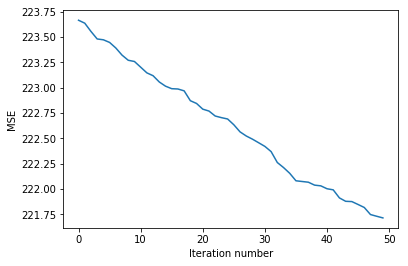

In [287]:
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

**Теперь посмотрим на зависимость ошибки от номера итерации для $10^5$ итераций стохастического градиентного спуска. Видим, что алгоритм сходится.**

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'MSE')

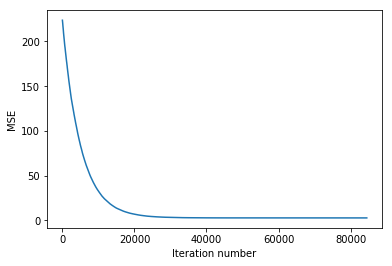

In [288]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

**Посмотрим на вектор весов, к которому сошелся метод.**

In [289]:
stoch_grad_desc_weights

array([ 1.40190566e+01,  3.91069256e+00,  2.78209808e+00, -8.10462217e-03])

**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [290]:
stoch_errors_by_iter[-1]

2.784412588406704

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска? Запишите ответ в файл '4.txt'.**

In [291]:
answer4 = stoch_errors_by_iter[-1]
print(answer4)
write_answer_to_file(answer4, '4.txt')

2.784412588406704


**Ответами к заданию будут текстовые файлы, полученные в ходе этого решения. Обратите внимание, что отправленные файлы не должны содержать пустую строку в конце. Данный нюанс является ограничением платформы Coursera. Мы работаем над исправлением этого ограничения.**